In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Experiment parameters

In [2]:
# Number of time windows
T = 18

# Target 1-coverage for conformal prediction
alpha = 0.1

## Load results

In [3]:
results_file = 'results/Conformal_GNN_School_Results_Final_10_100_50.pkl'

with open(results_file, 'rb') as file:
    results = pickle.load(file)

Save figures into a special folder.

In [4]:
save_figs = False
output_file_prefix = 'figures/School_'
output_file_suffix = '_10_100_50.pdf'

In [5]:
xlabels = ['', '10am', '', '12pm', '\nDay 1', '2pm', '', '4pm', '',
           '', '10am', '', '12pm', '\nDay 2', '2pm', '', '4pm', '']

## Summary results

In [6]:
methods = ['BD', 'UA']
GNN_models = ['GCN', 'GAT']
regimes = ['Trans', 'Semi-Ind']
outputs = ['Accuracy', 'Avg Size', 'Coverage']

In [7]:
methods_list = []
GNN_models_list = []
regimes_list = []
outputs_list = []
stat_types_list = []
stats_list = []

for (method, GNN_model, regime, output) in product(methods, GNN_models, regimes, outputs):
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(np.mean(results[method][GNN_model][regime][output]['All']), 3))
    
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(np.std(results[method][GNN_model][regime][output]['All']), 3))
    
df_summary = pd.DataFrame({
    'method'   : methods_list,
    'GNN model': GNN_models_list,
    'regime'   : regimes_list,
    'output'   : outputs_list,
    'statistic': stat_types_list,
    'value'    : stats_list
})

Display full table of statistics.

In [8]:
print(df_summary)

   method GNN model    regime    output statistic  value
0      BD       GCN     Trans  Accuracy      Mean  0.856
1      BD       GCN     Trans  Accuracy    St Dev  0.011
2      BD       GCN     Trans  Avg Size      Mean  4.542
3      BD       GCN     Trans  Avg Size    St Dev  0.167
4      BD       GCN     Trans  Coverage      Mean  0.901
5      BD       GCN     Trans  Coverage    St Dev  0.012
6      BD       GCN  Semi-Ind  Accuracy      Mean  0.116
7      BD       GCN  Semi-Ind  Accuracy    St Dev  0.011
8      BD       GCN  Semi-Ind  Avg Size      Mean  8.079
9      BD       GCN  Semi-Ind  Avg Size    St Dev  0.188
10     BD       GCN  Semi-Ind  Coverage      Mean  0.812
11     BD       GCN  Semi-Ind  Coverage    St Dev  0.033
12     BD       GAT     Trans  Accuracy      Mean  0.807
13     BD       GAT     Trans  Accuracy    St Dev  0.016
14     BD       GAT     Trans  Avg Size      Mean  3.863
15     BD       GAT     Trans  Avg Size    St Dev  0.813
16     BD       GAT     Trans  

In [9]:
df_summary[df_summary['output'] == 'Coverage']

method GNN model    regime    output statistic  value
4      BD       GCN     Trans  Coverage      Mean  0.901
5      BD       GCN     Trans  Coverage    St Dev  0.012
10     BD       GCN  Semi-Ind  Coverage      Mean  0.812
11     BD       GCN  Semi-Ind  Coverage    St Dev  0.033
16     BD       GAT     Trans  Coverage      Mean  0.901
17     BD       GAT     Trans  Coverage    St Dev  0.012
22     BD       GAT  Semi-Ind  Coverage      Mean  0.662
23     BD       GAT  Semi-Ind  Coverage    St Dev  0.084
28     UA       GCN     Trans  Coverage      Mean  0.901
29     UA       GCN     Trans  Coverage    St Dev  0.012
34     UA       GCN  Semi-Ind  Coverage      Mean  0.924
35     UA       GCN  Semi-Ind  Coverage    St Dev  0.013
40     UA       GAT     Trans  Coverage      Mean  0.901
41     UA       GAT     Trans  Coverage    St Dev  0.012
46     UA       GAT  Semi-Ind  Coverage      Mean  0.909
47     UA       GAT  Semi-Ind  Coverage    St Dev  0.021

## Plot results

/tmp/ipykernel_398735/3184480590.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)


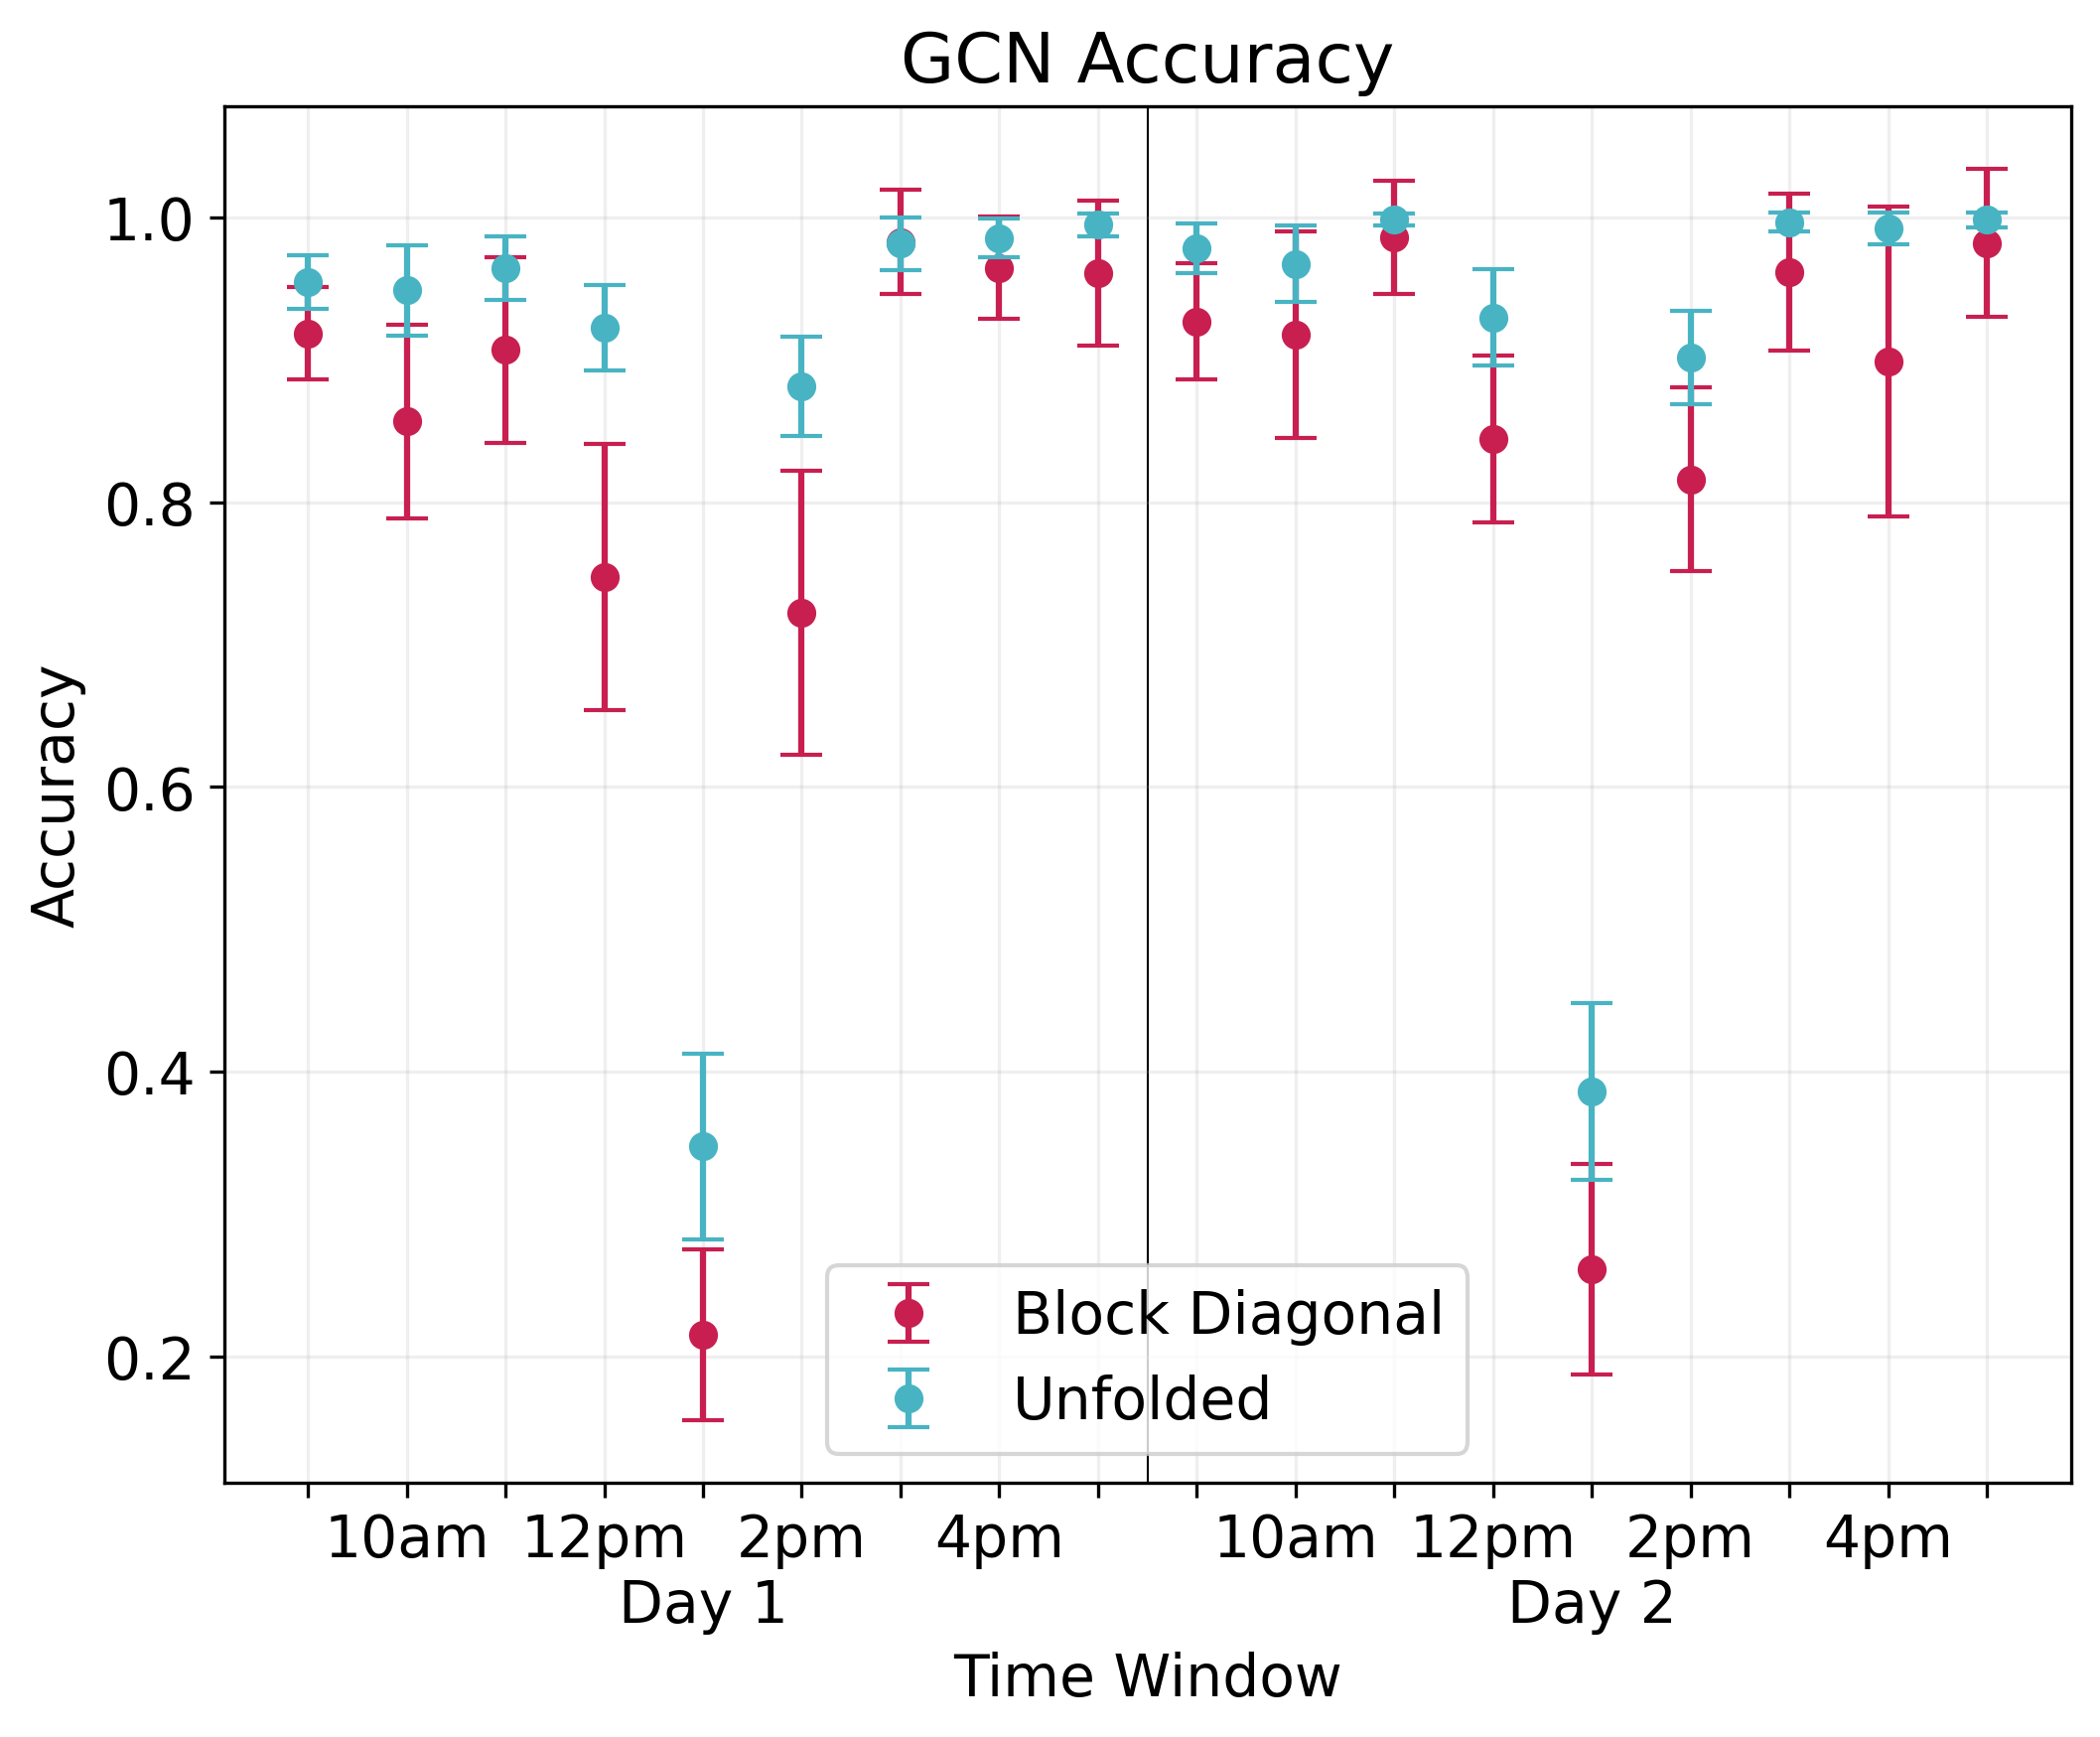

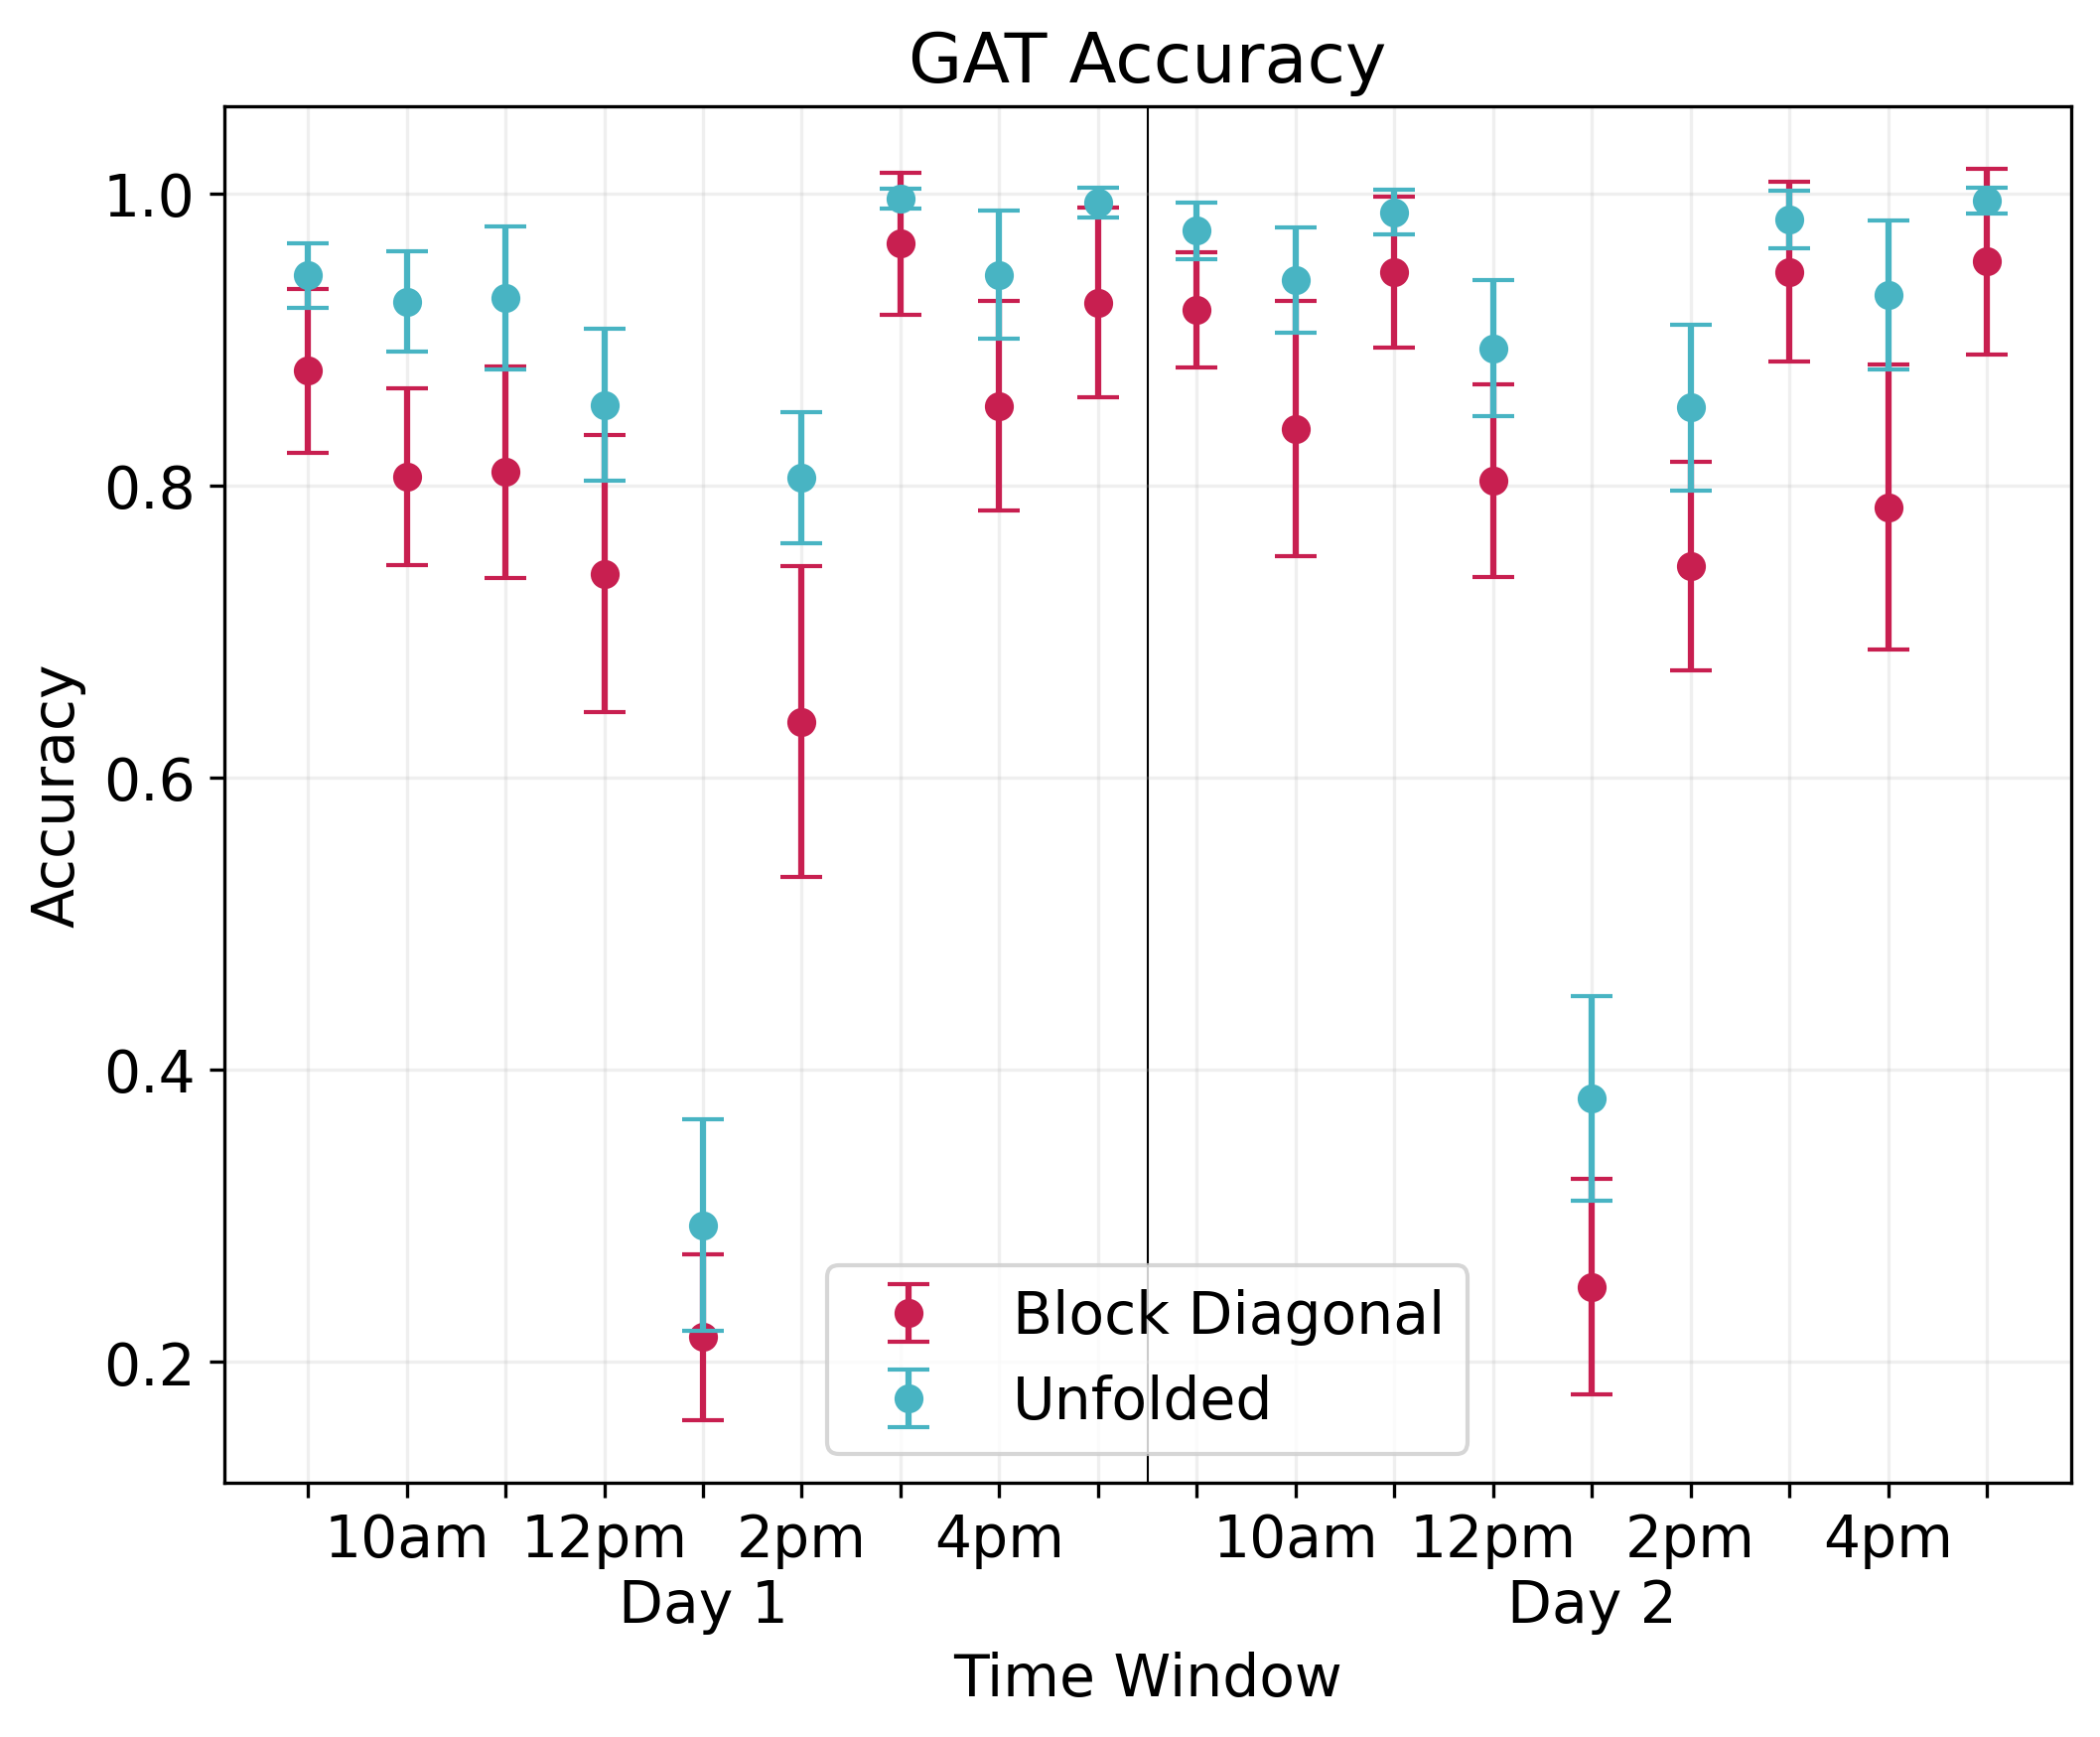

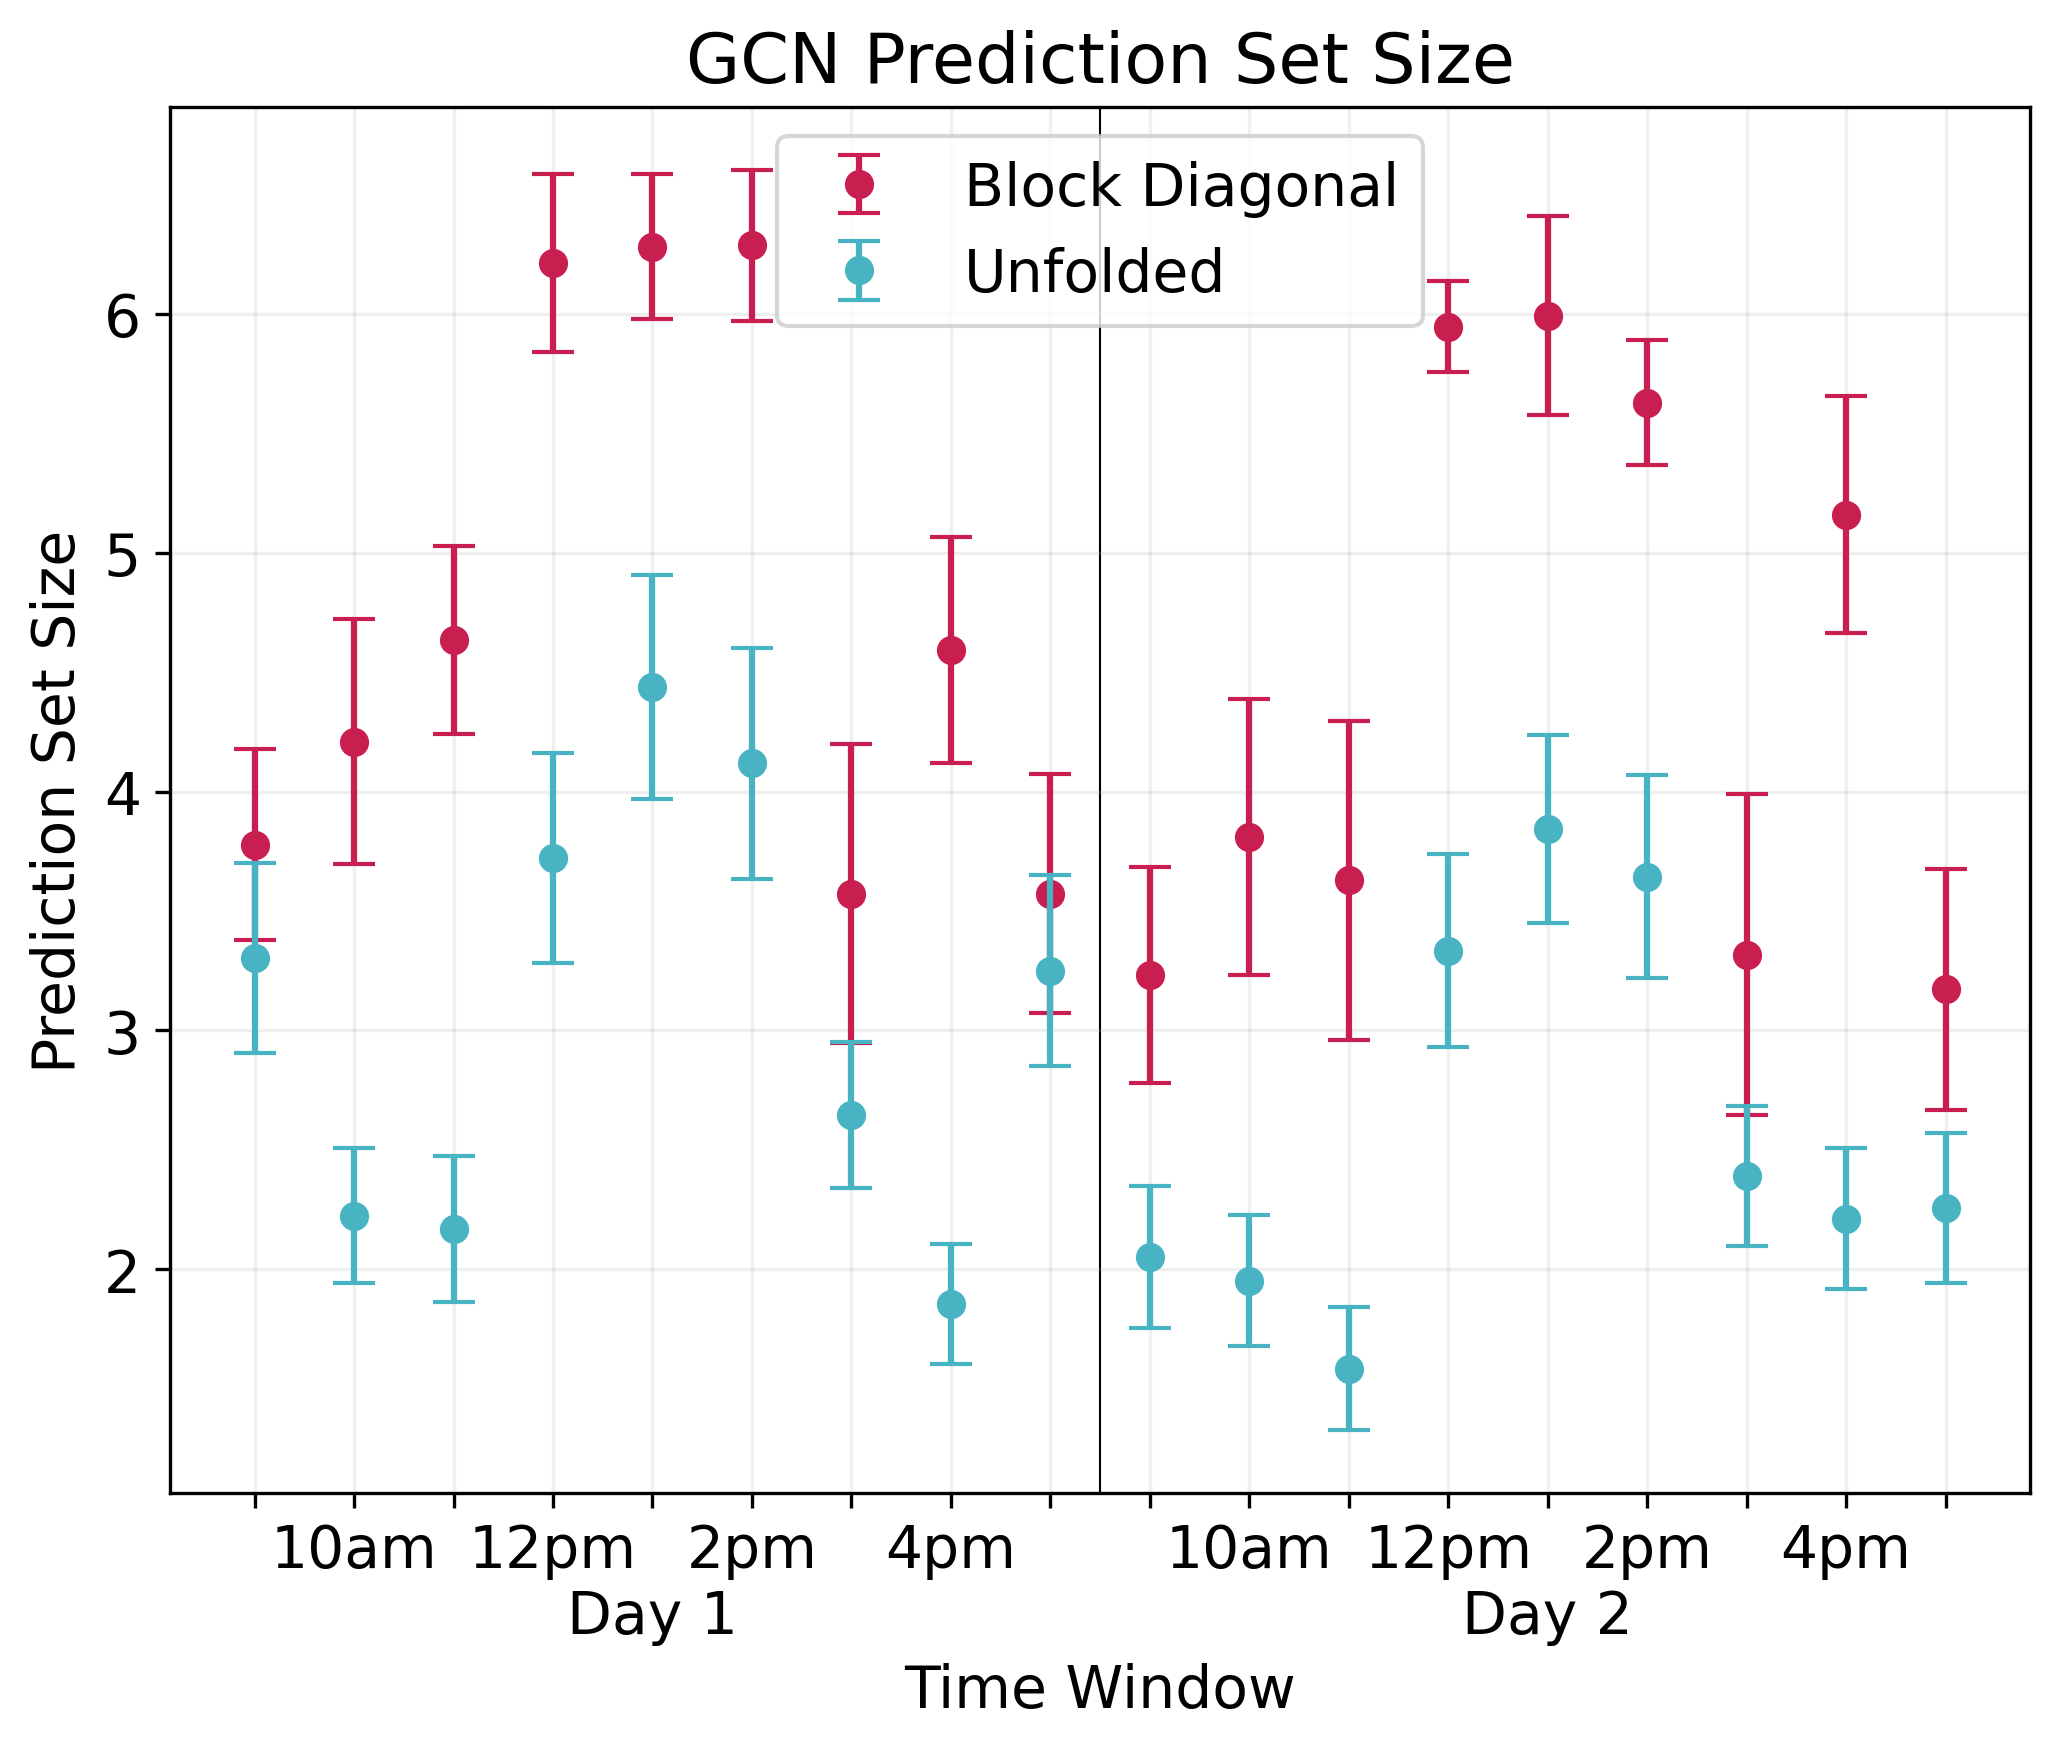

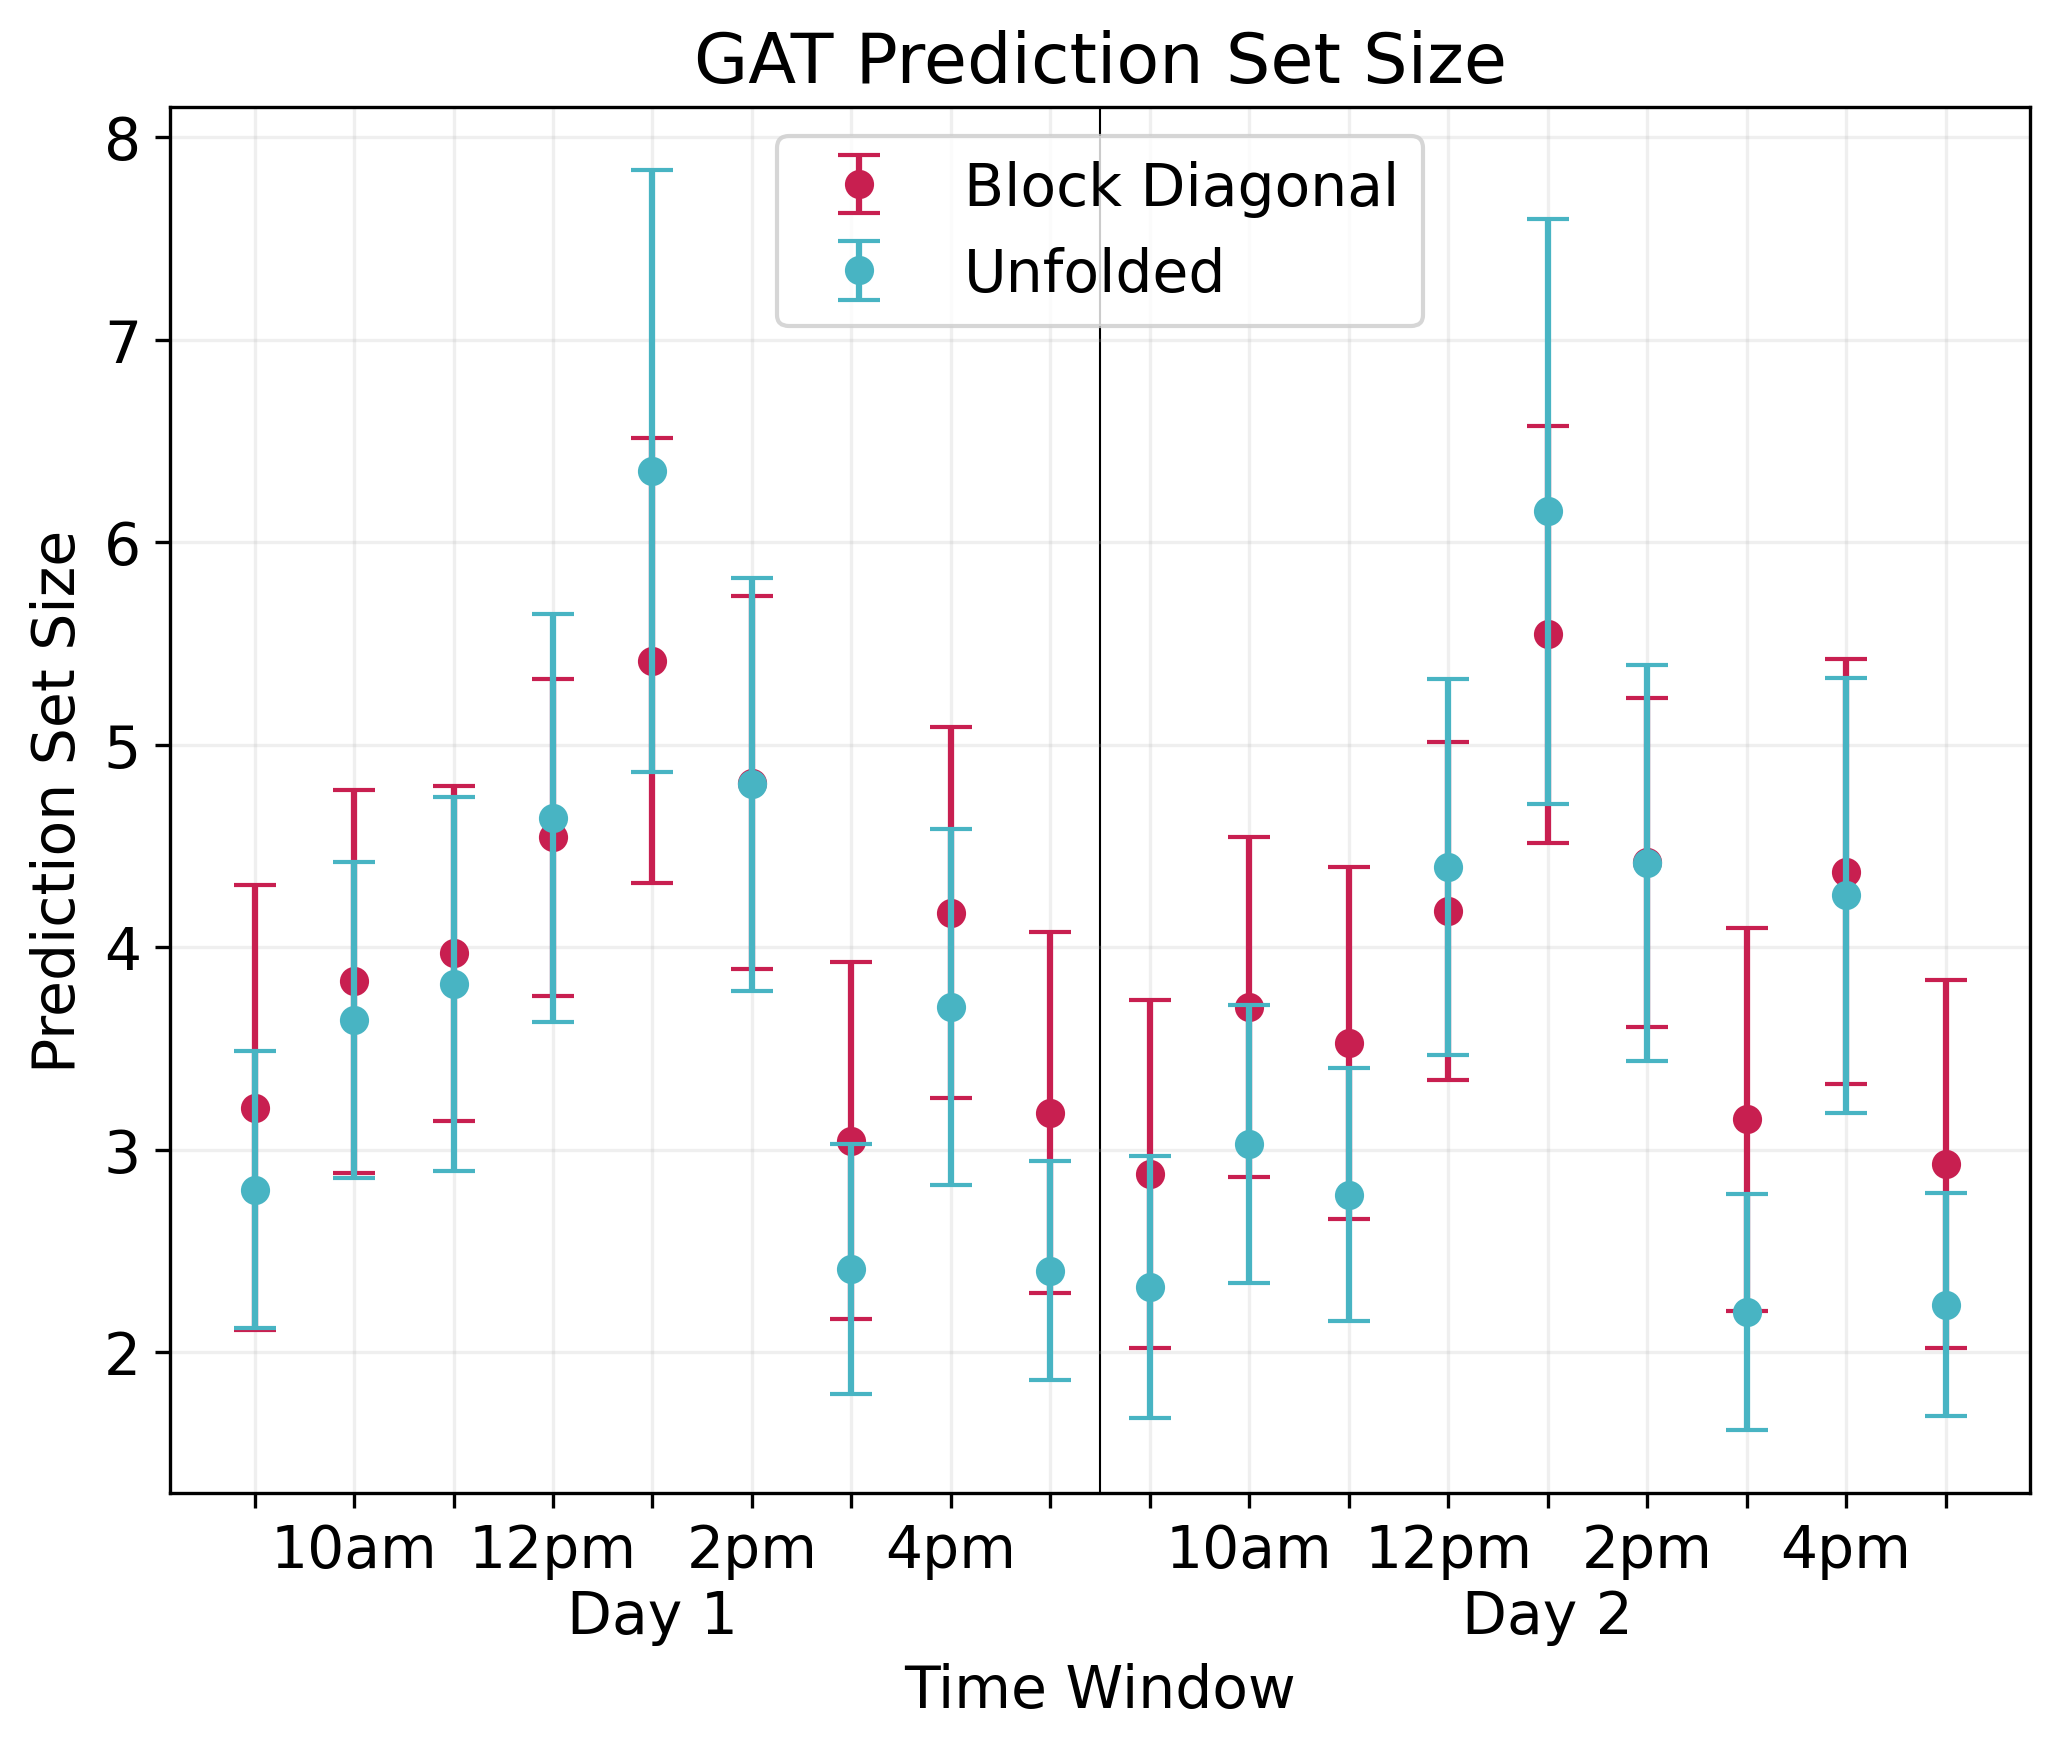

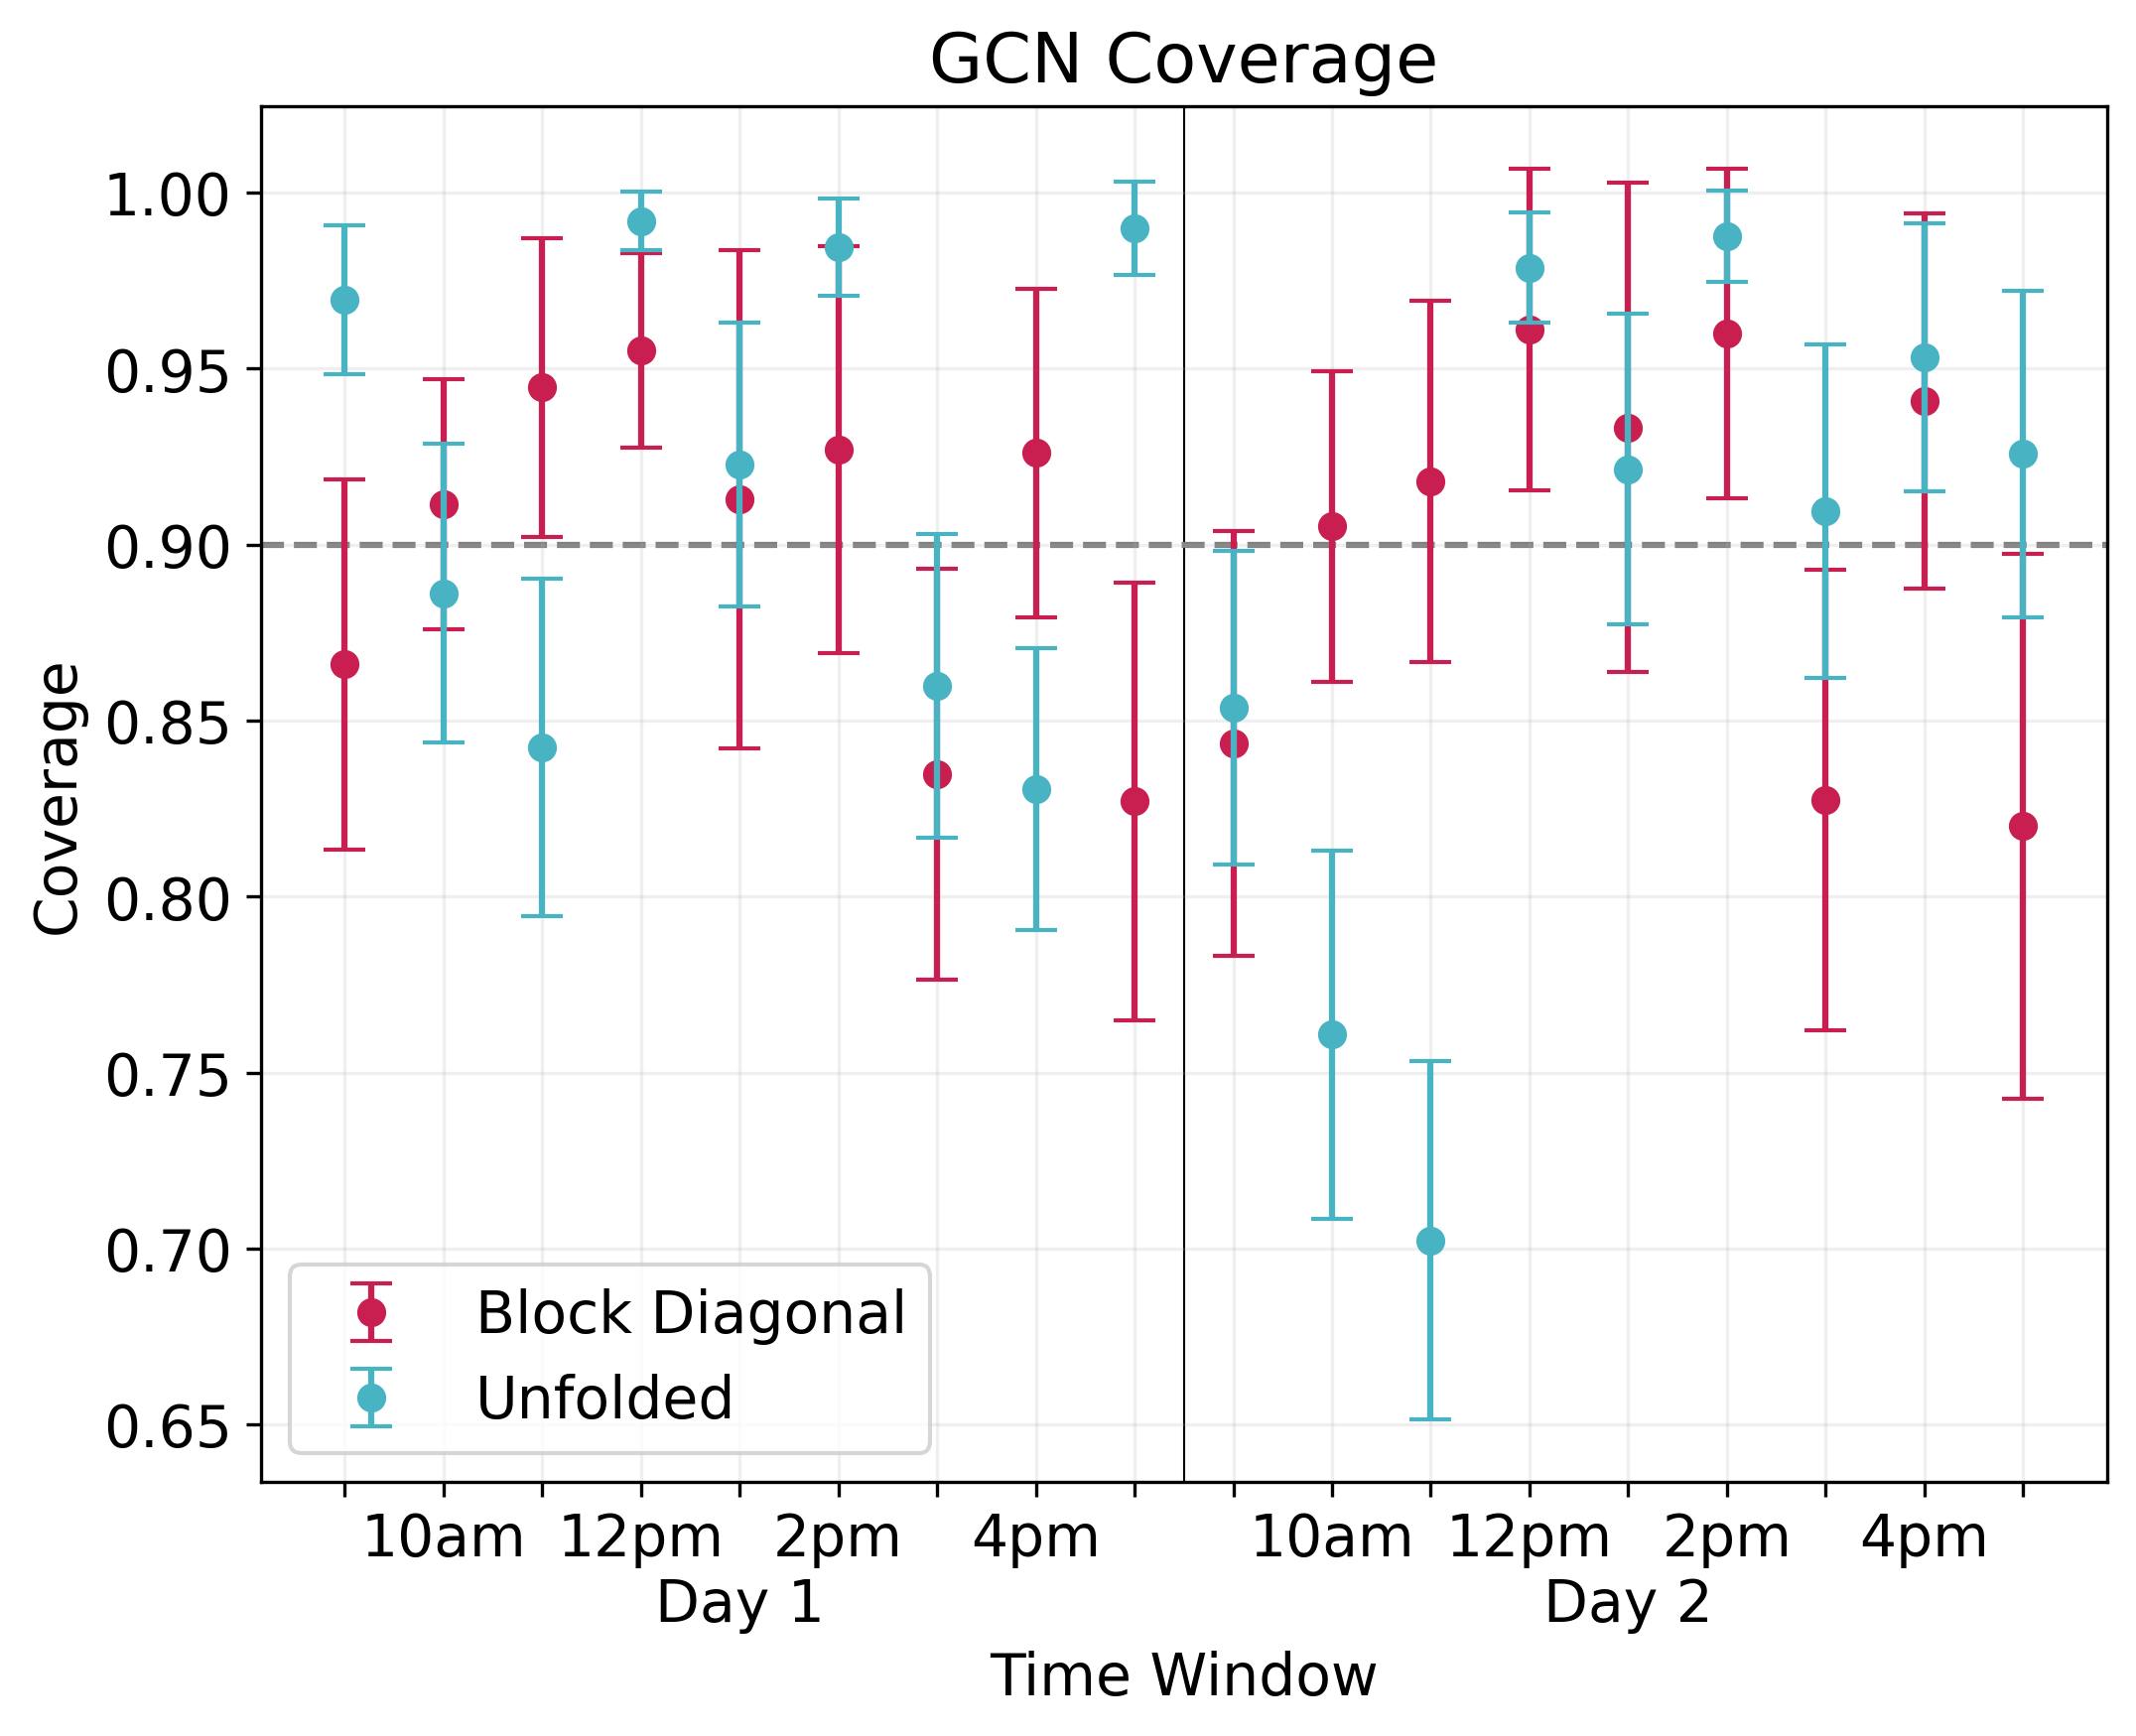

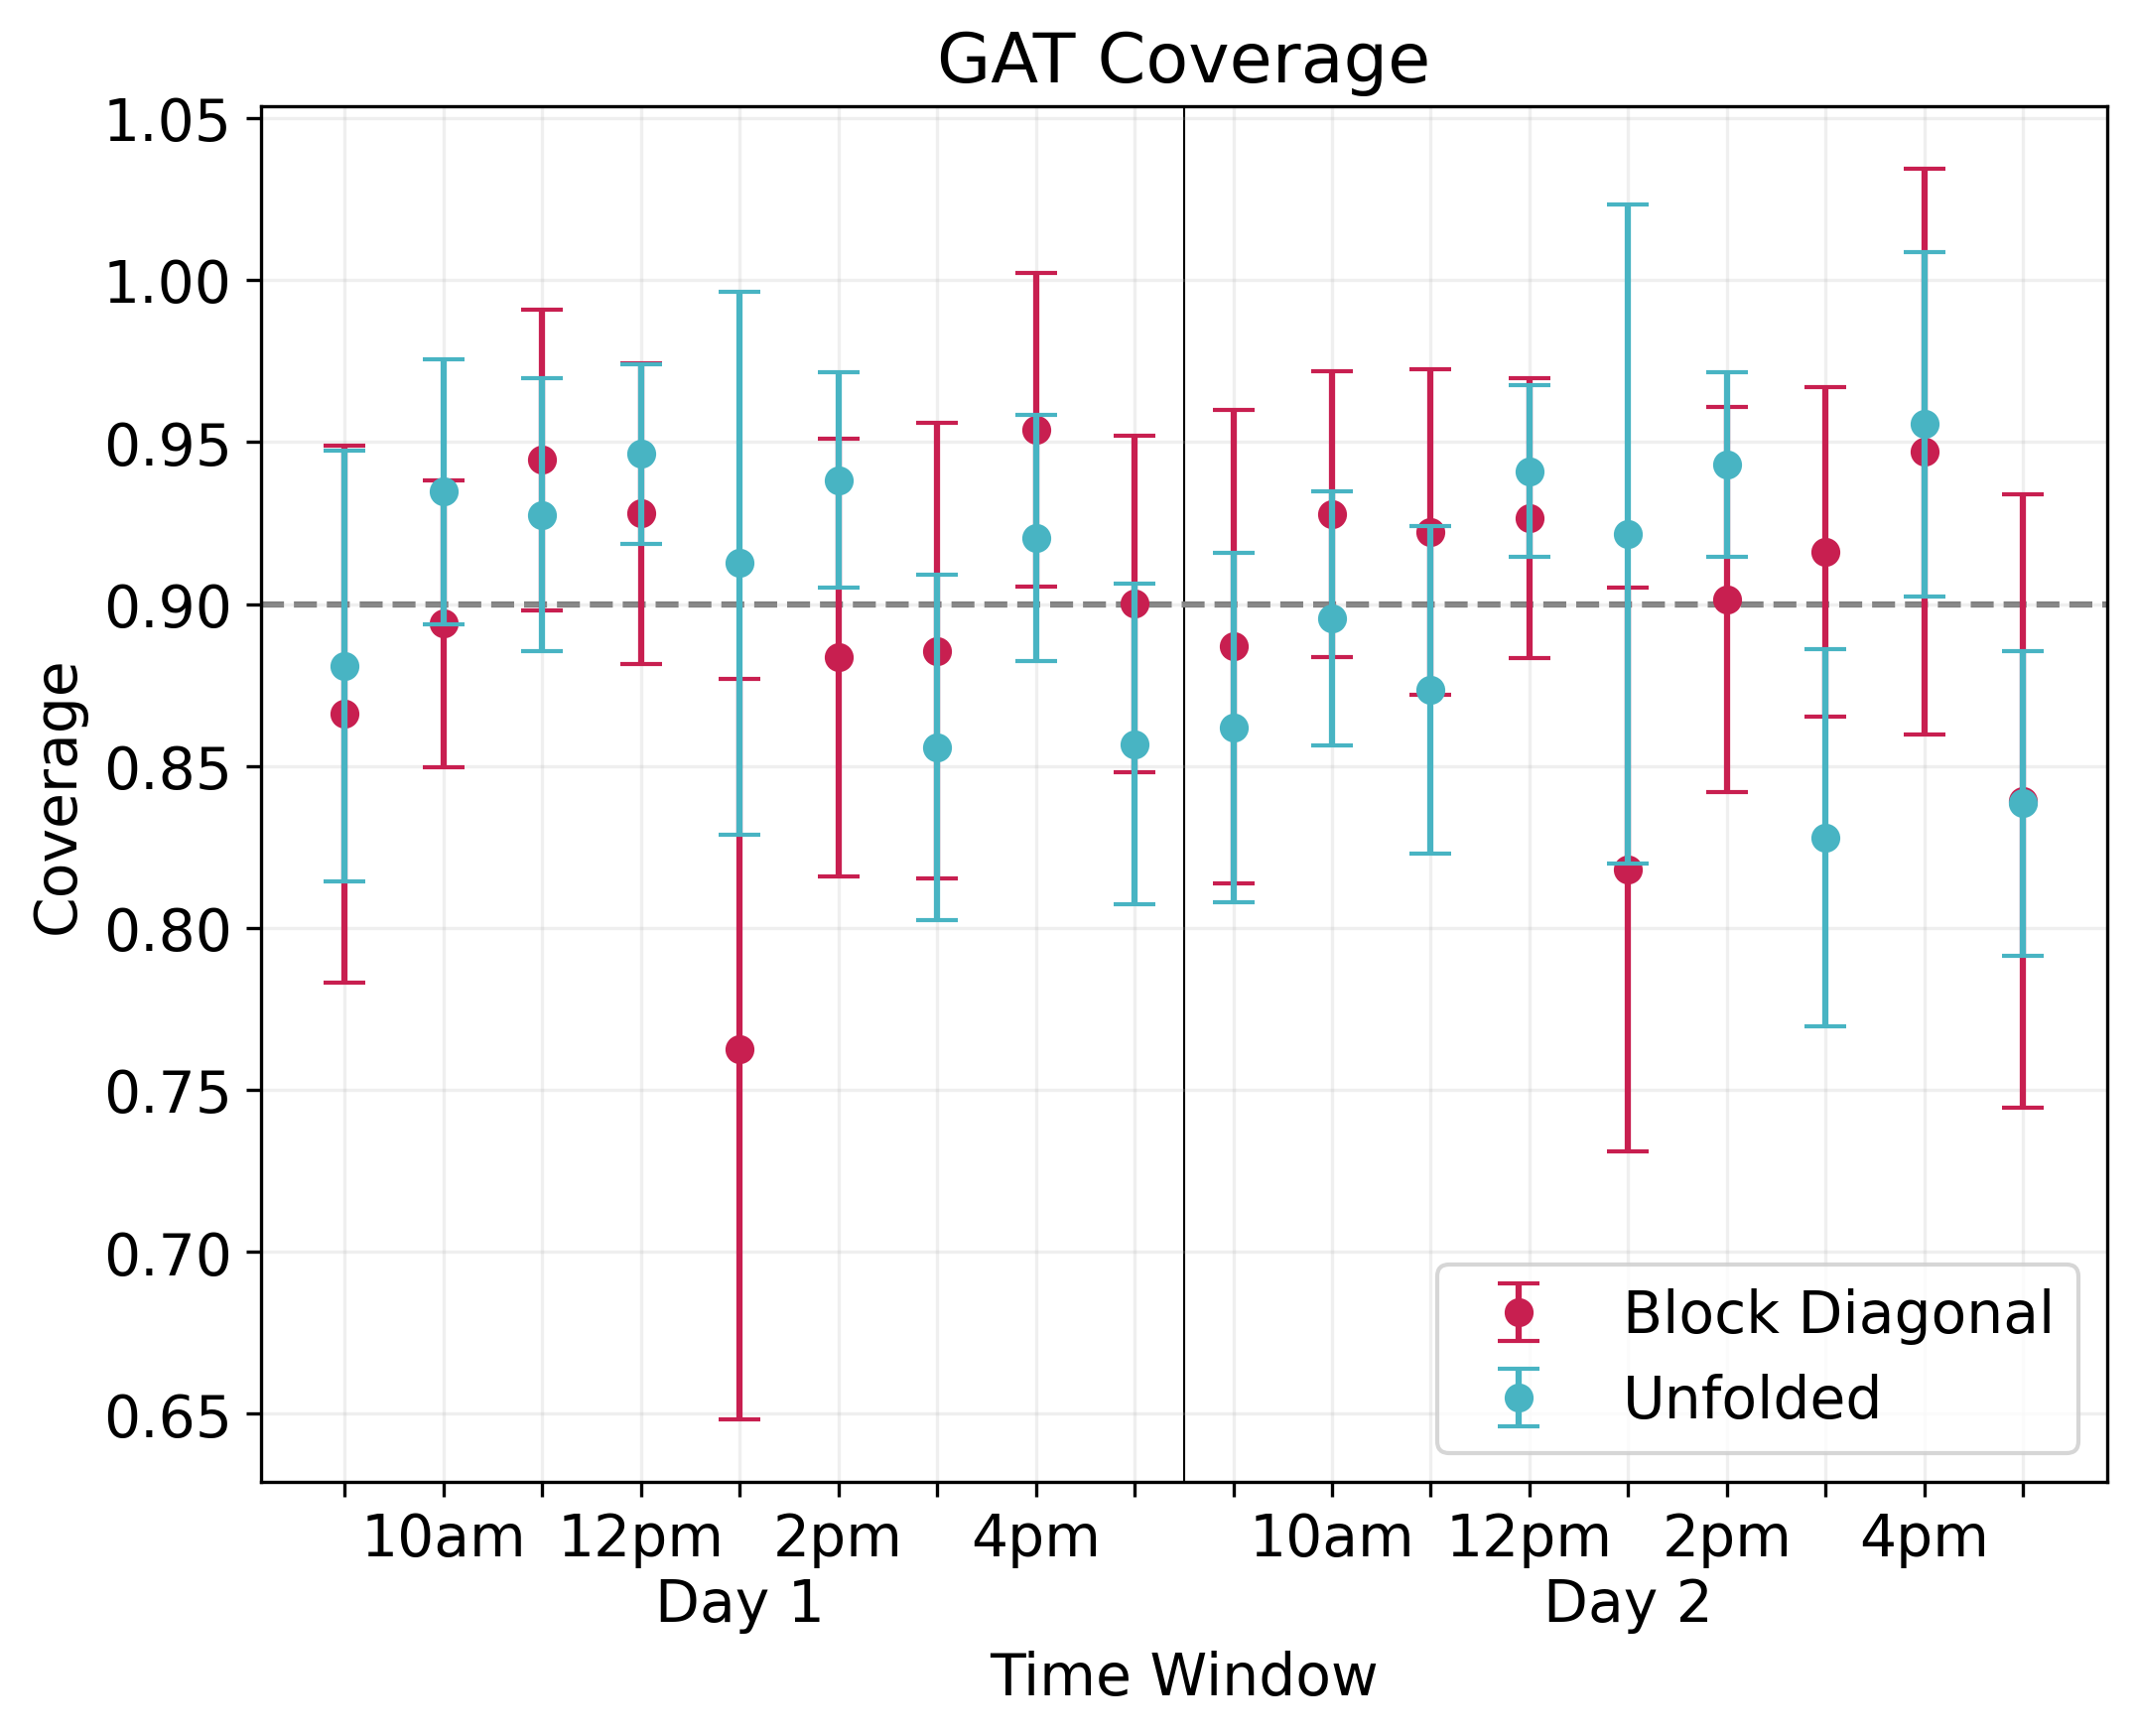

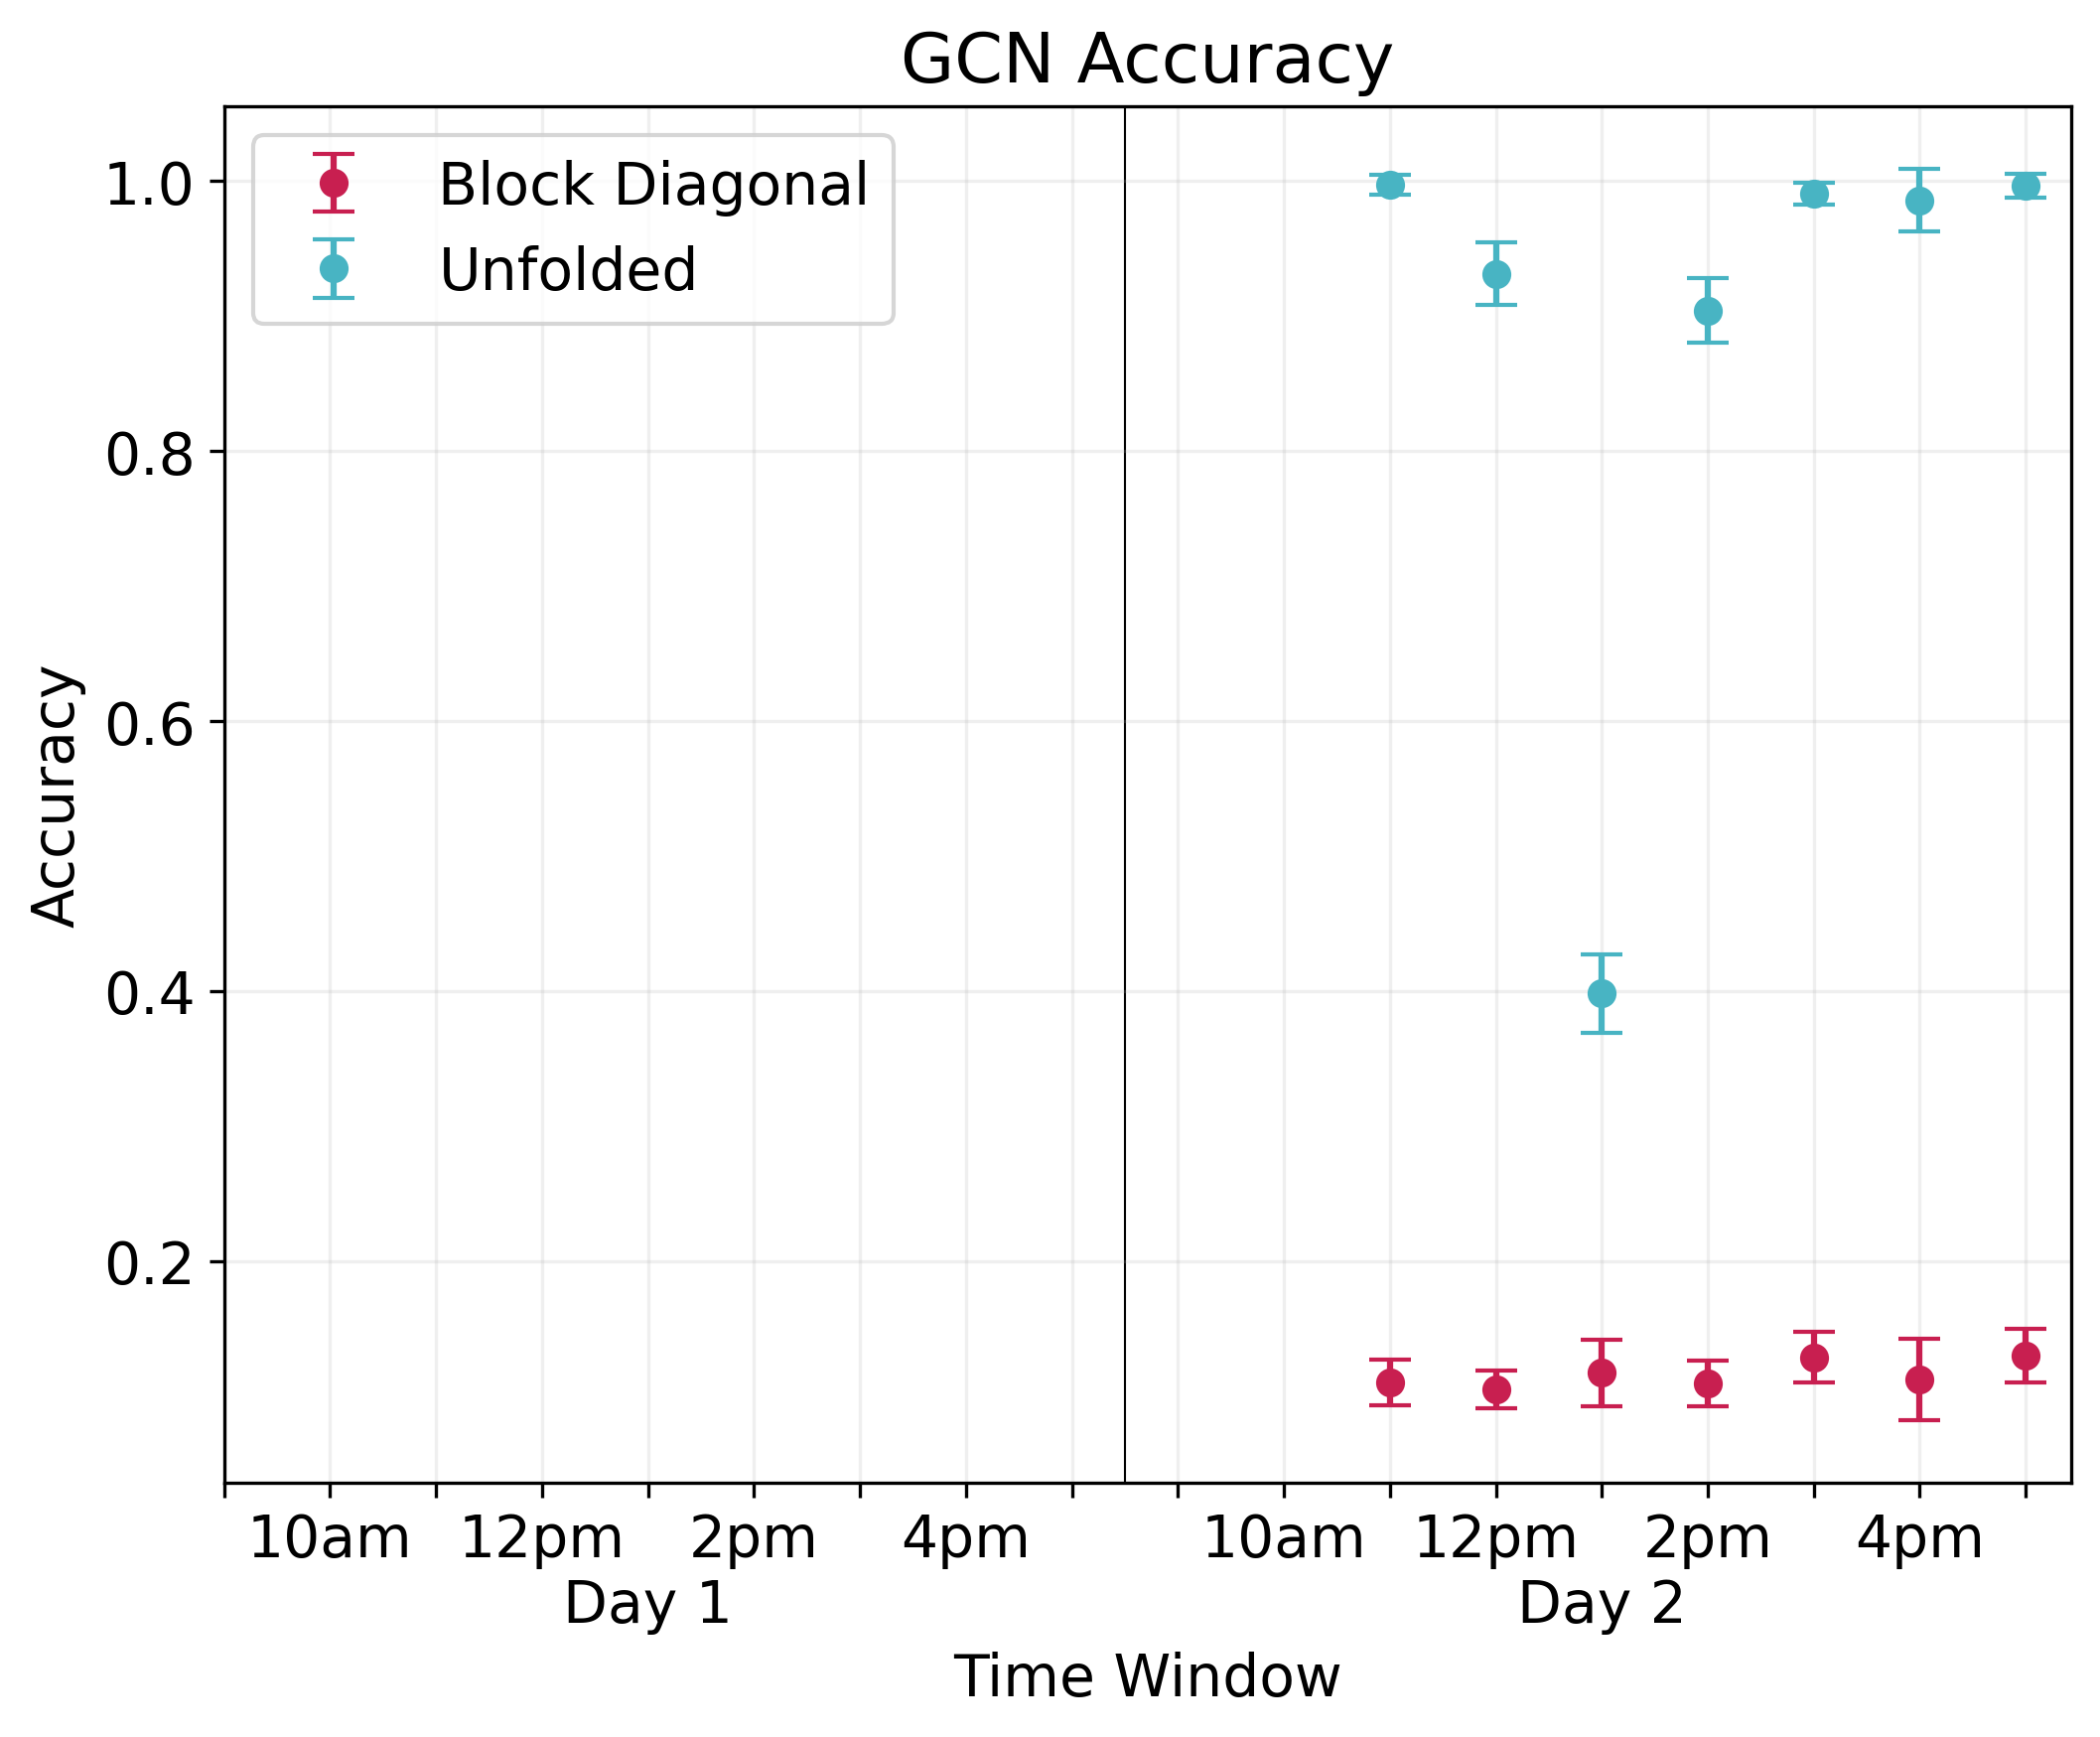

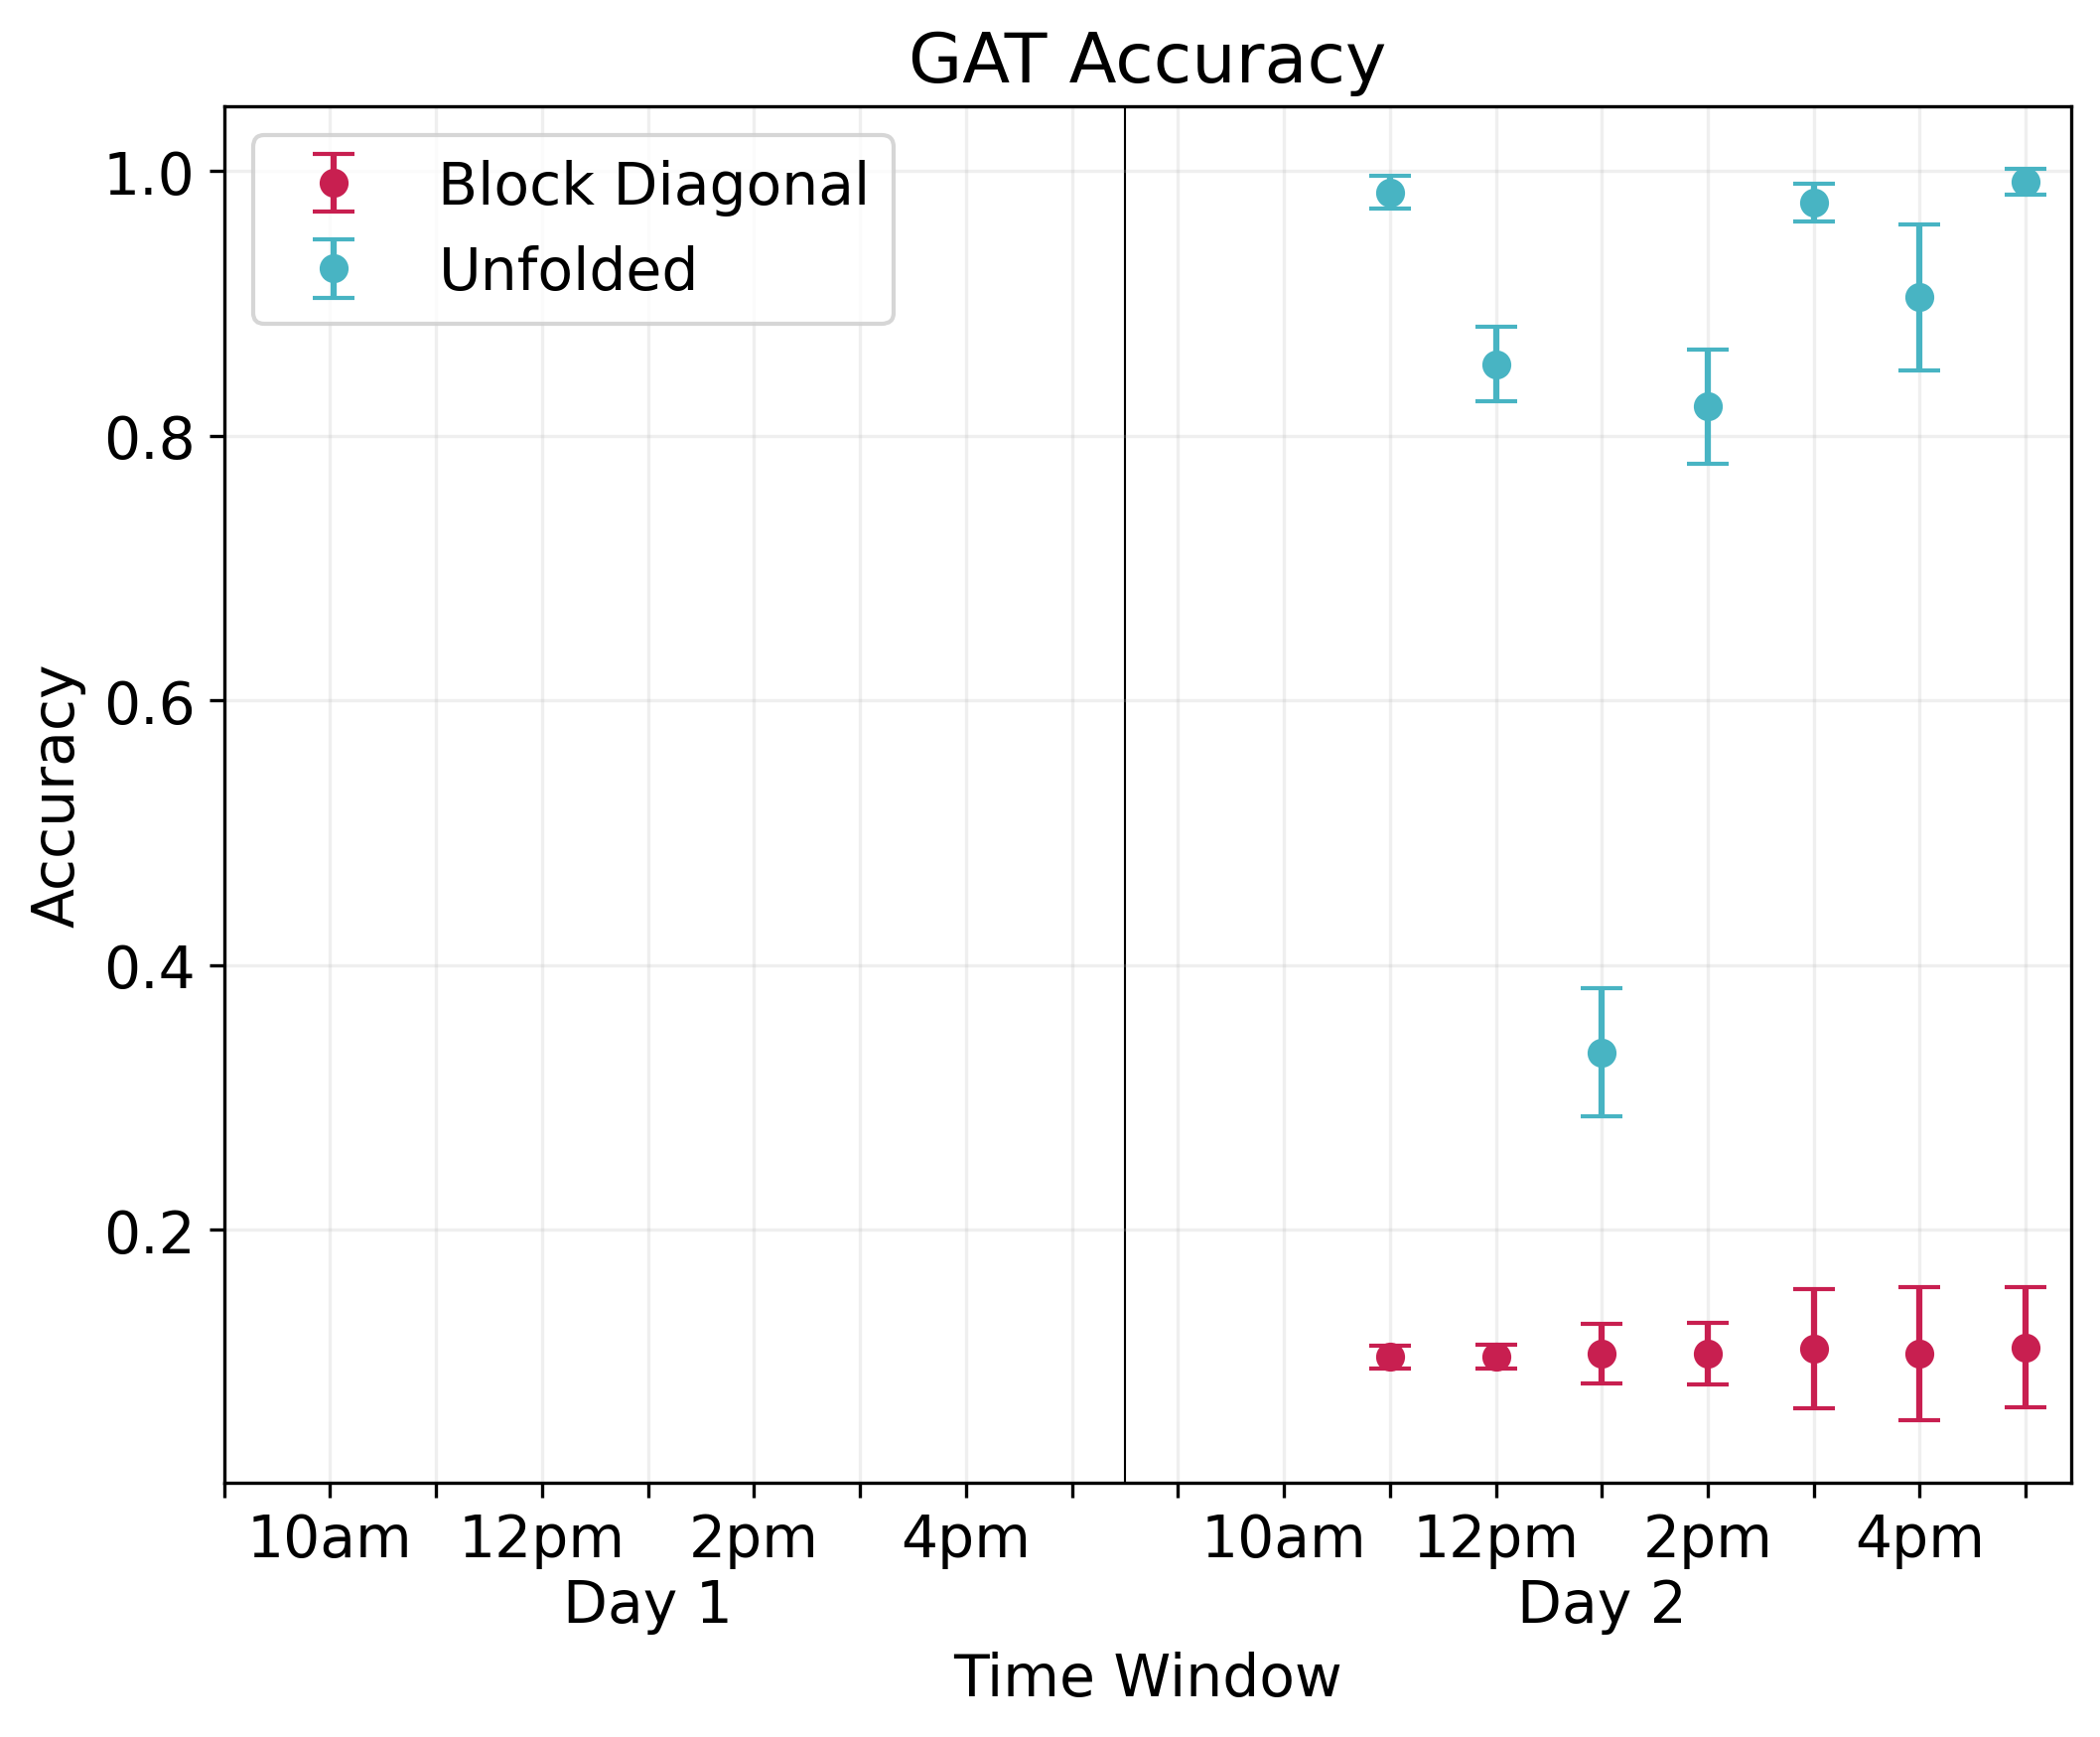

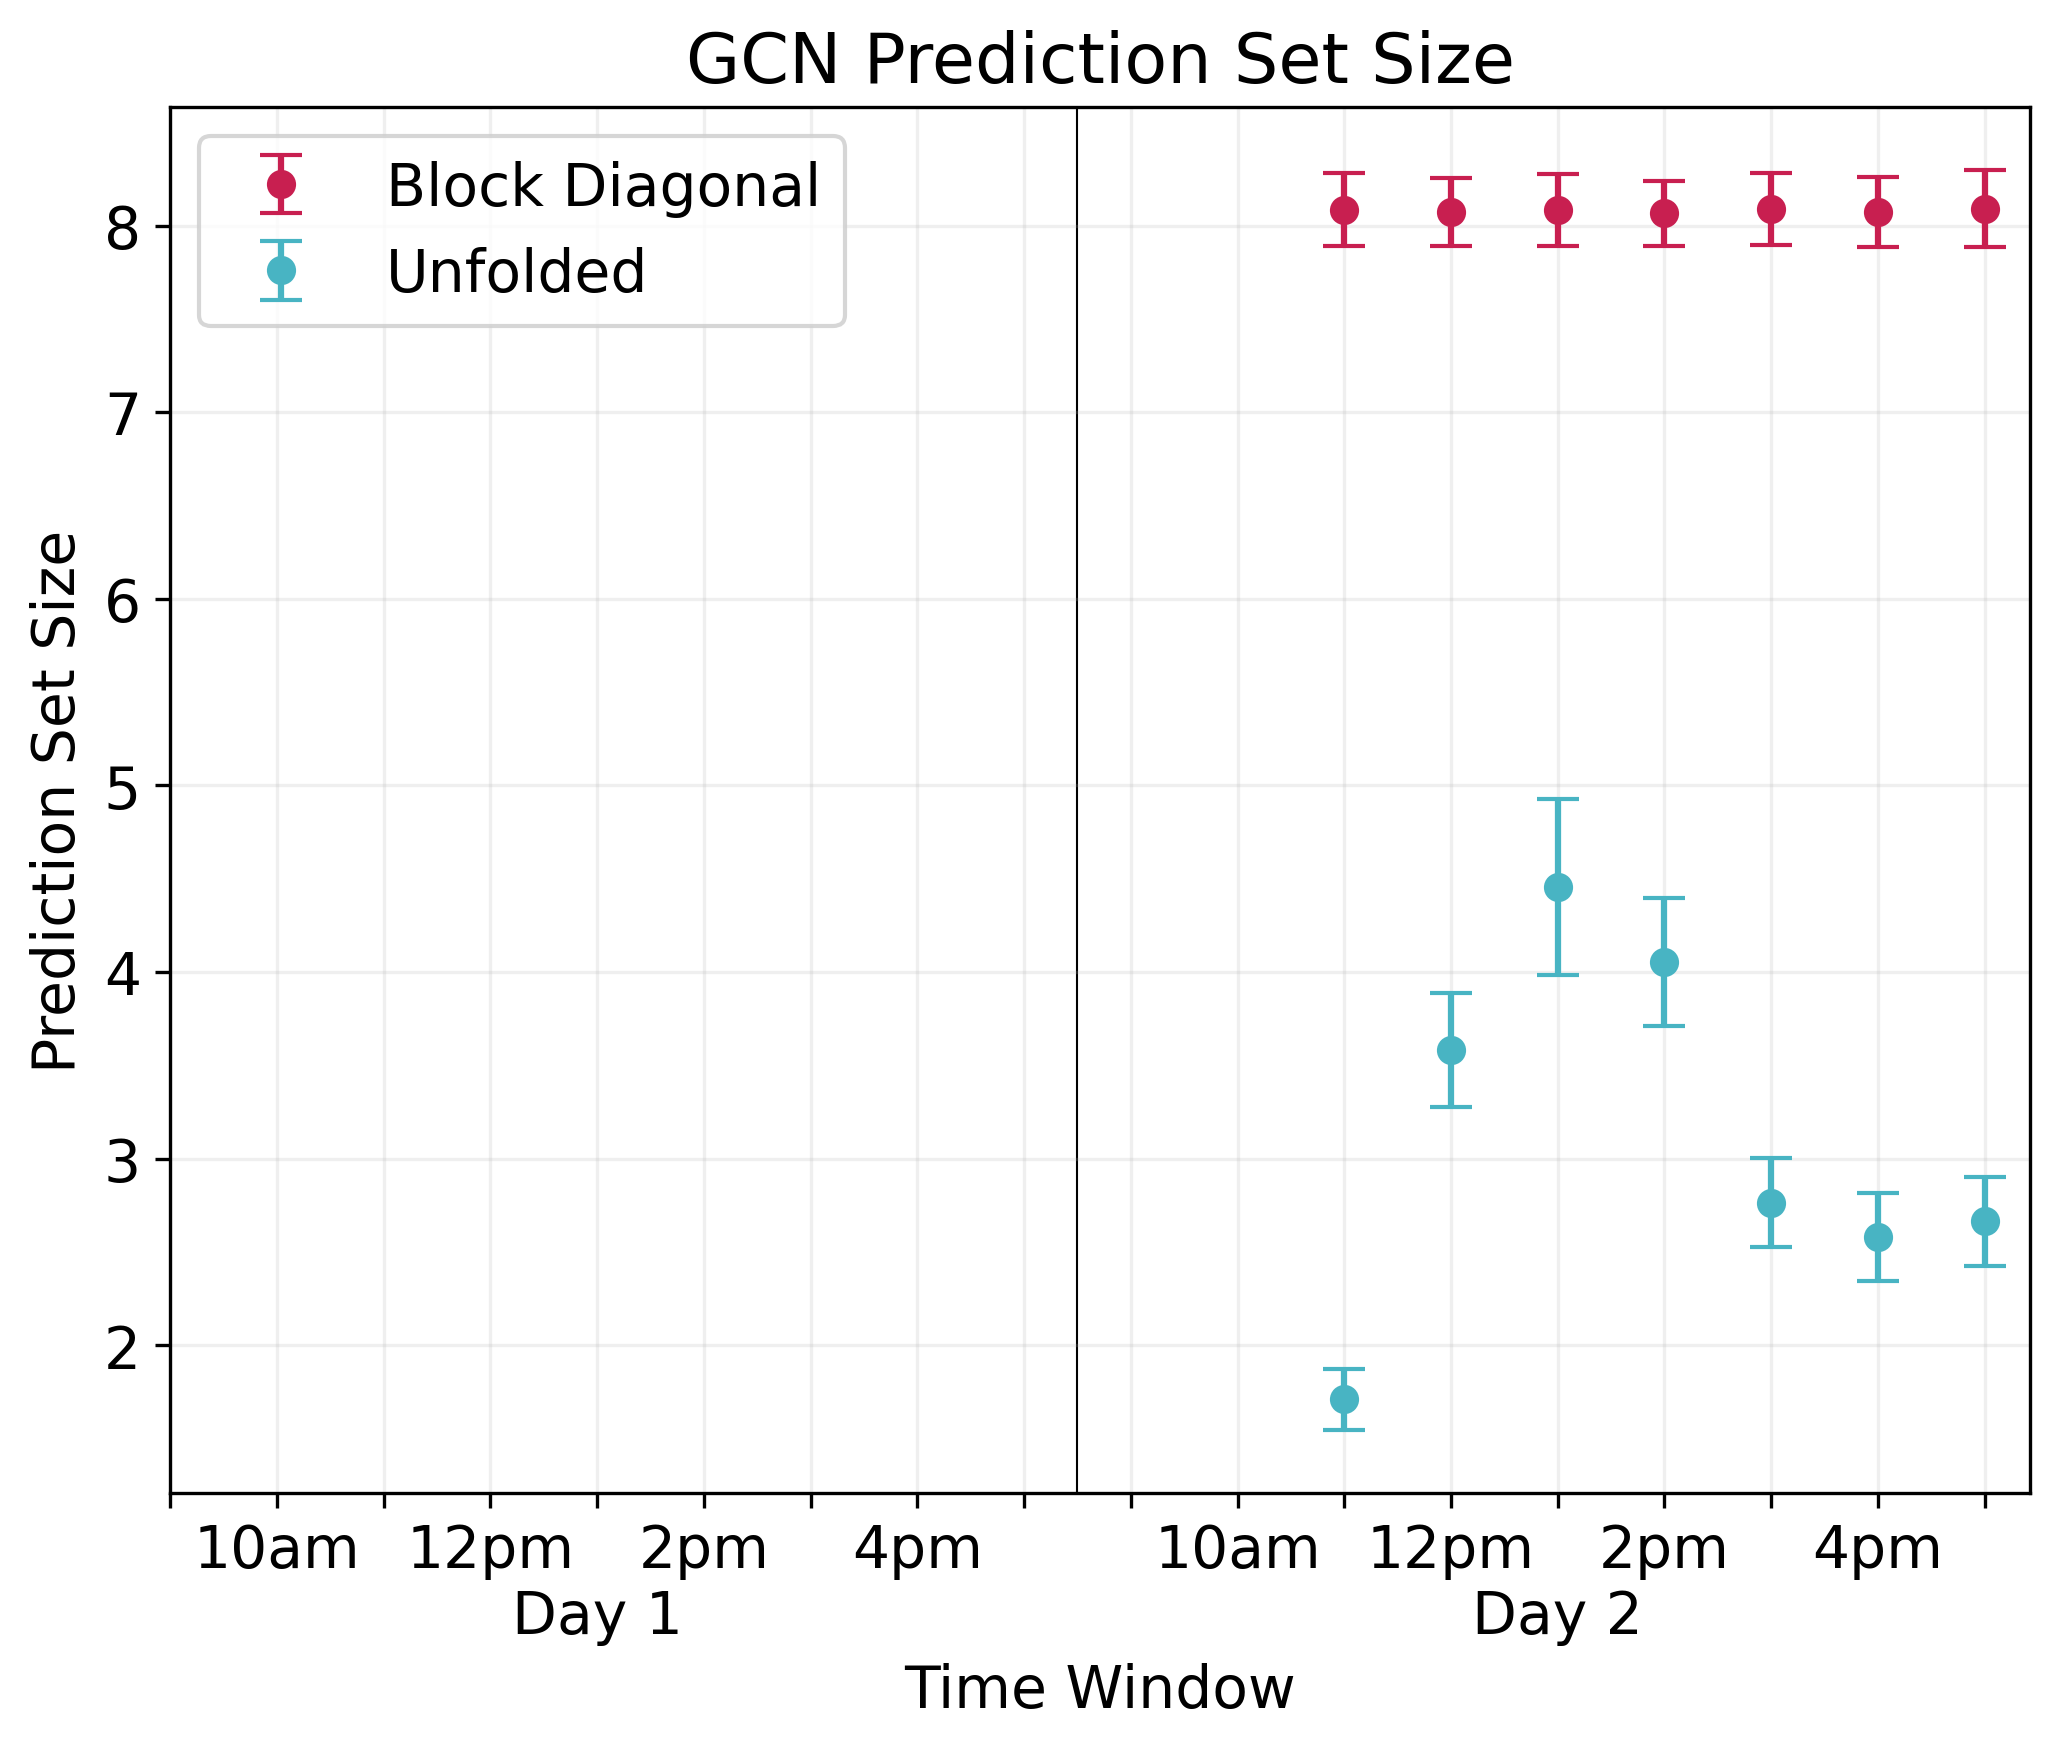

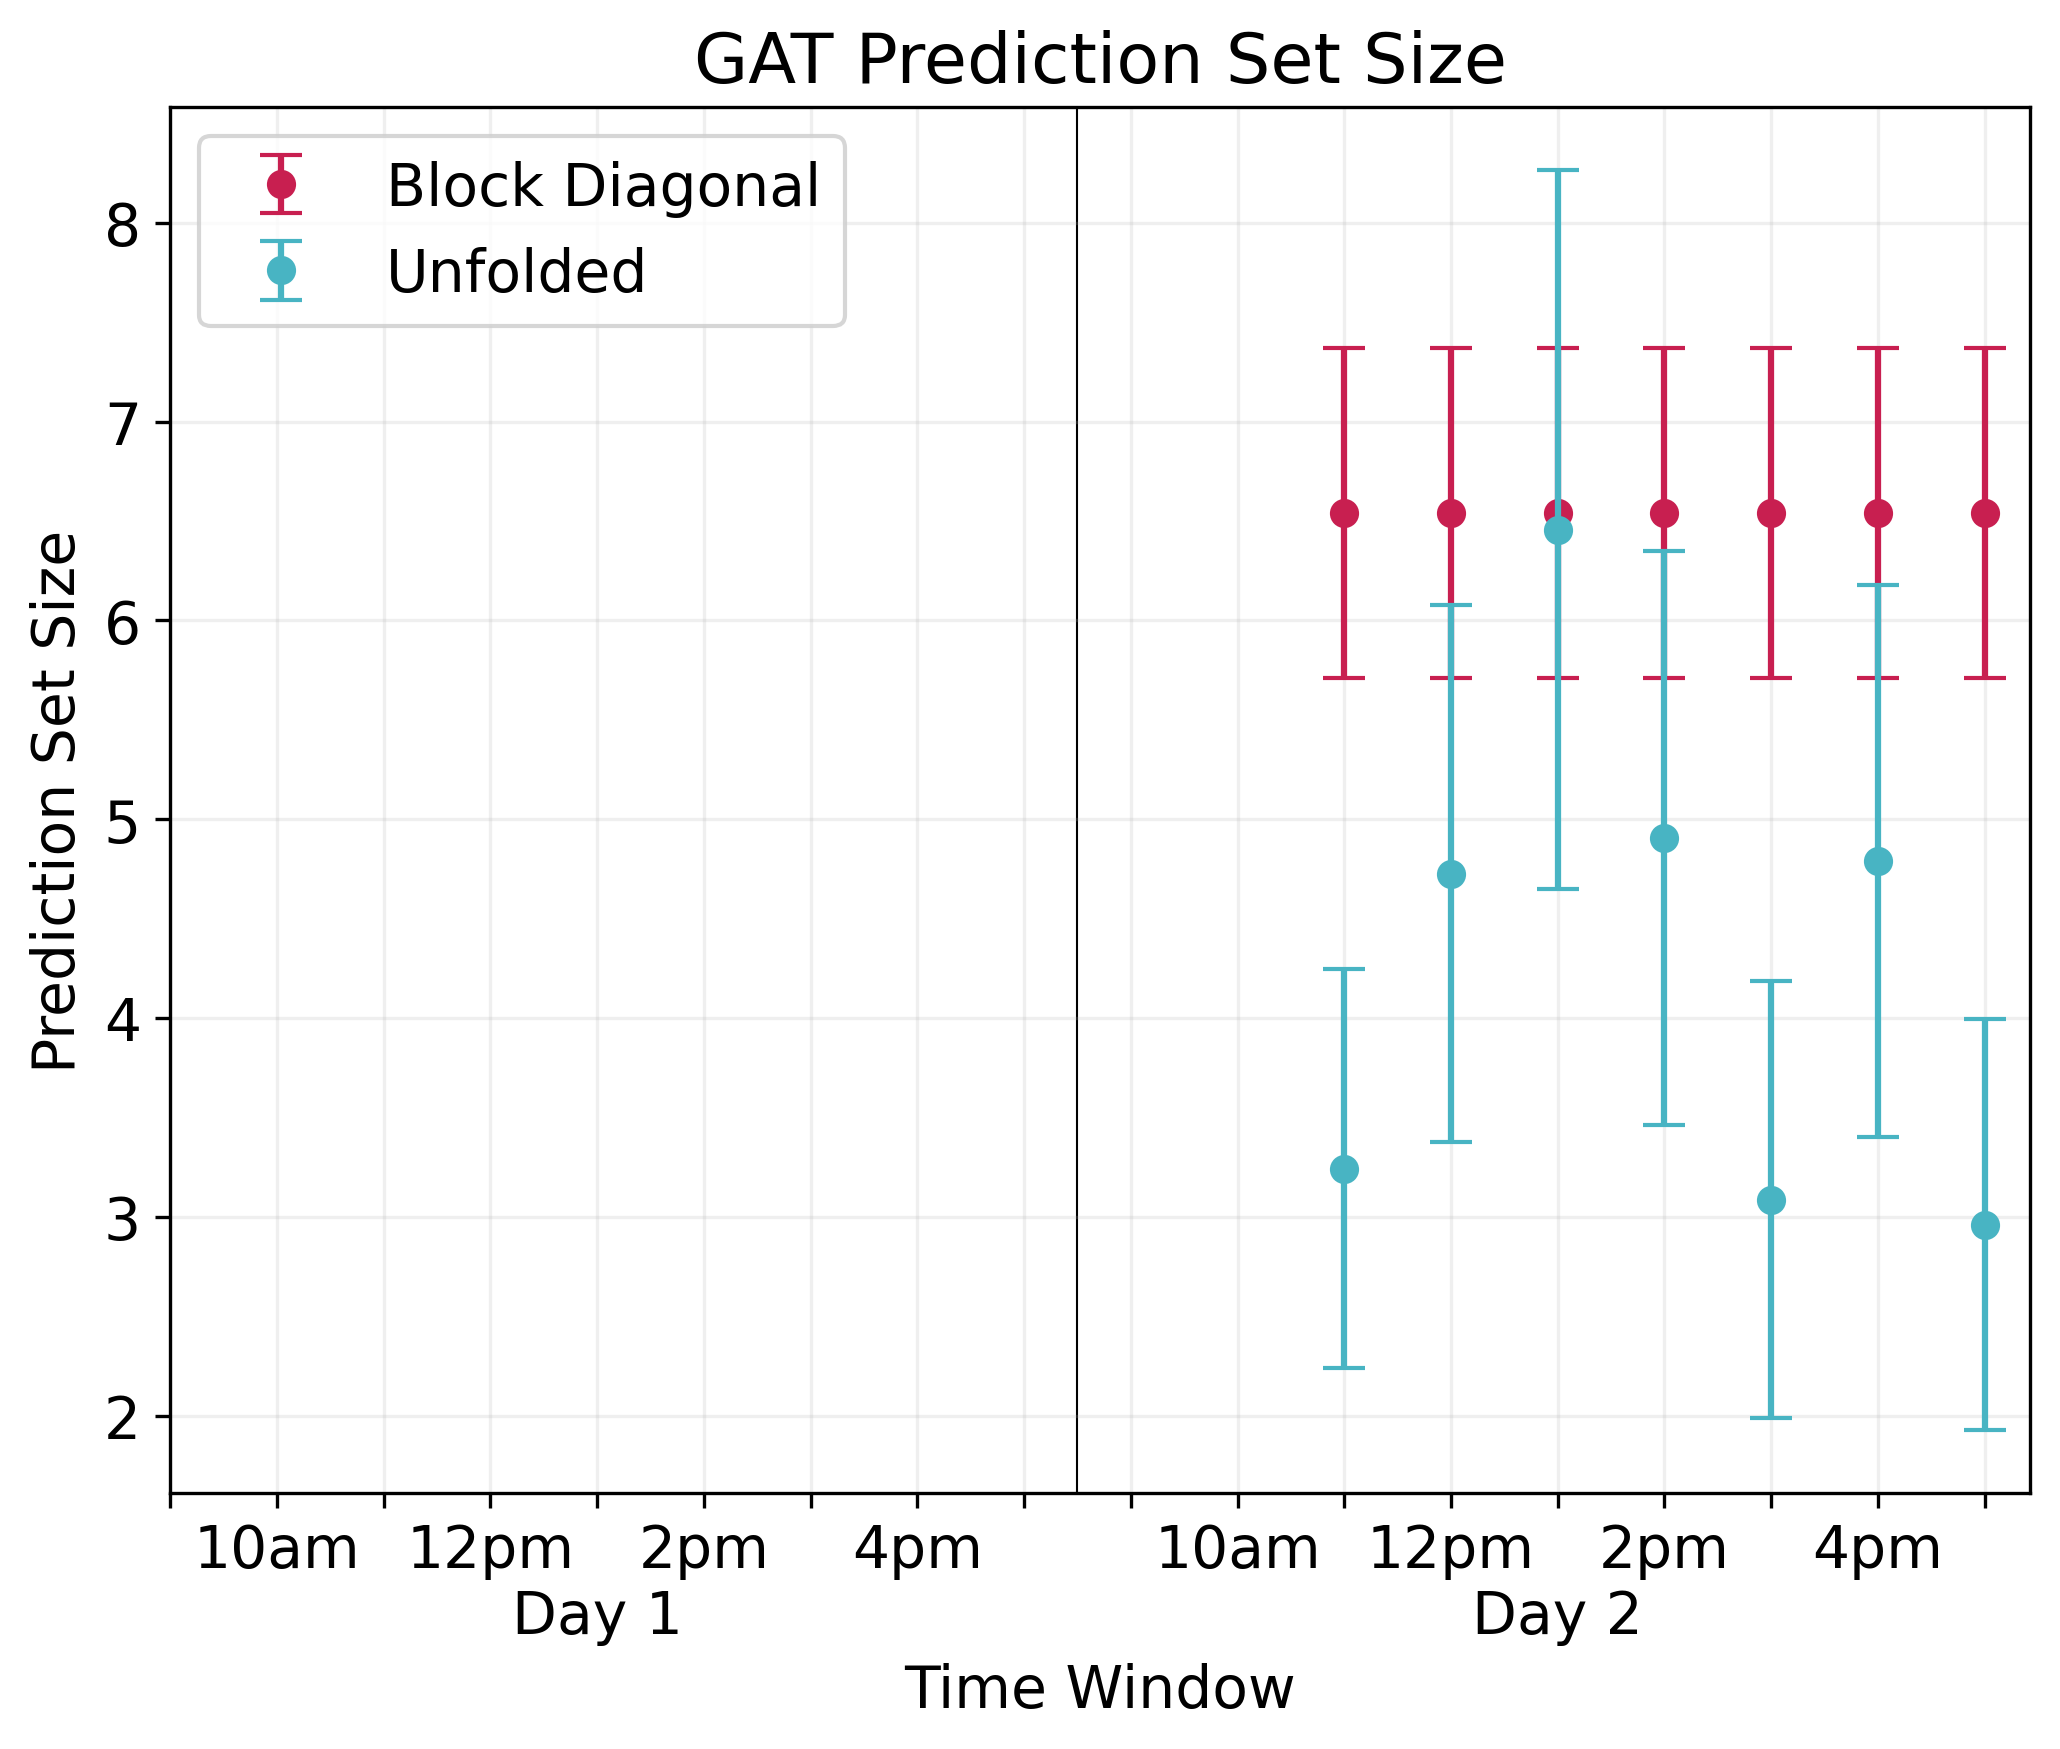

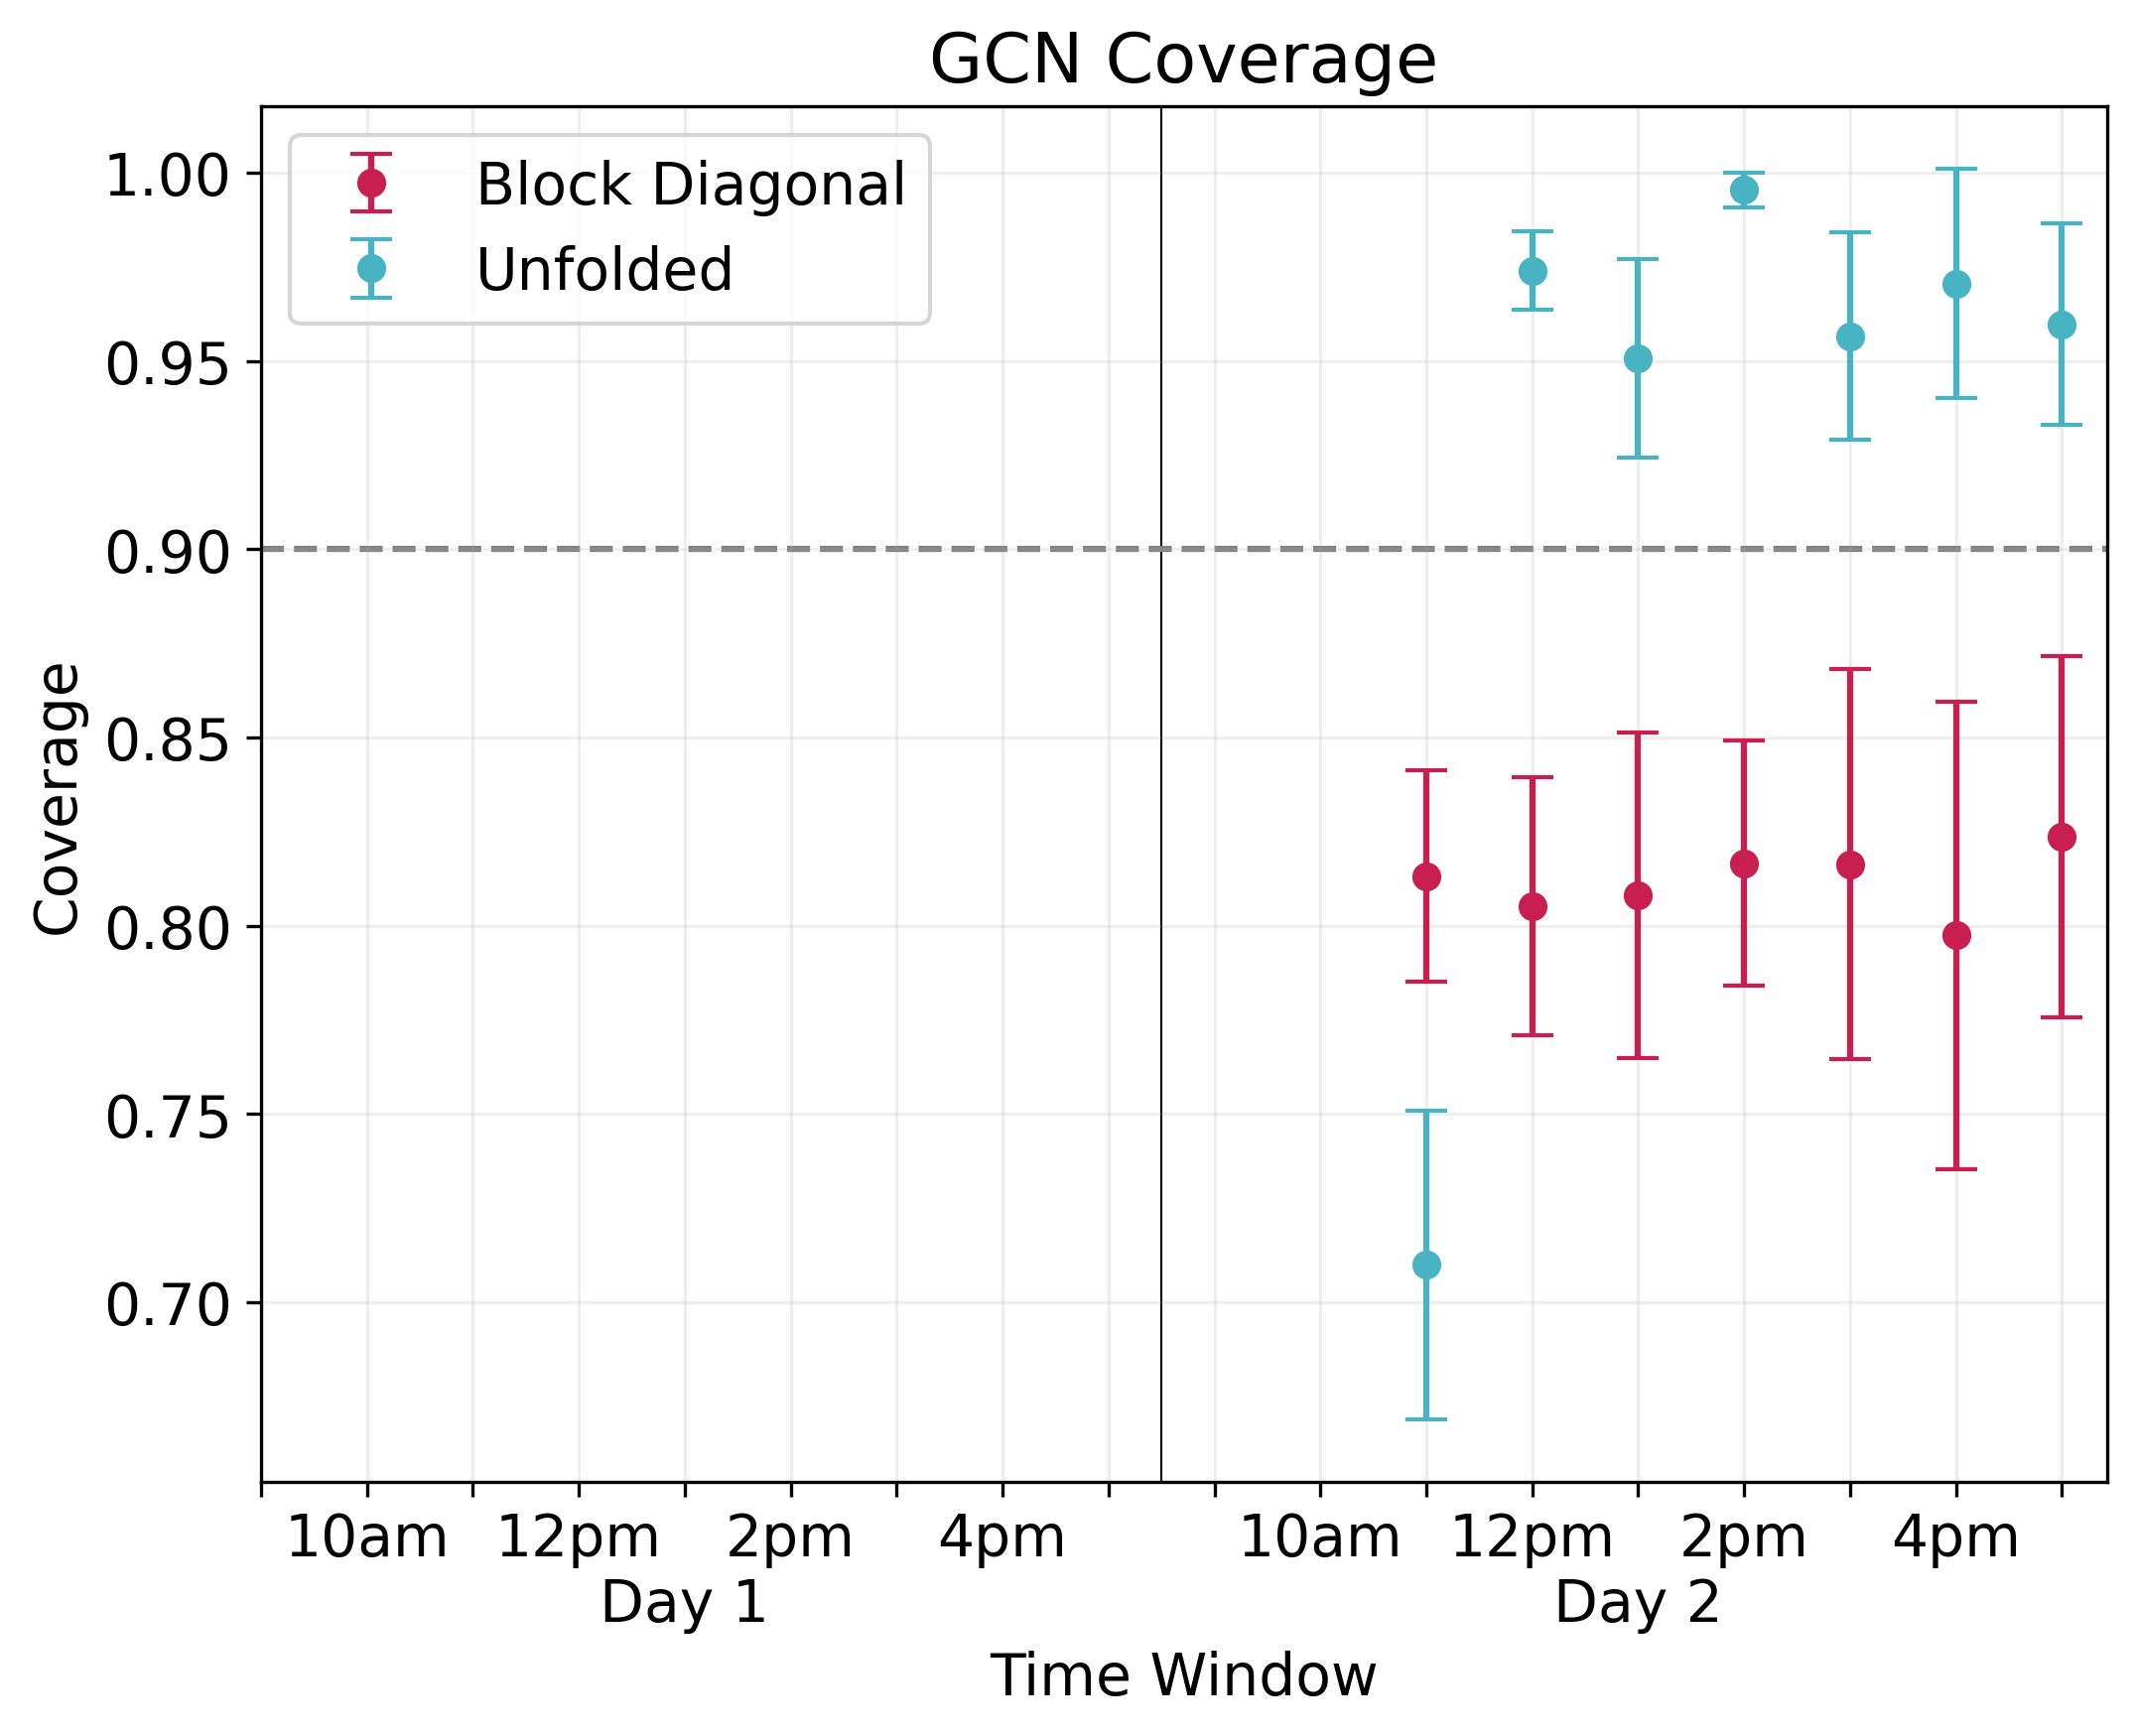

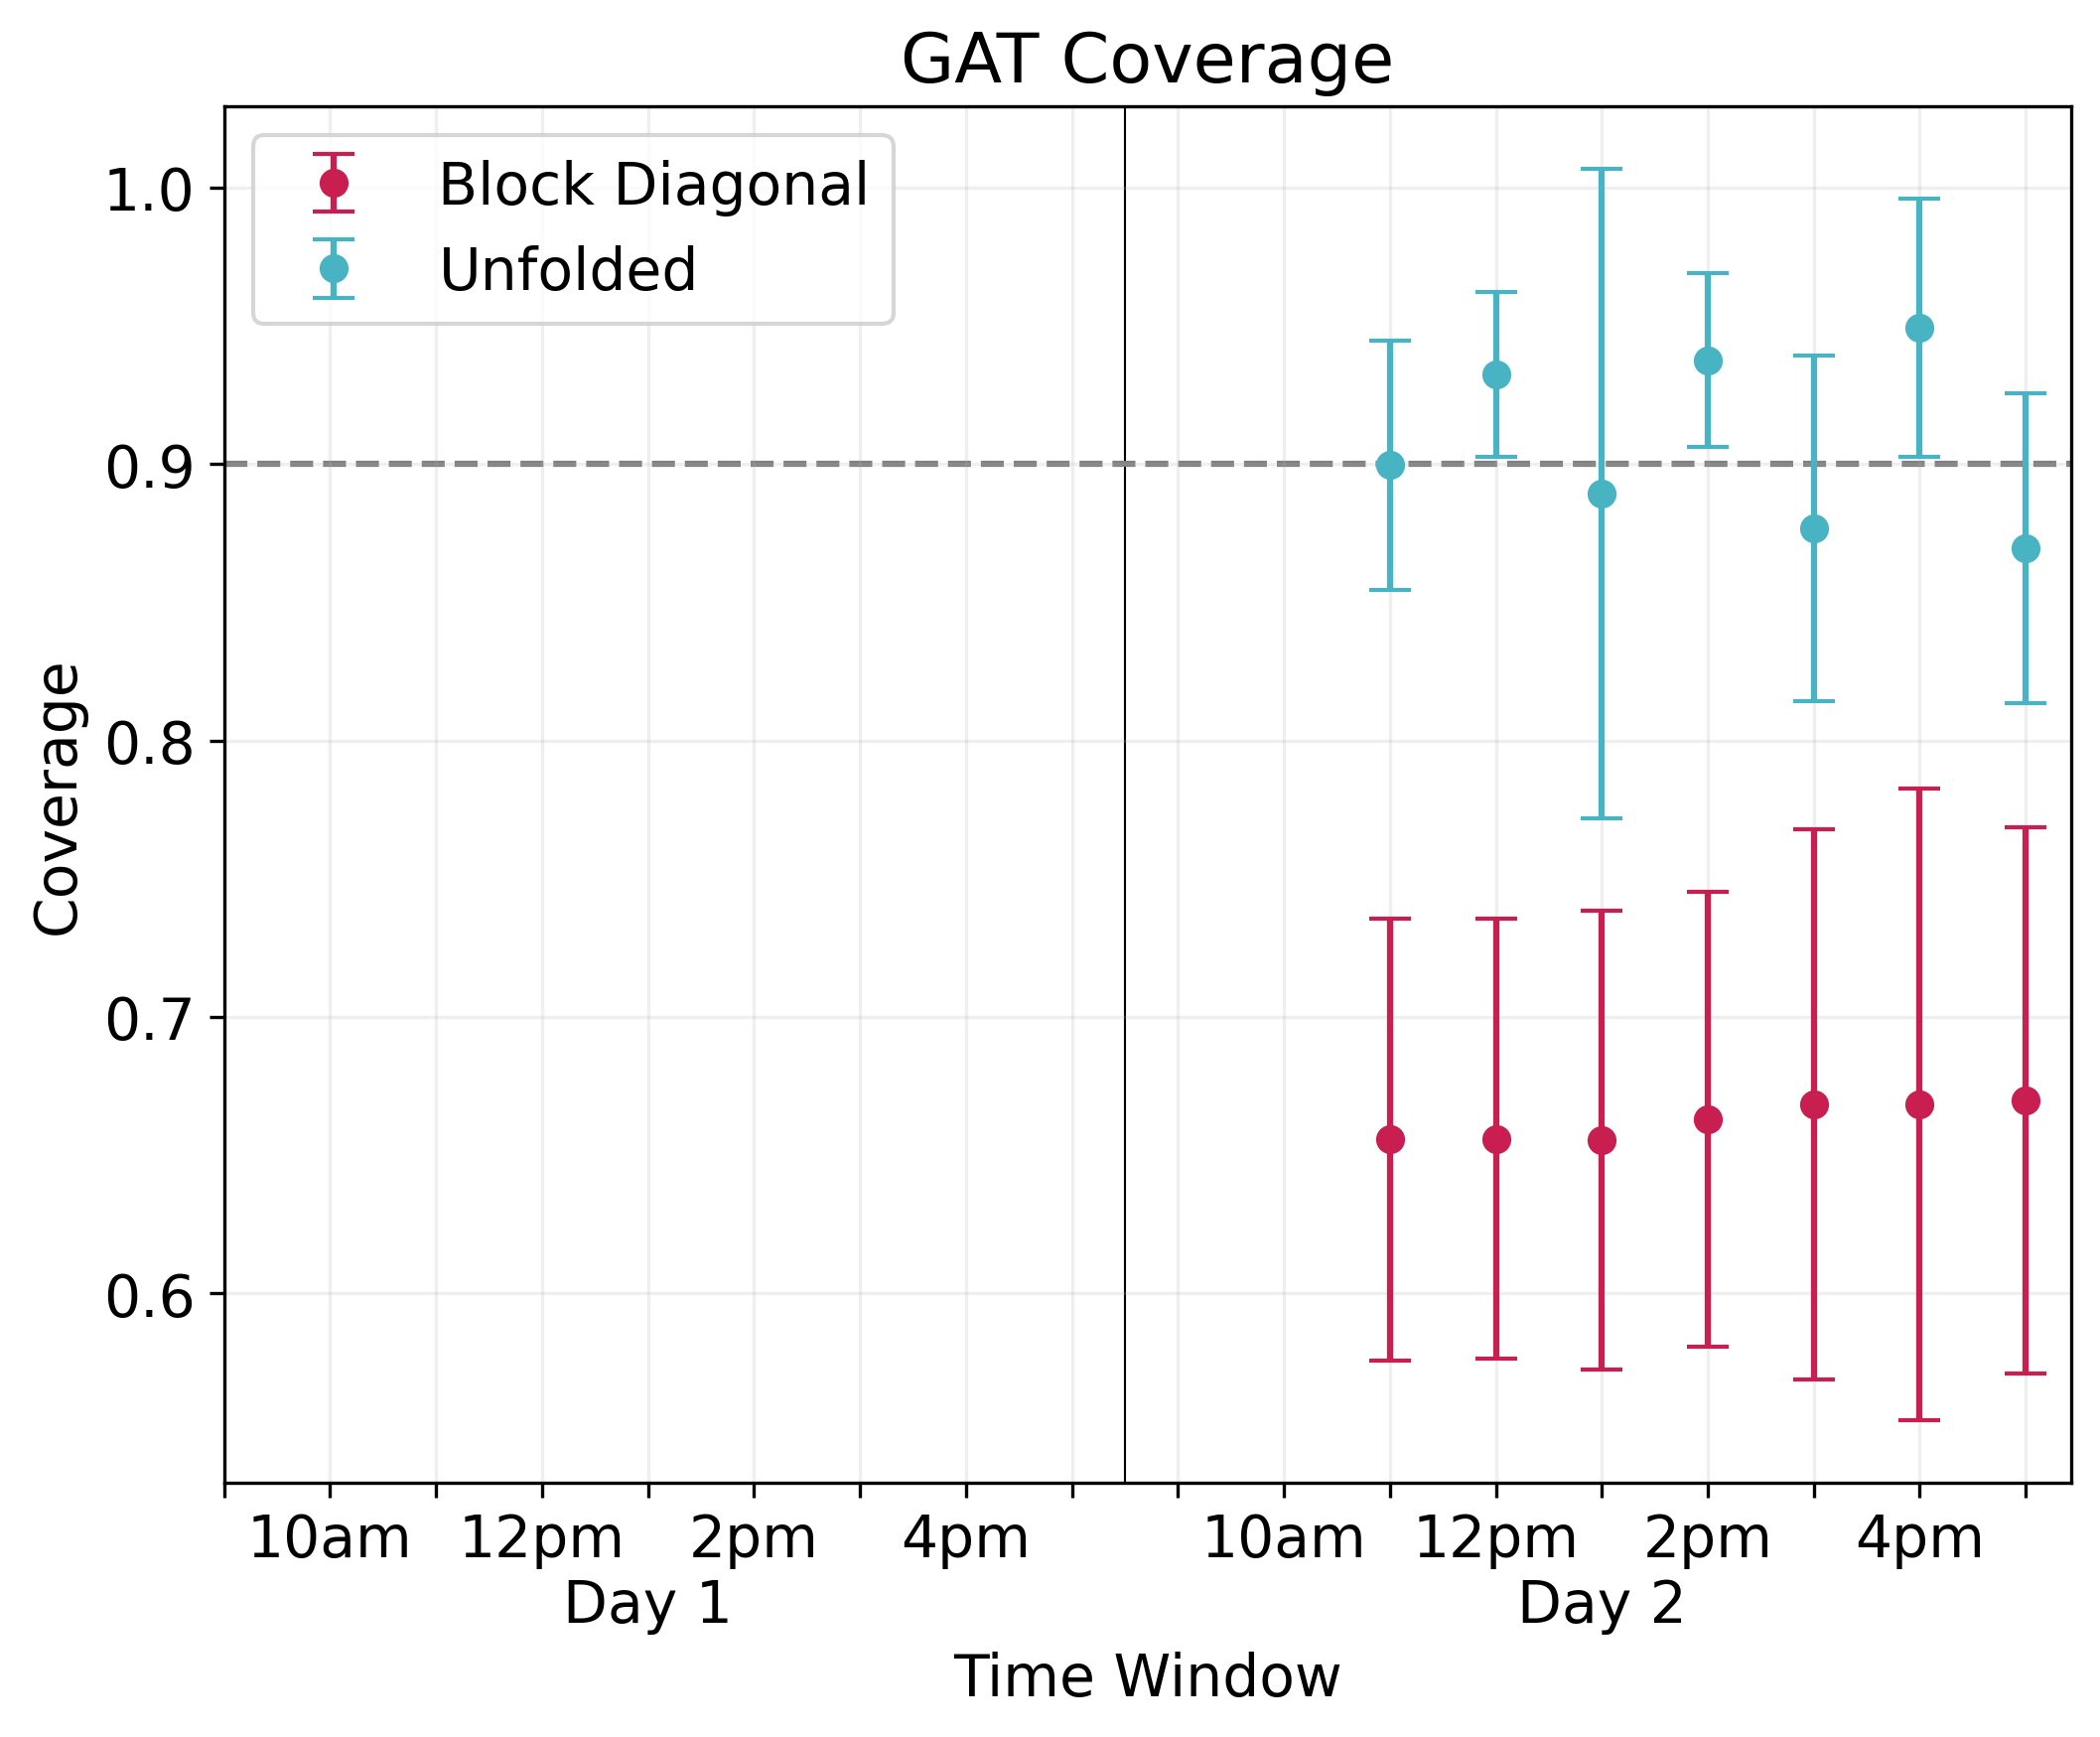

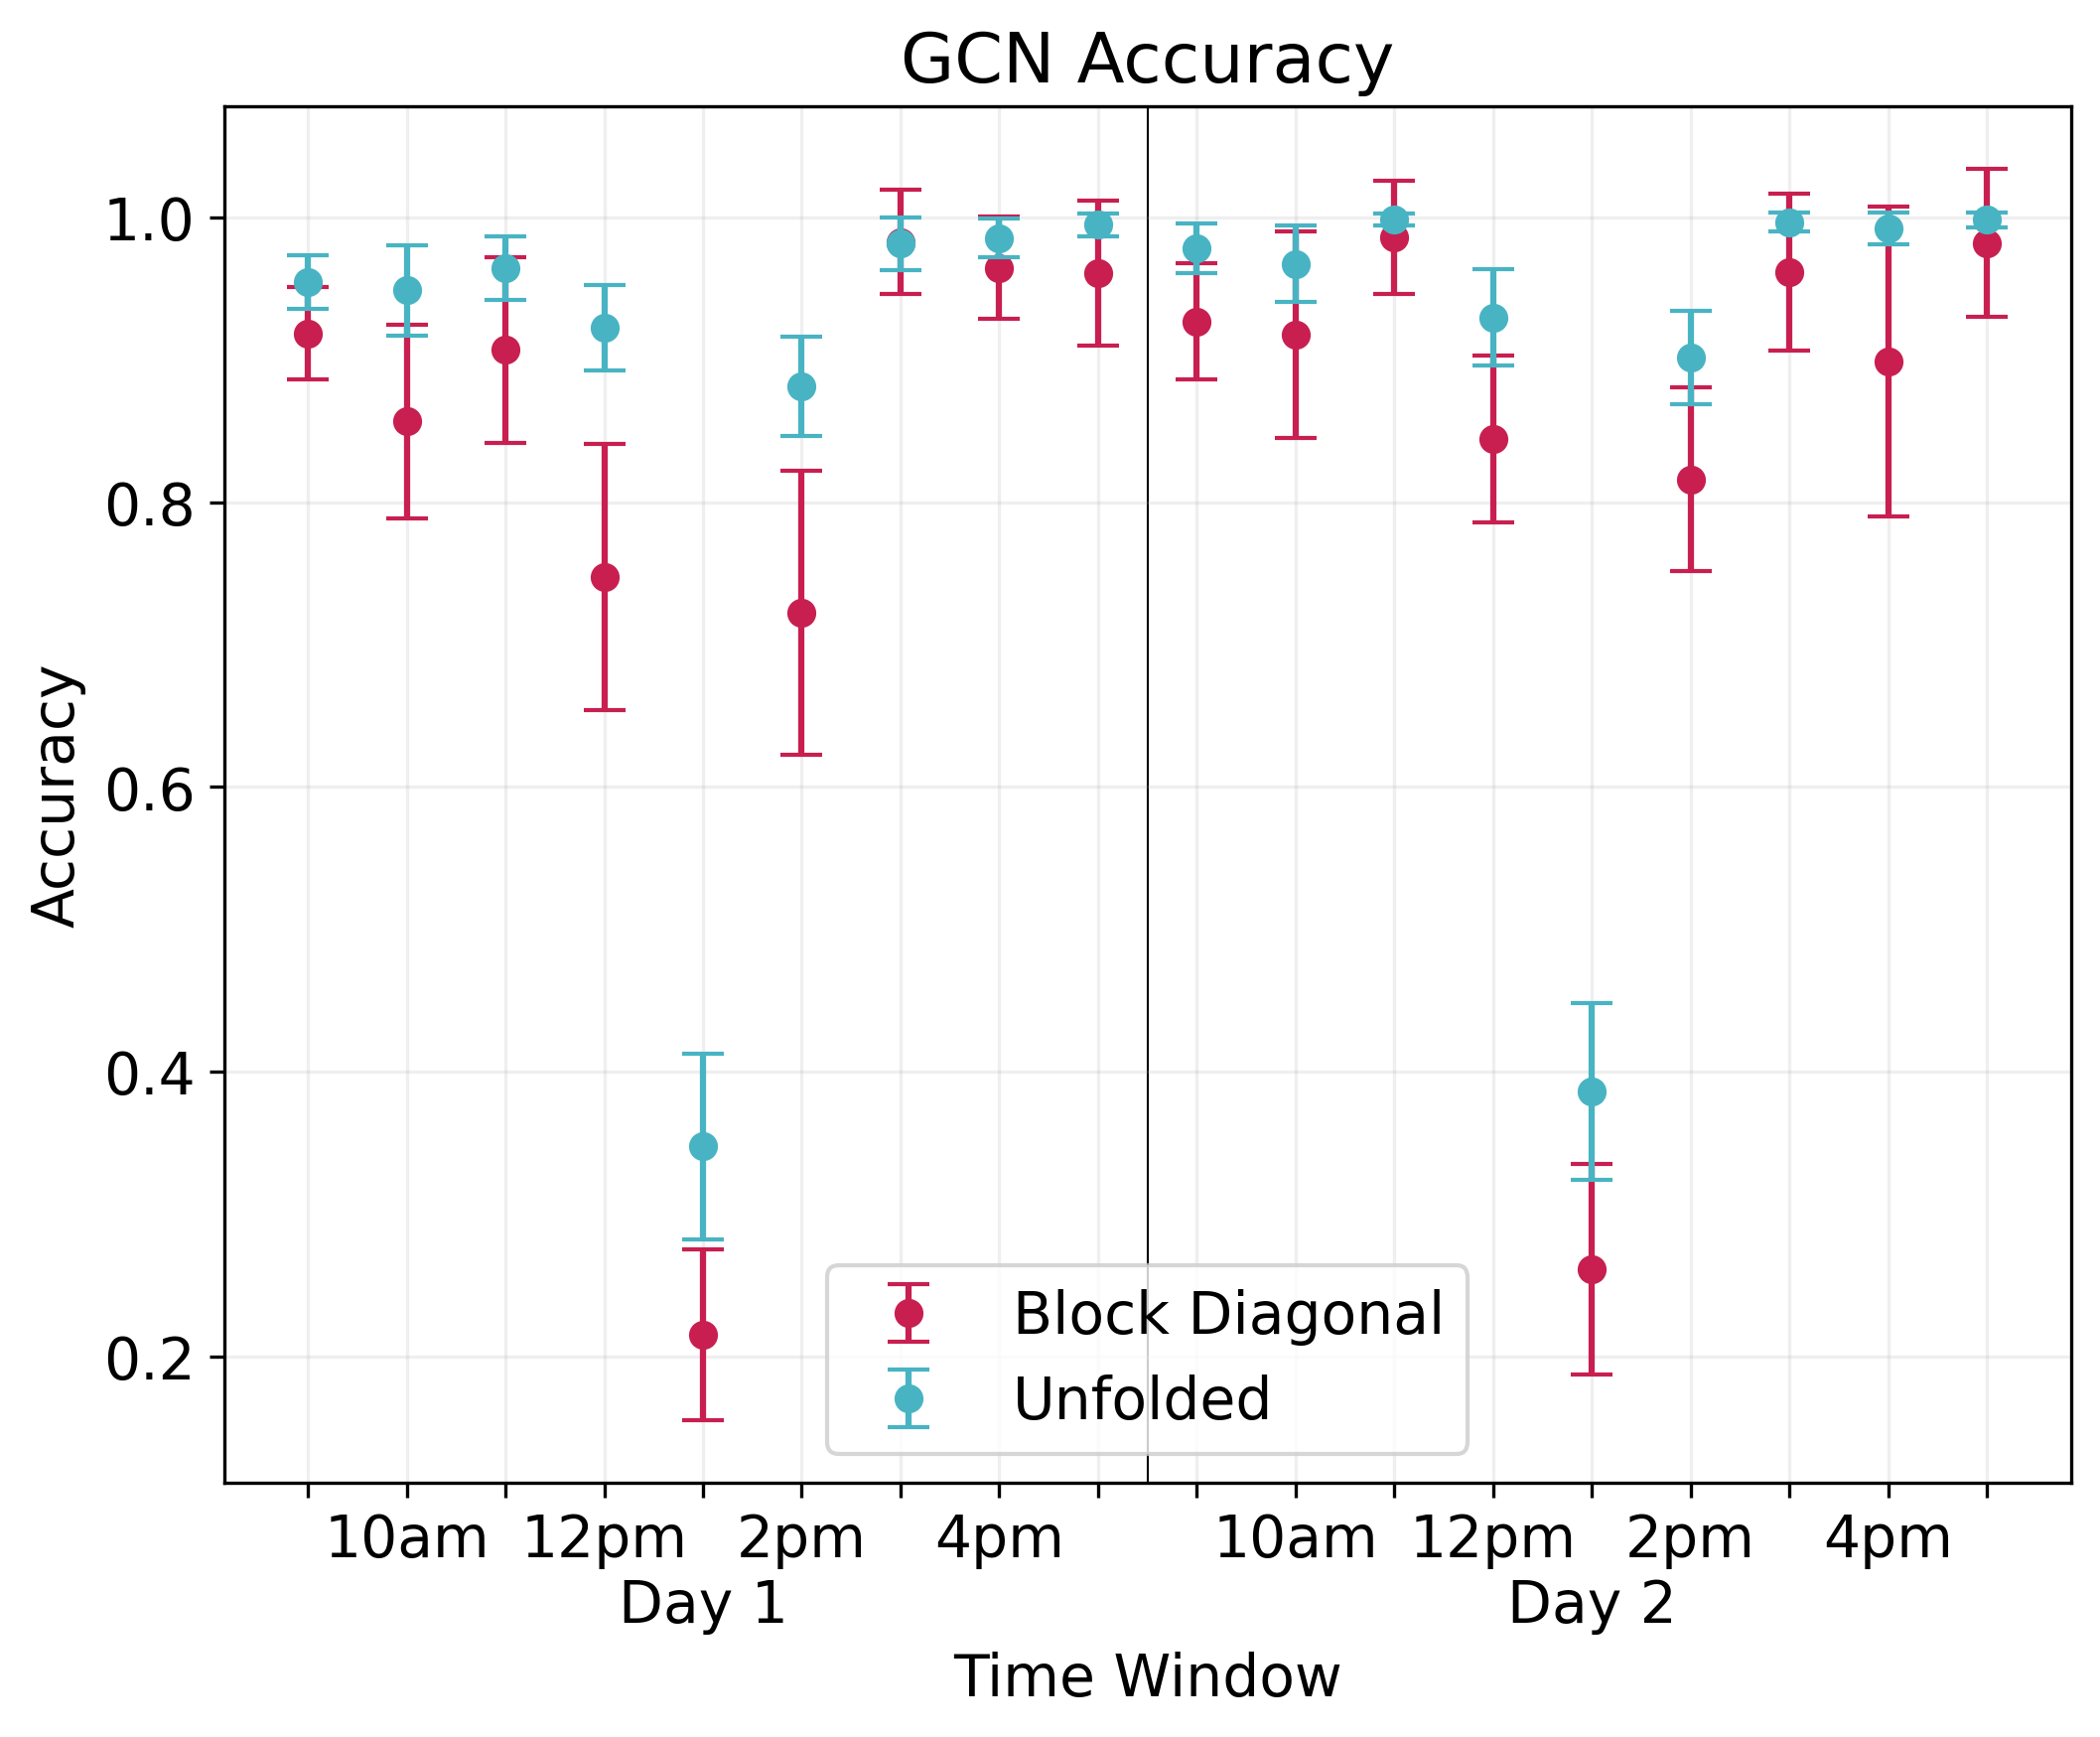

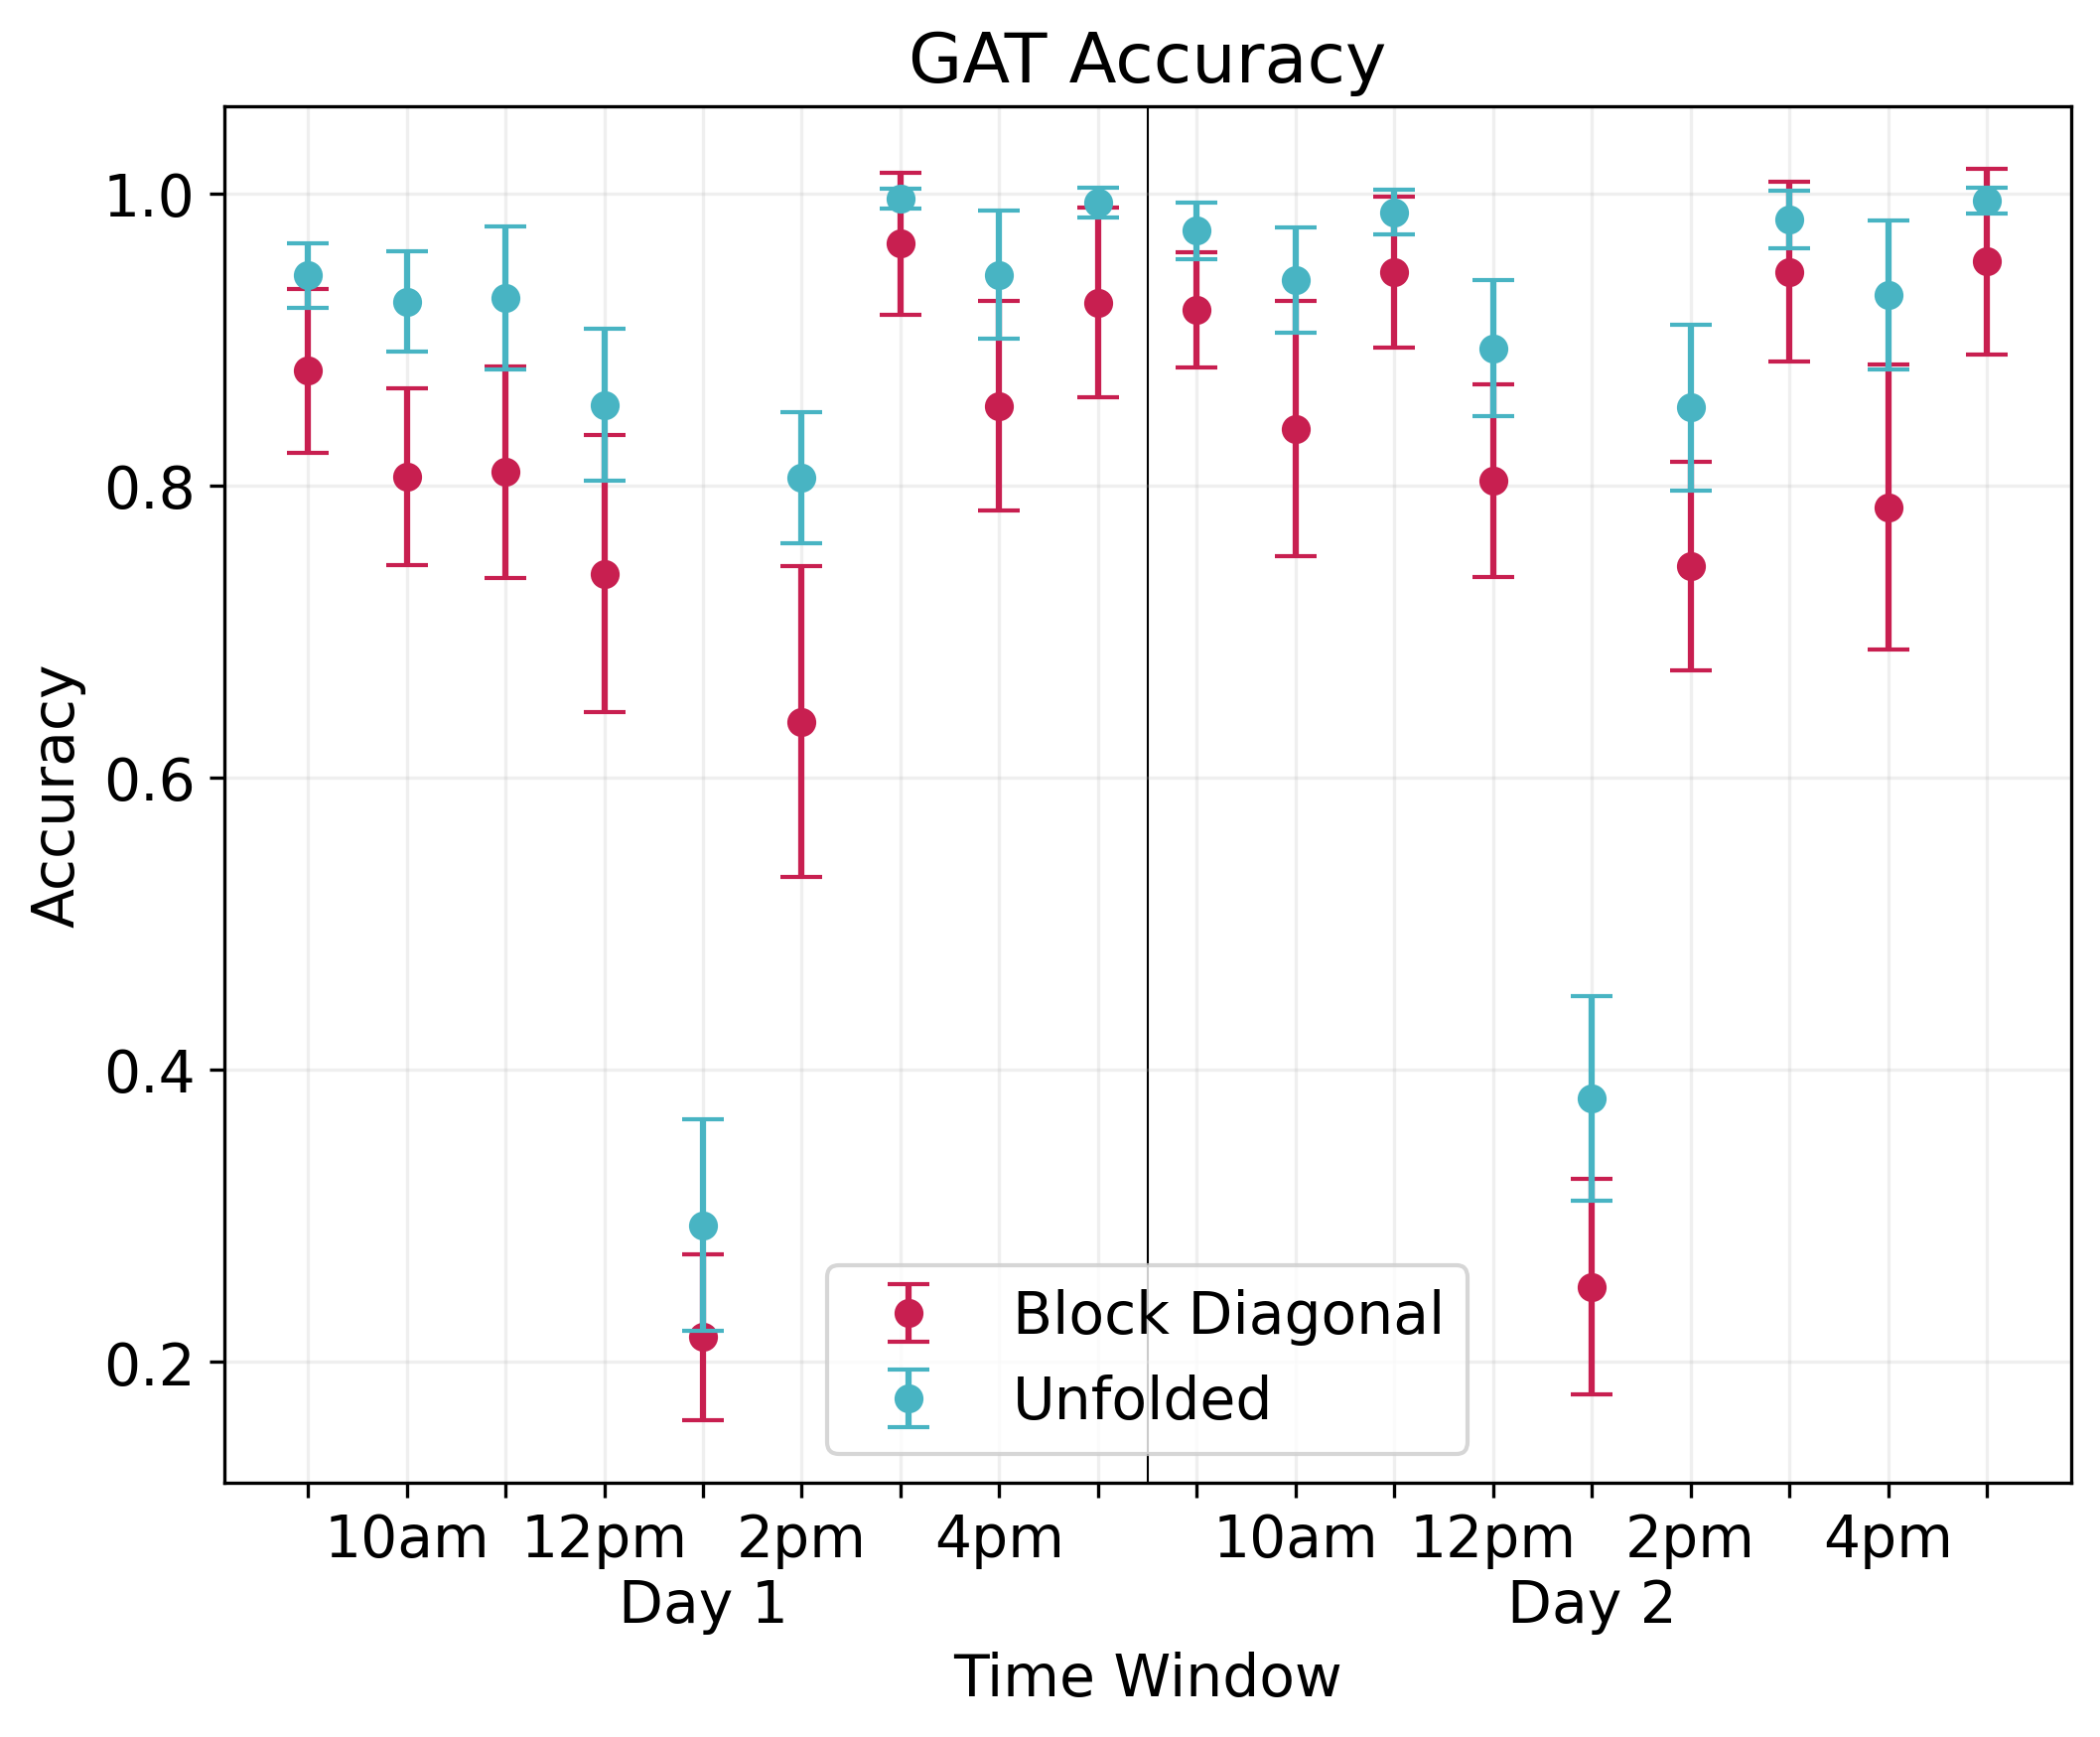

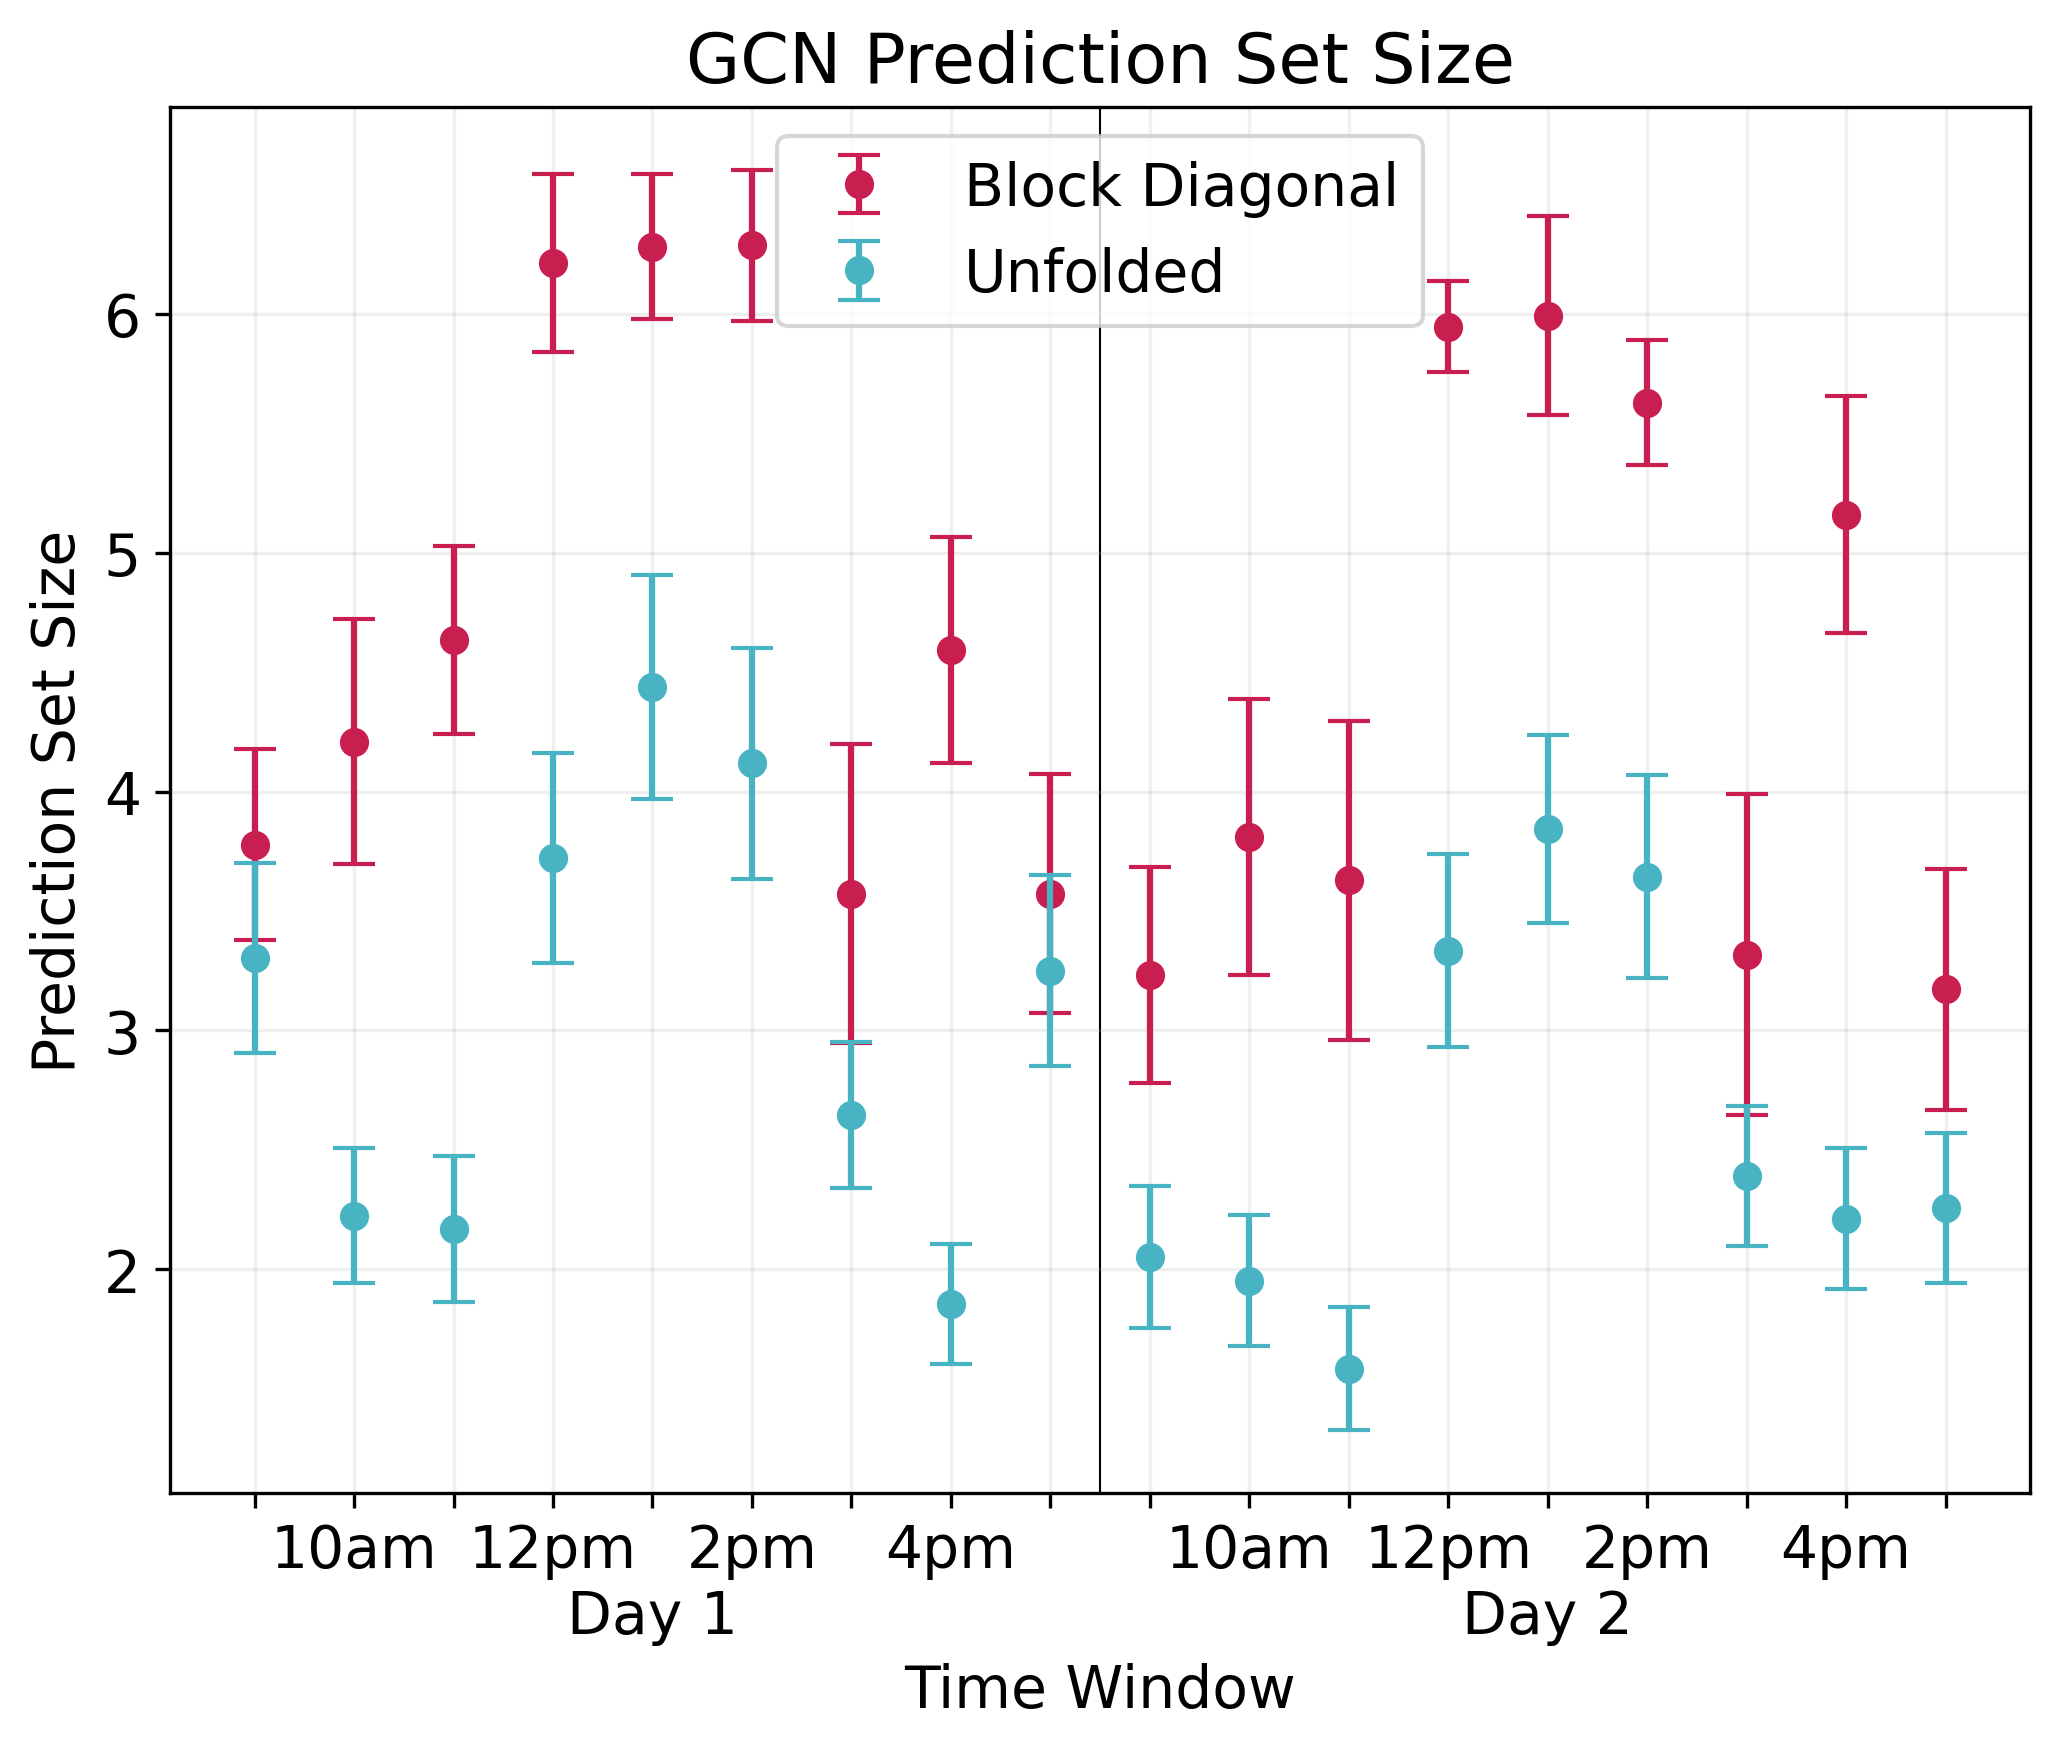

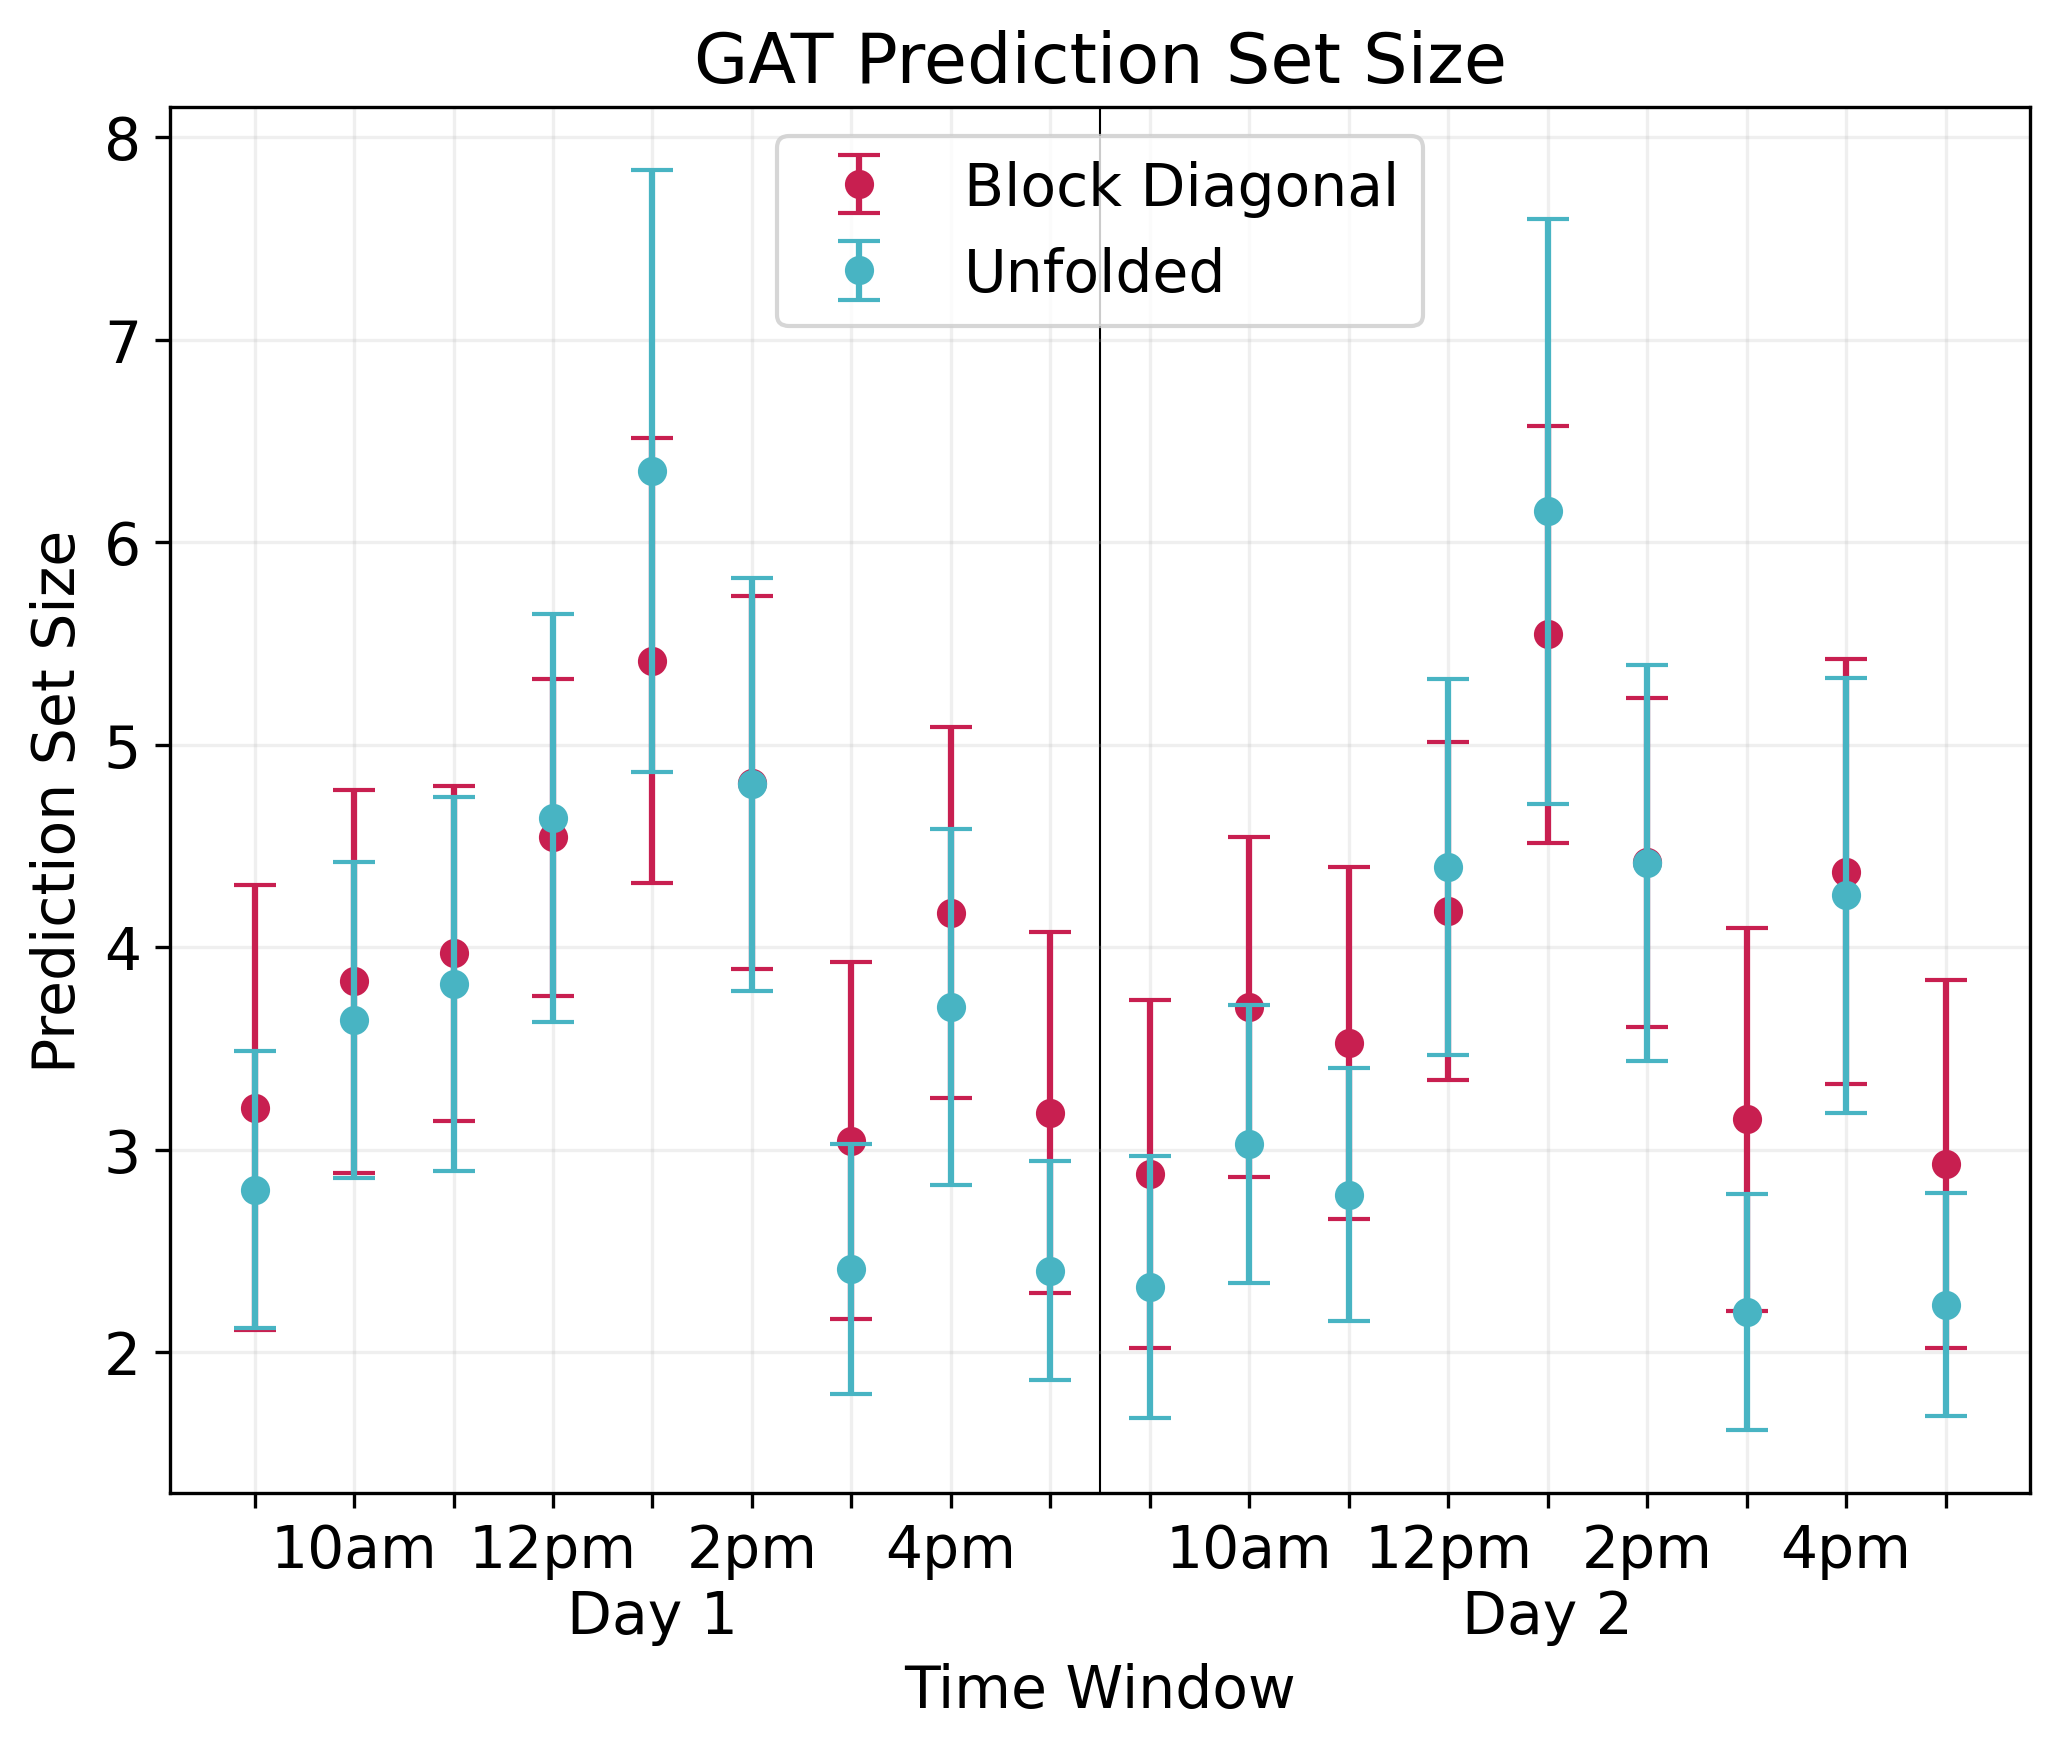

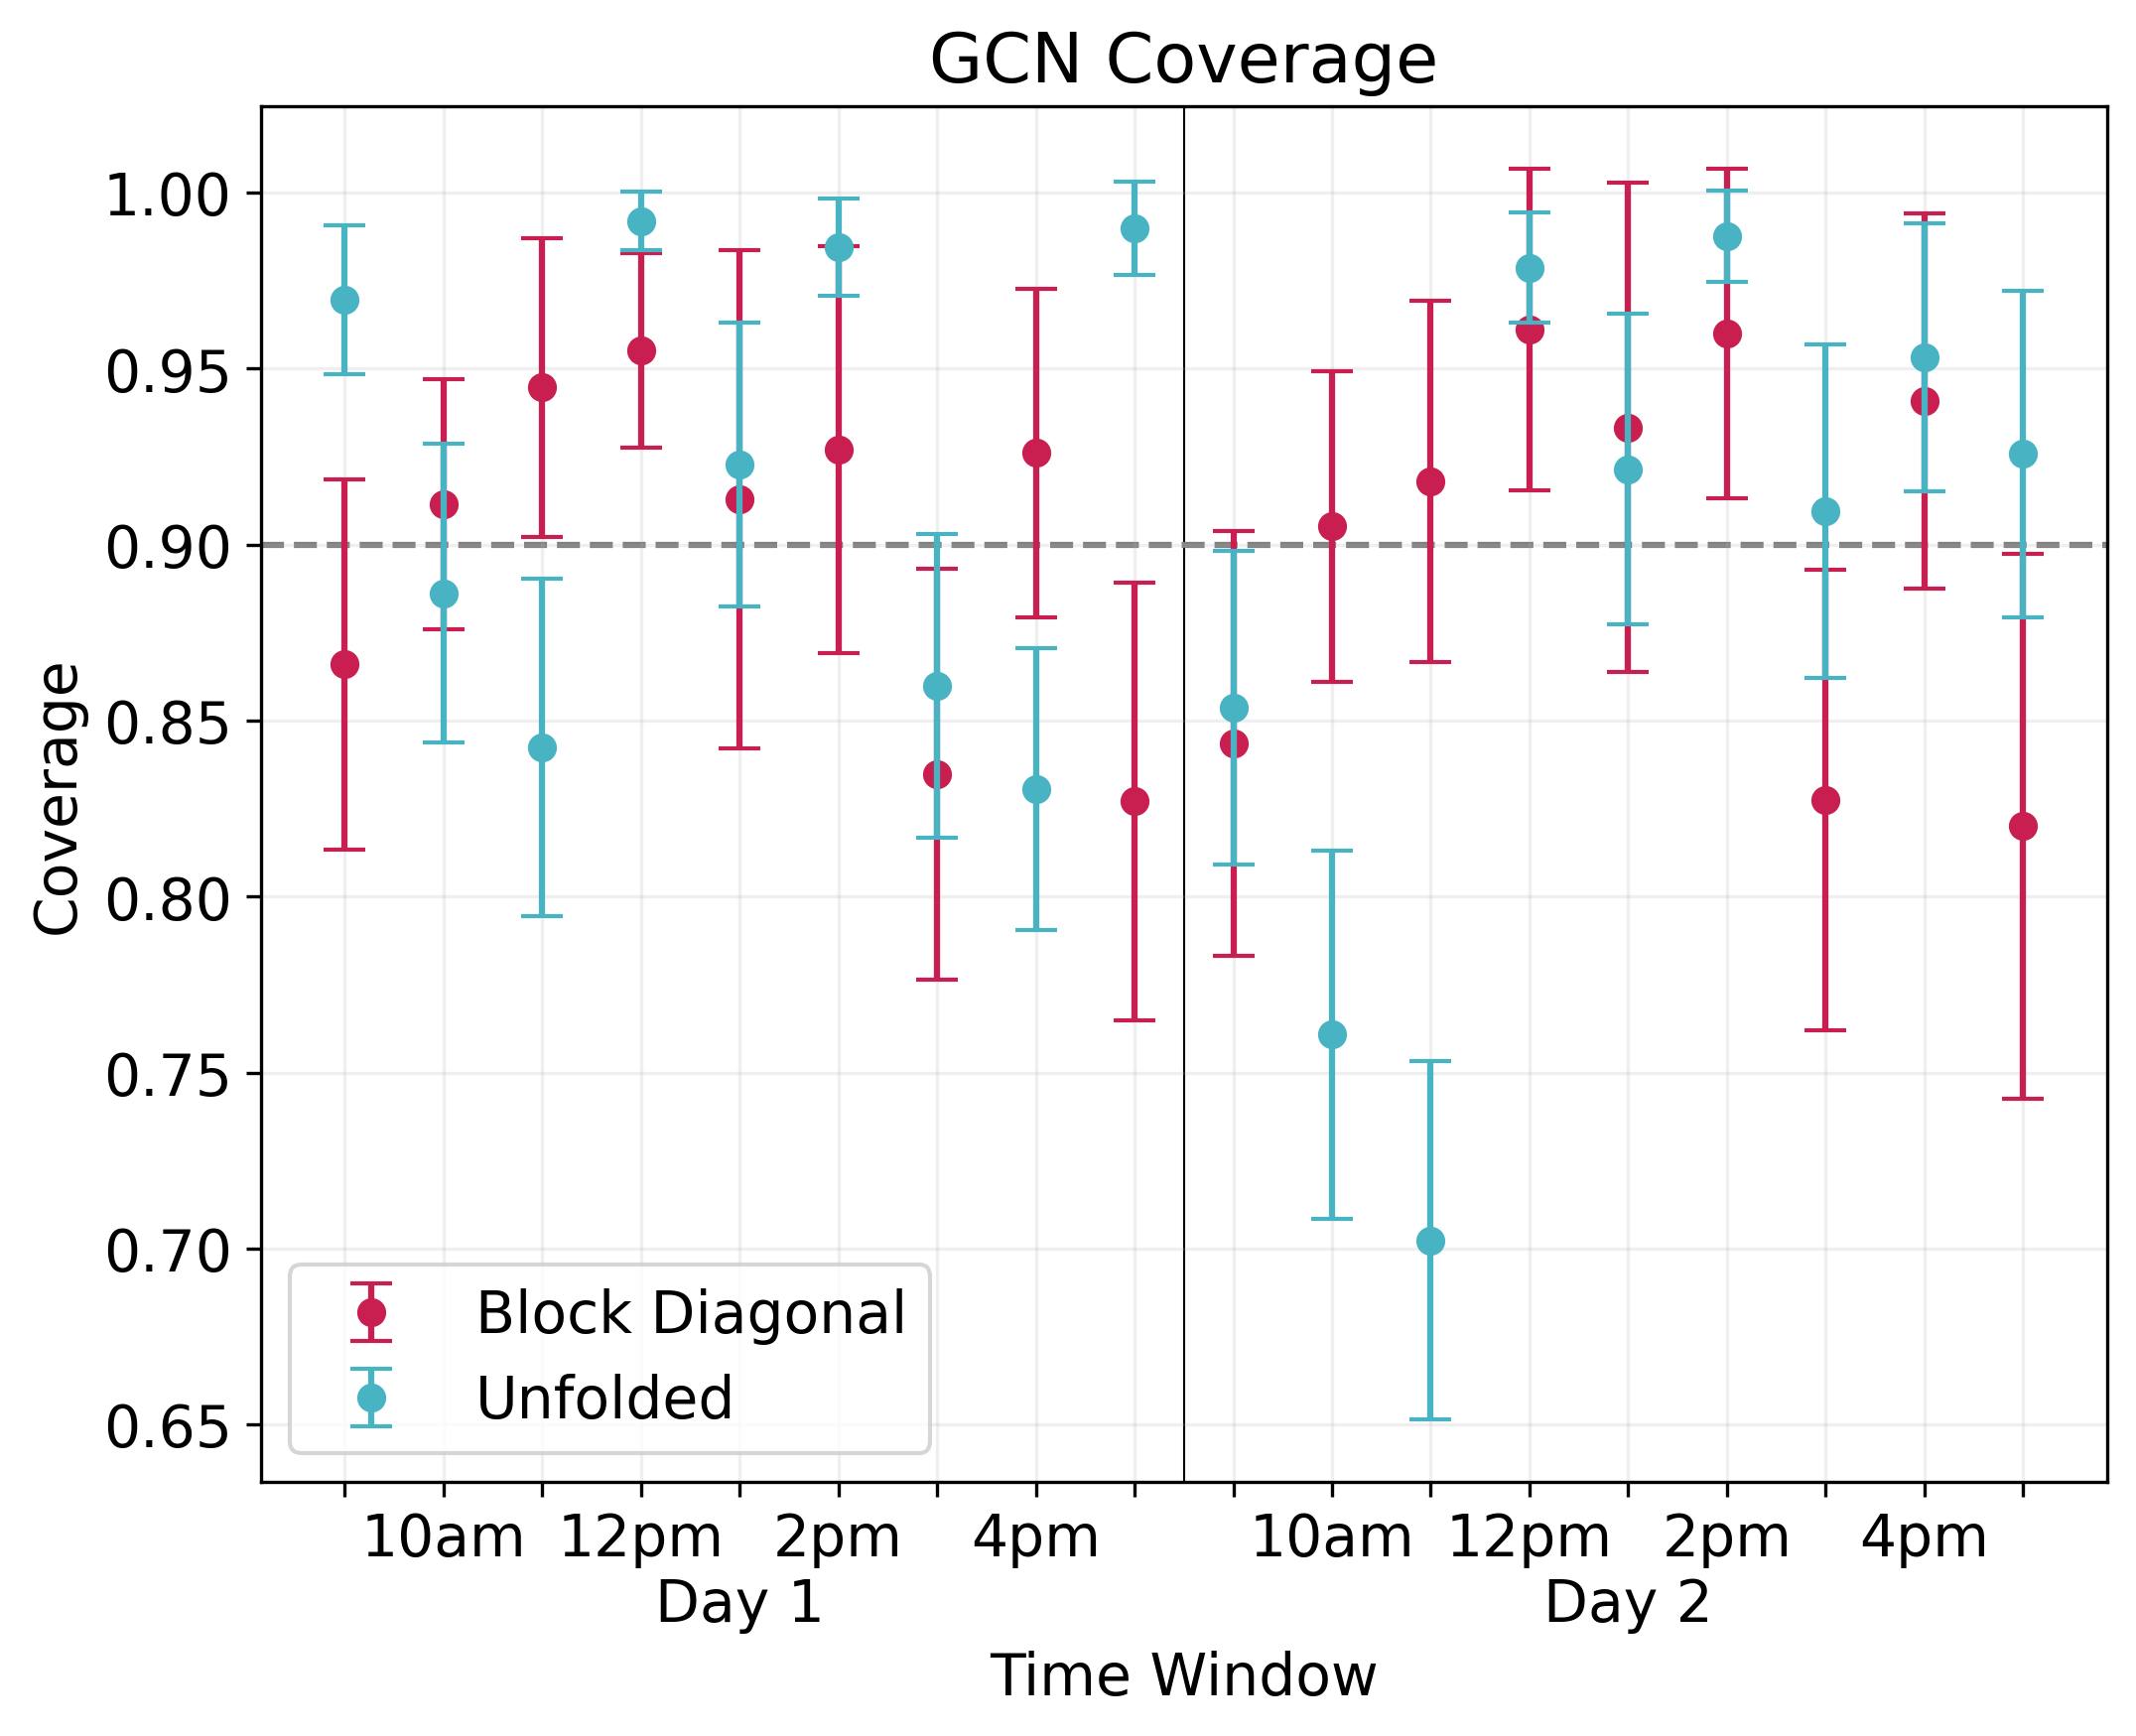

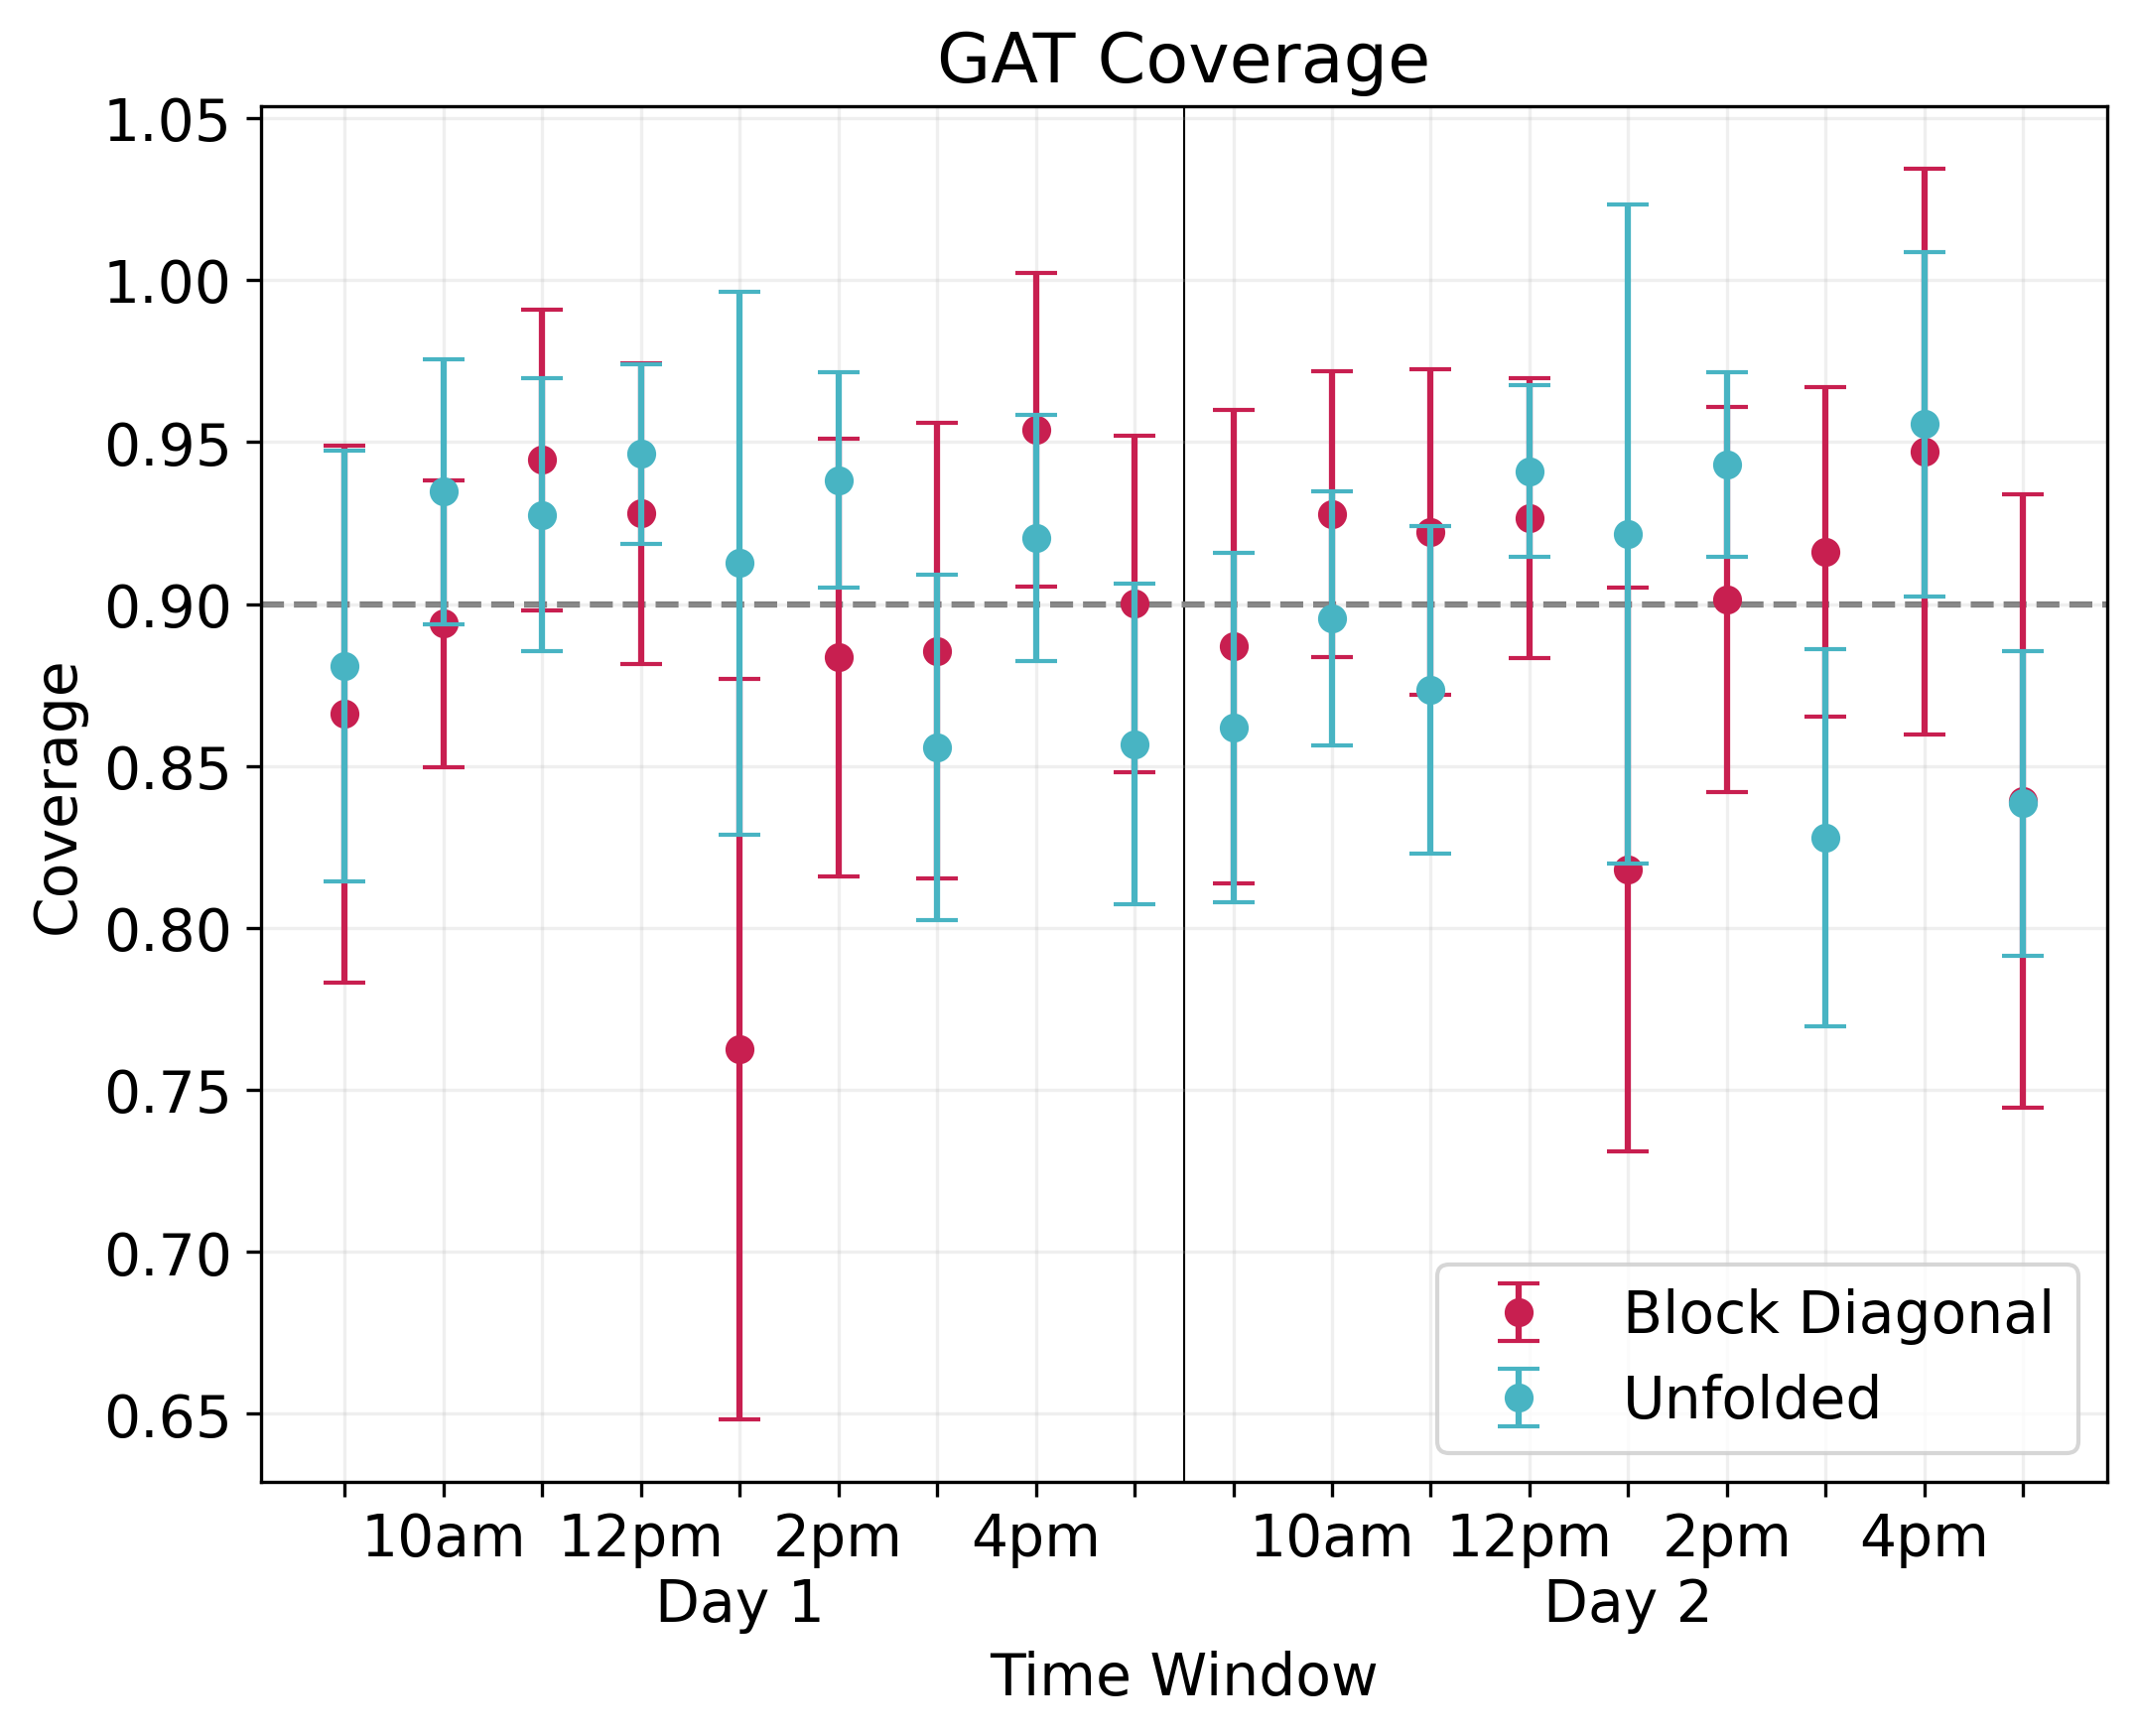

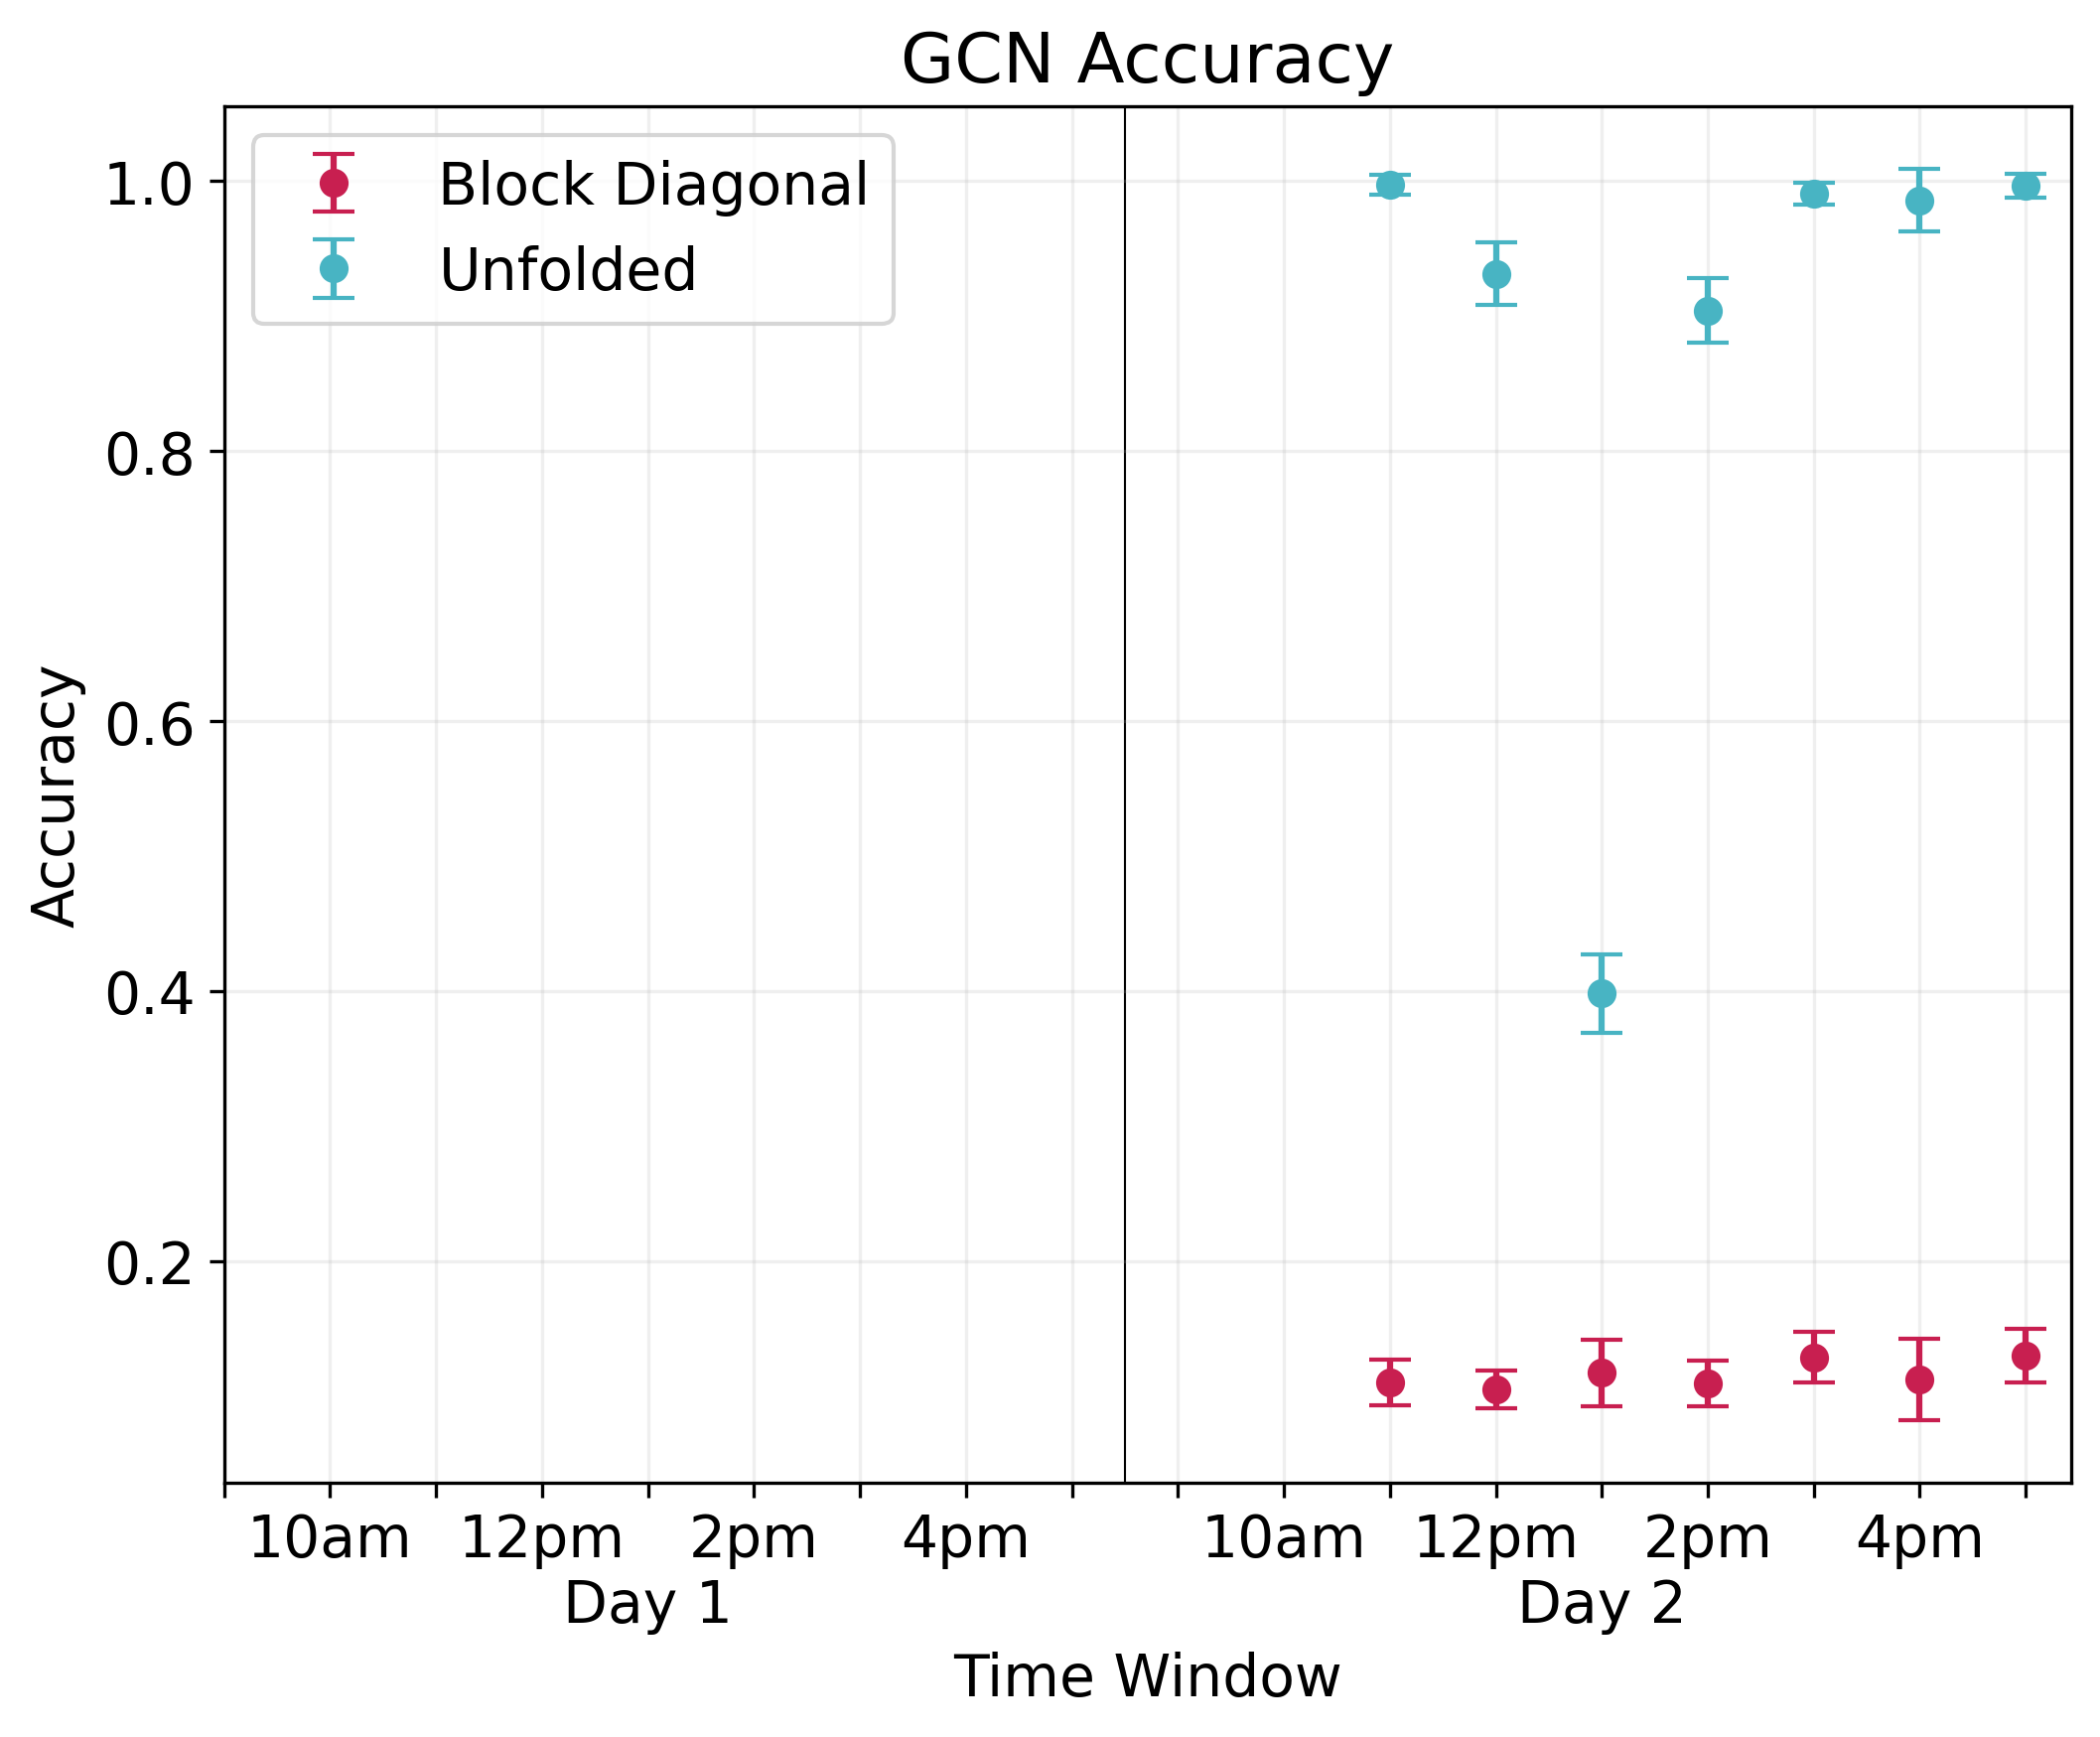

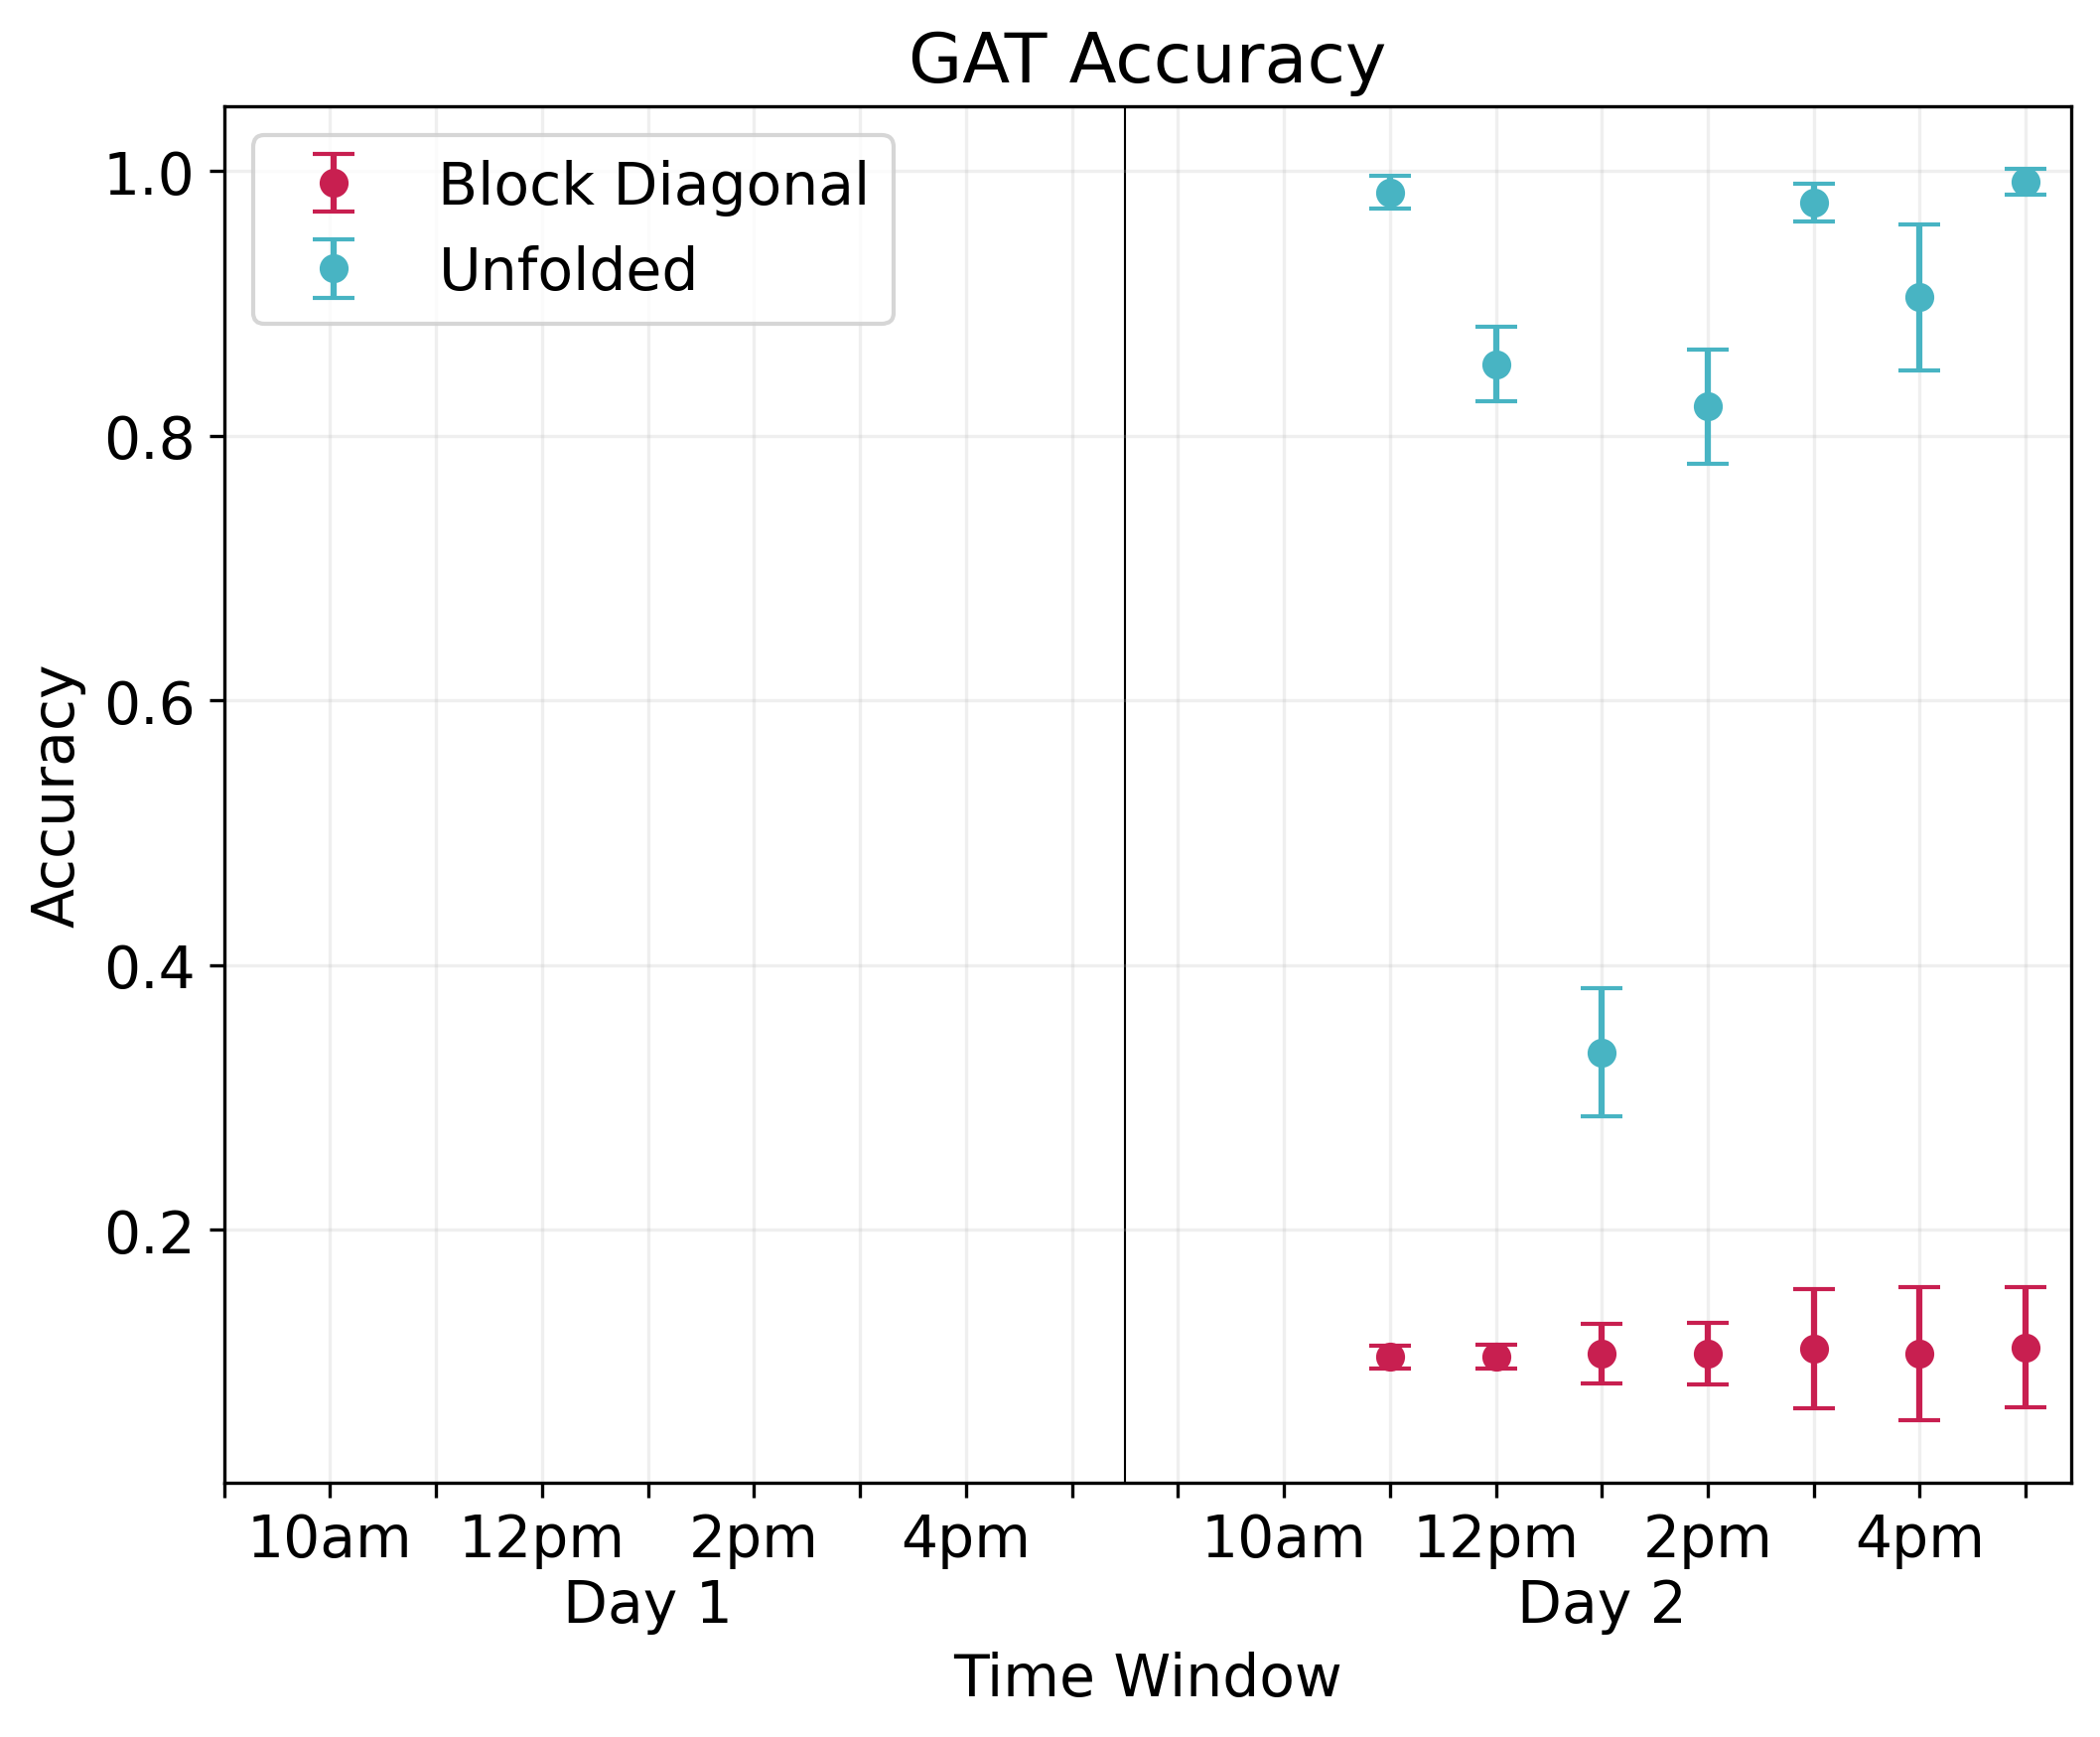

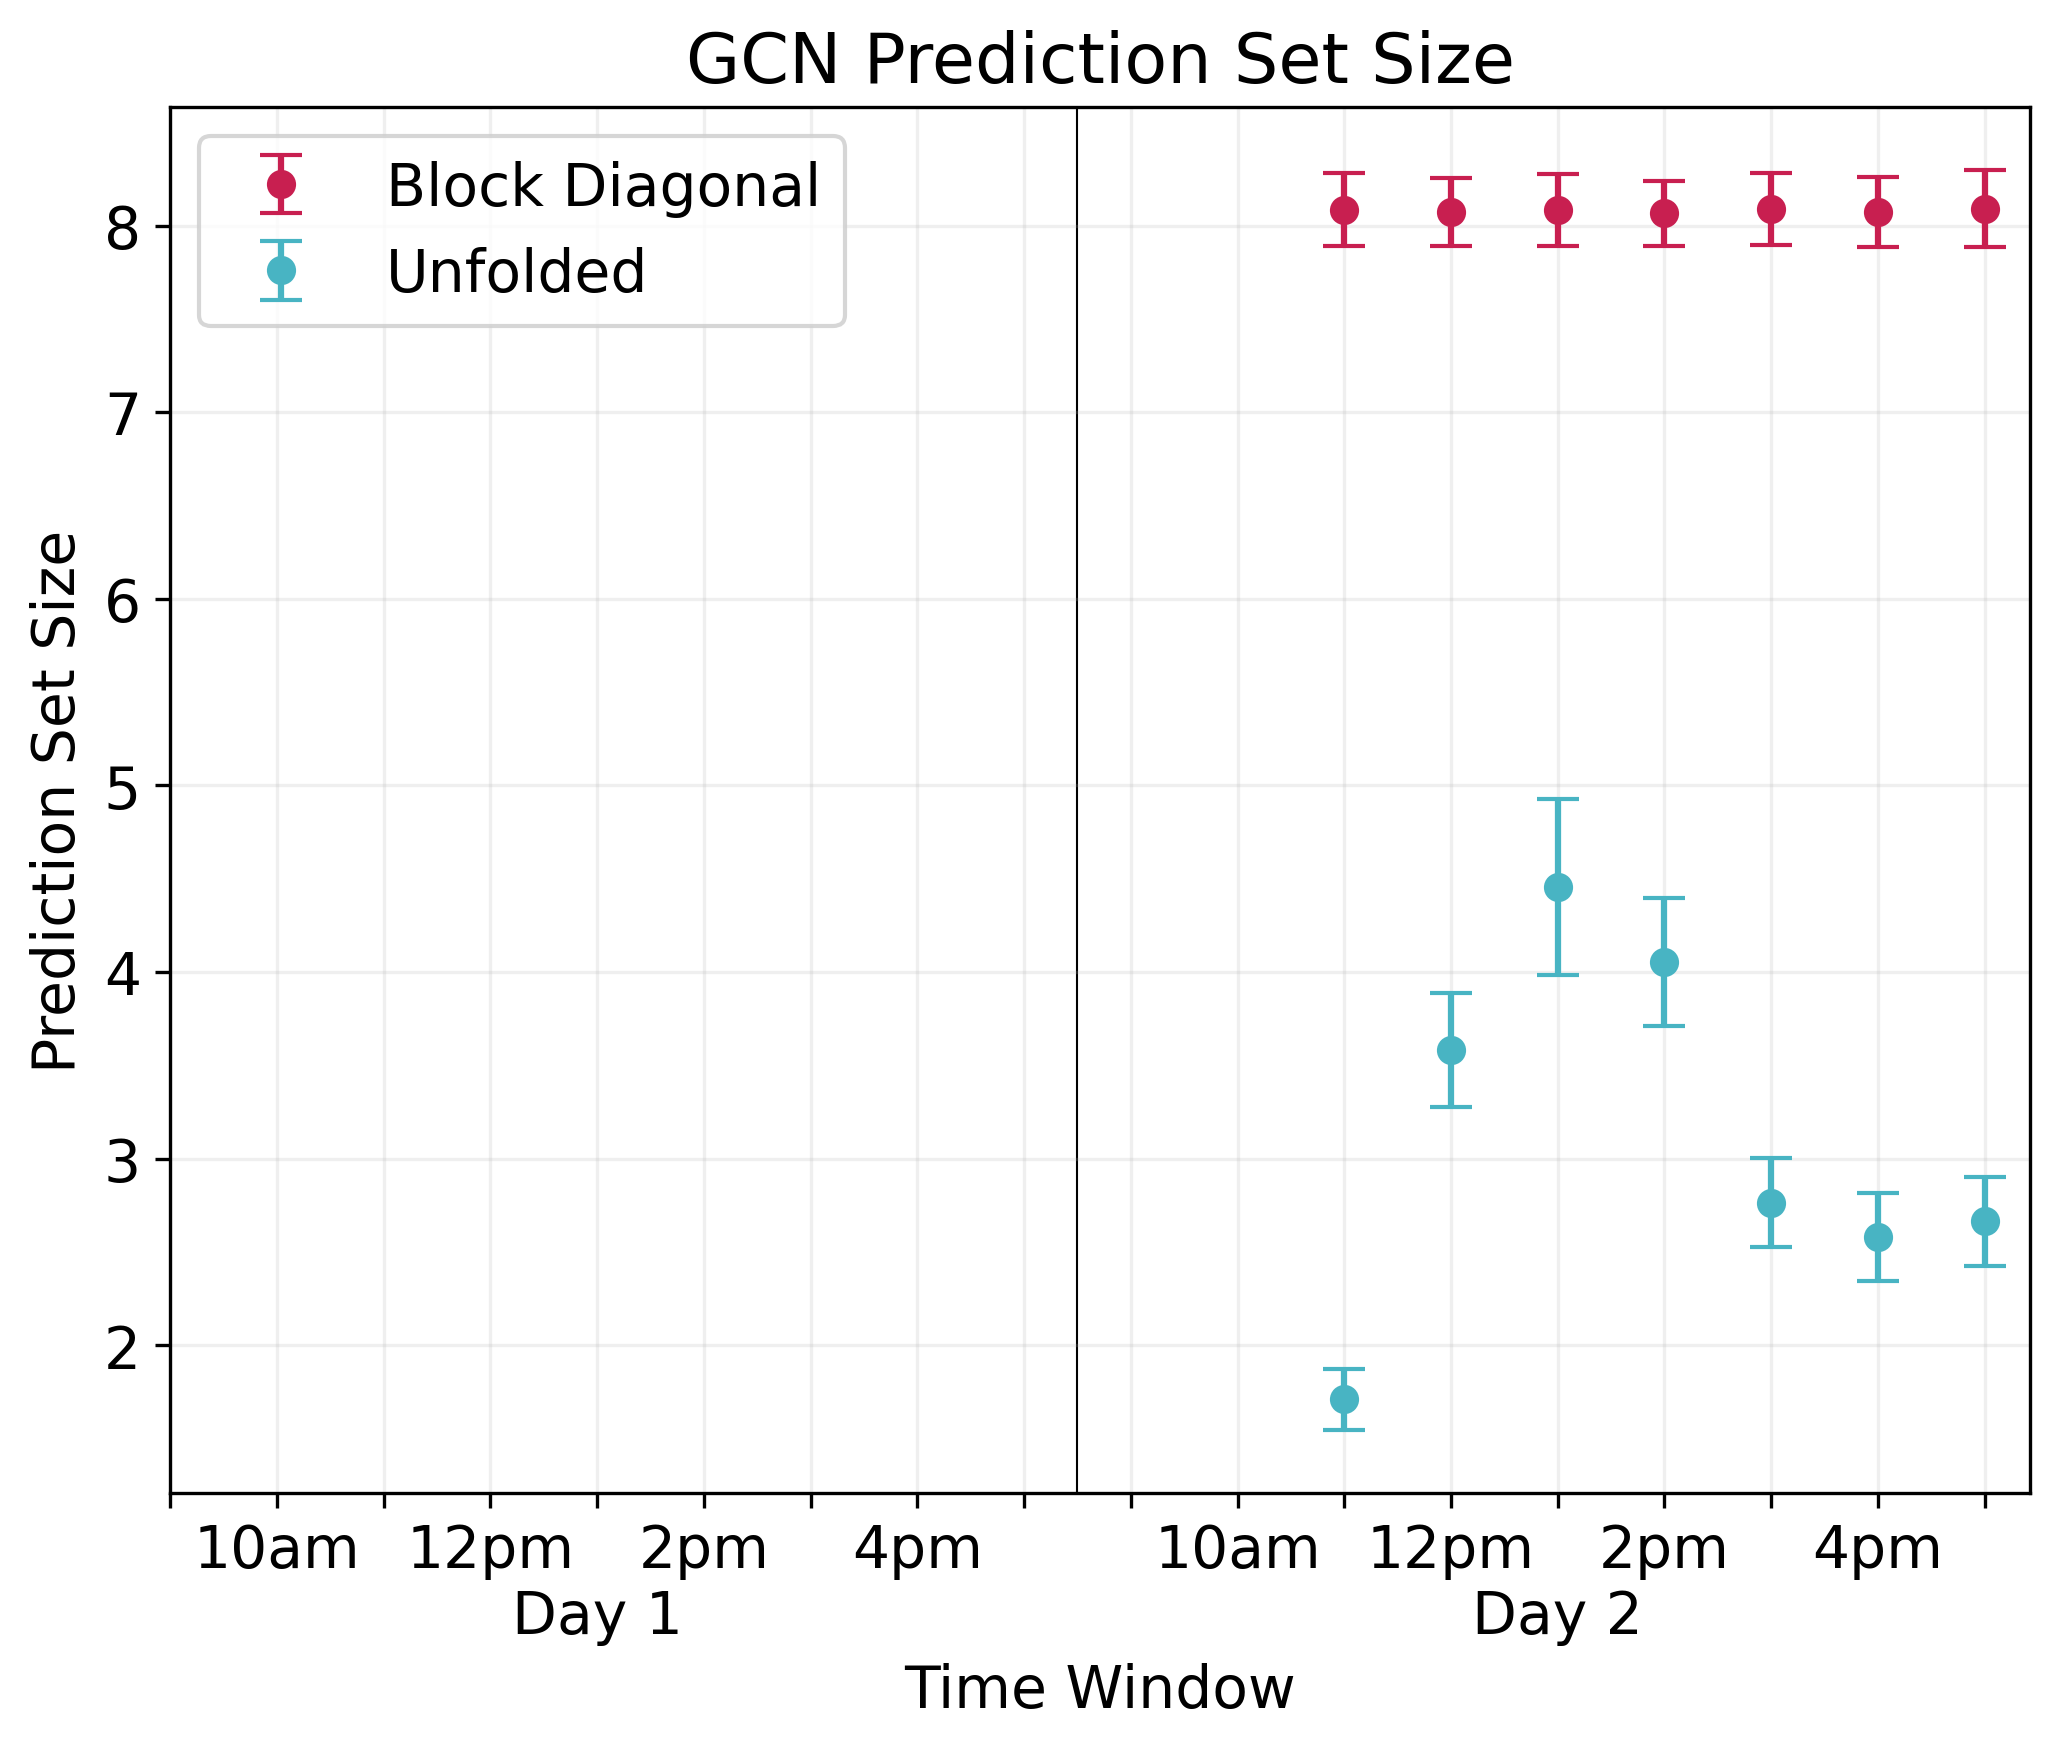

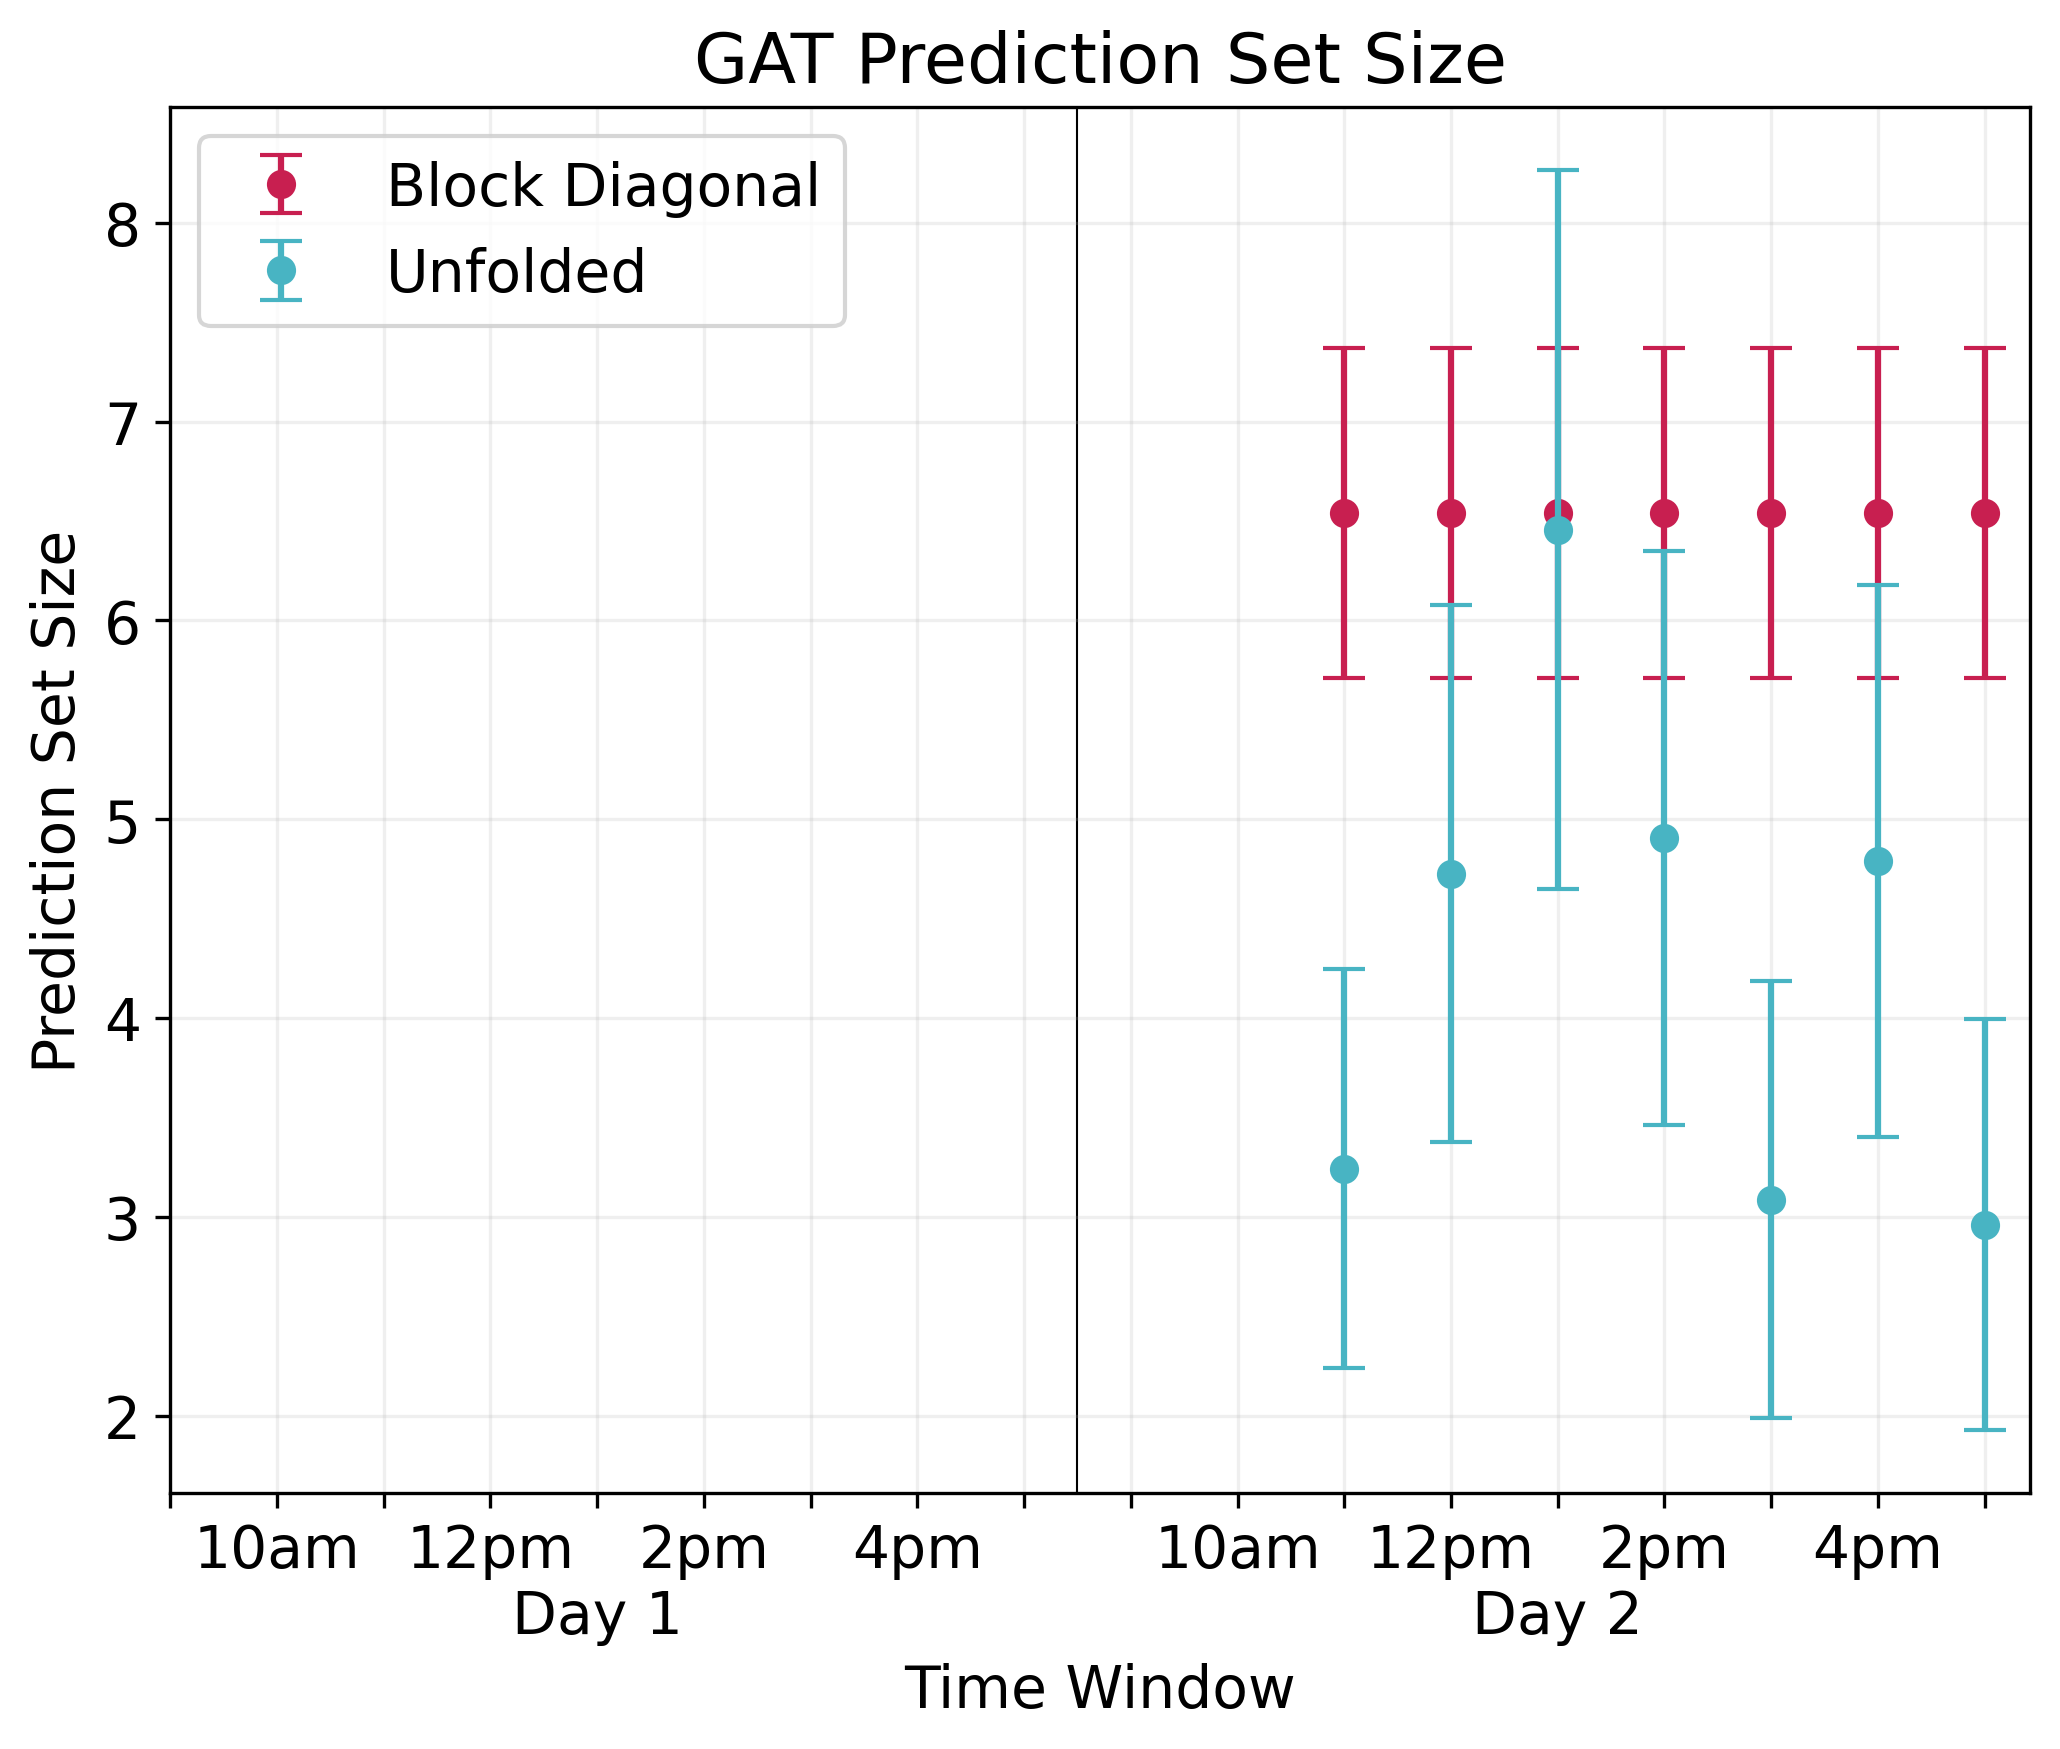

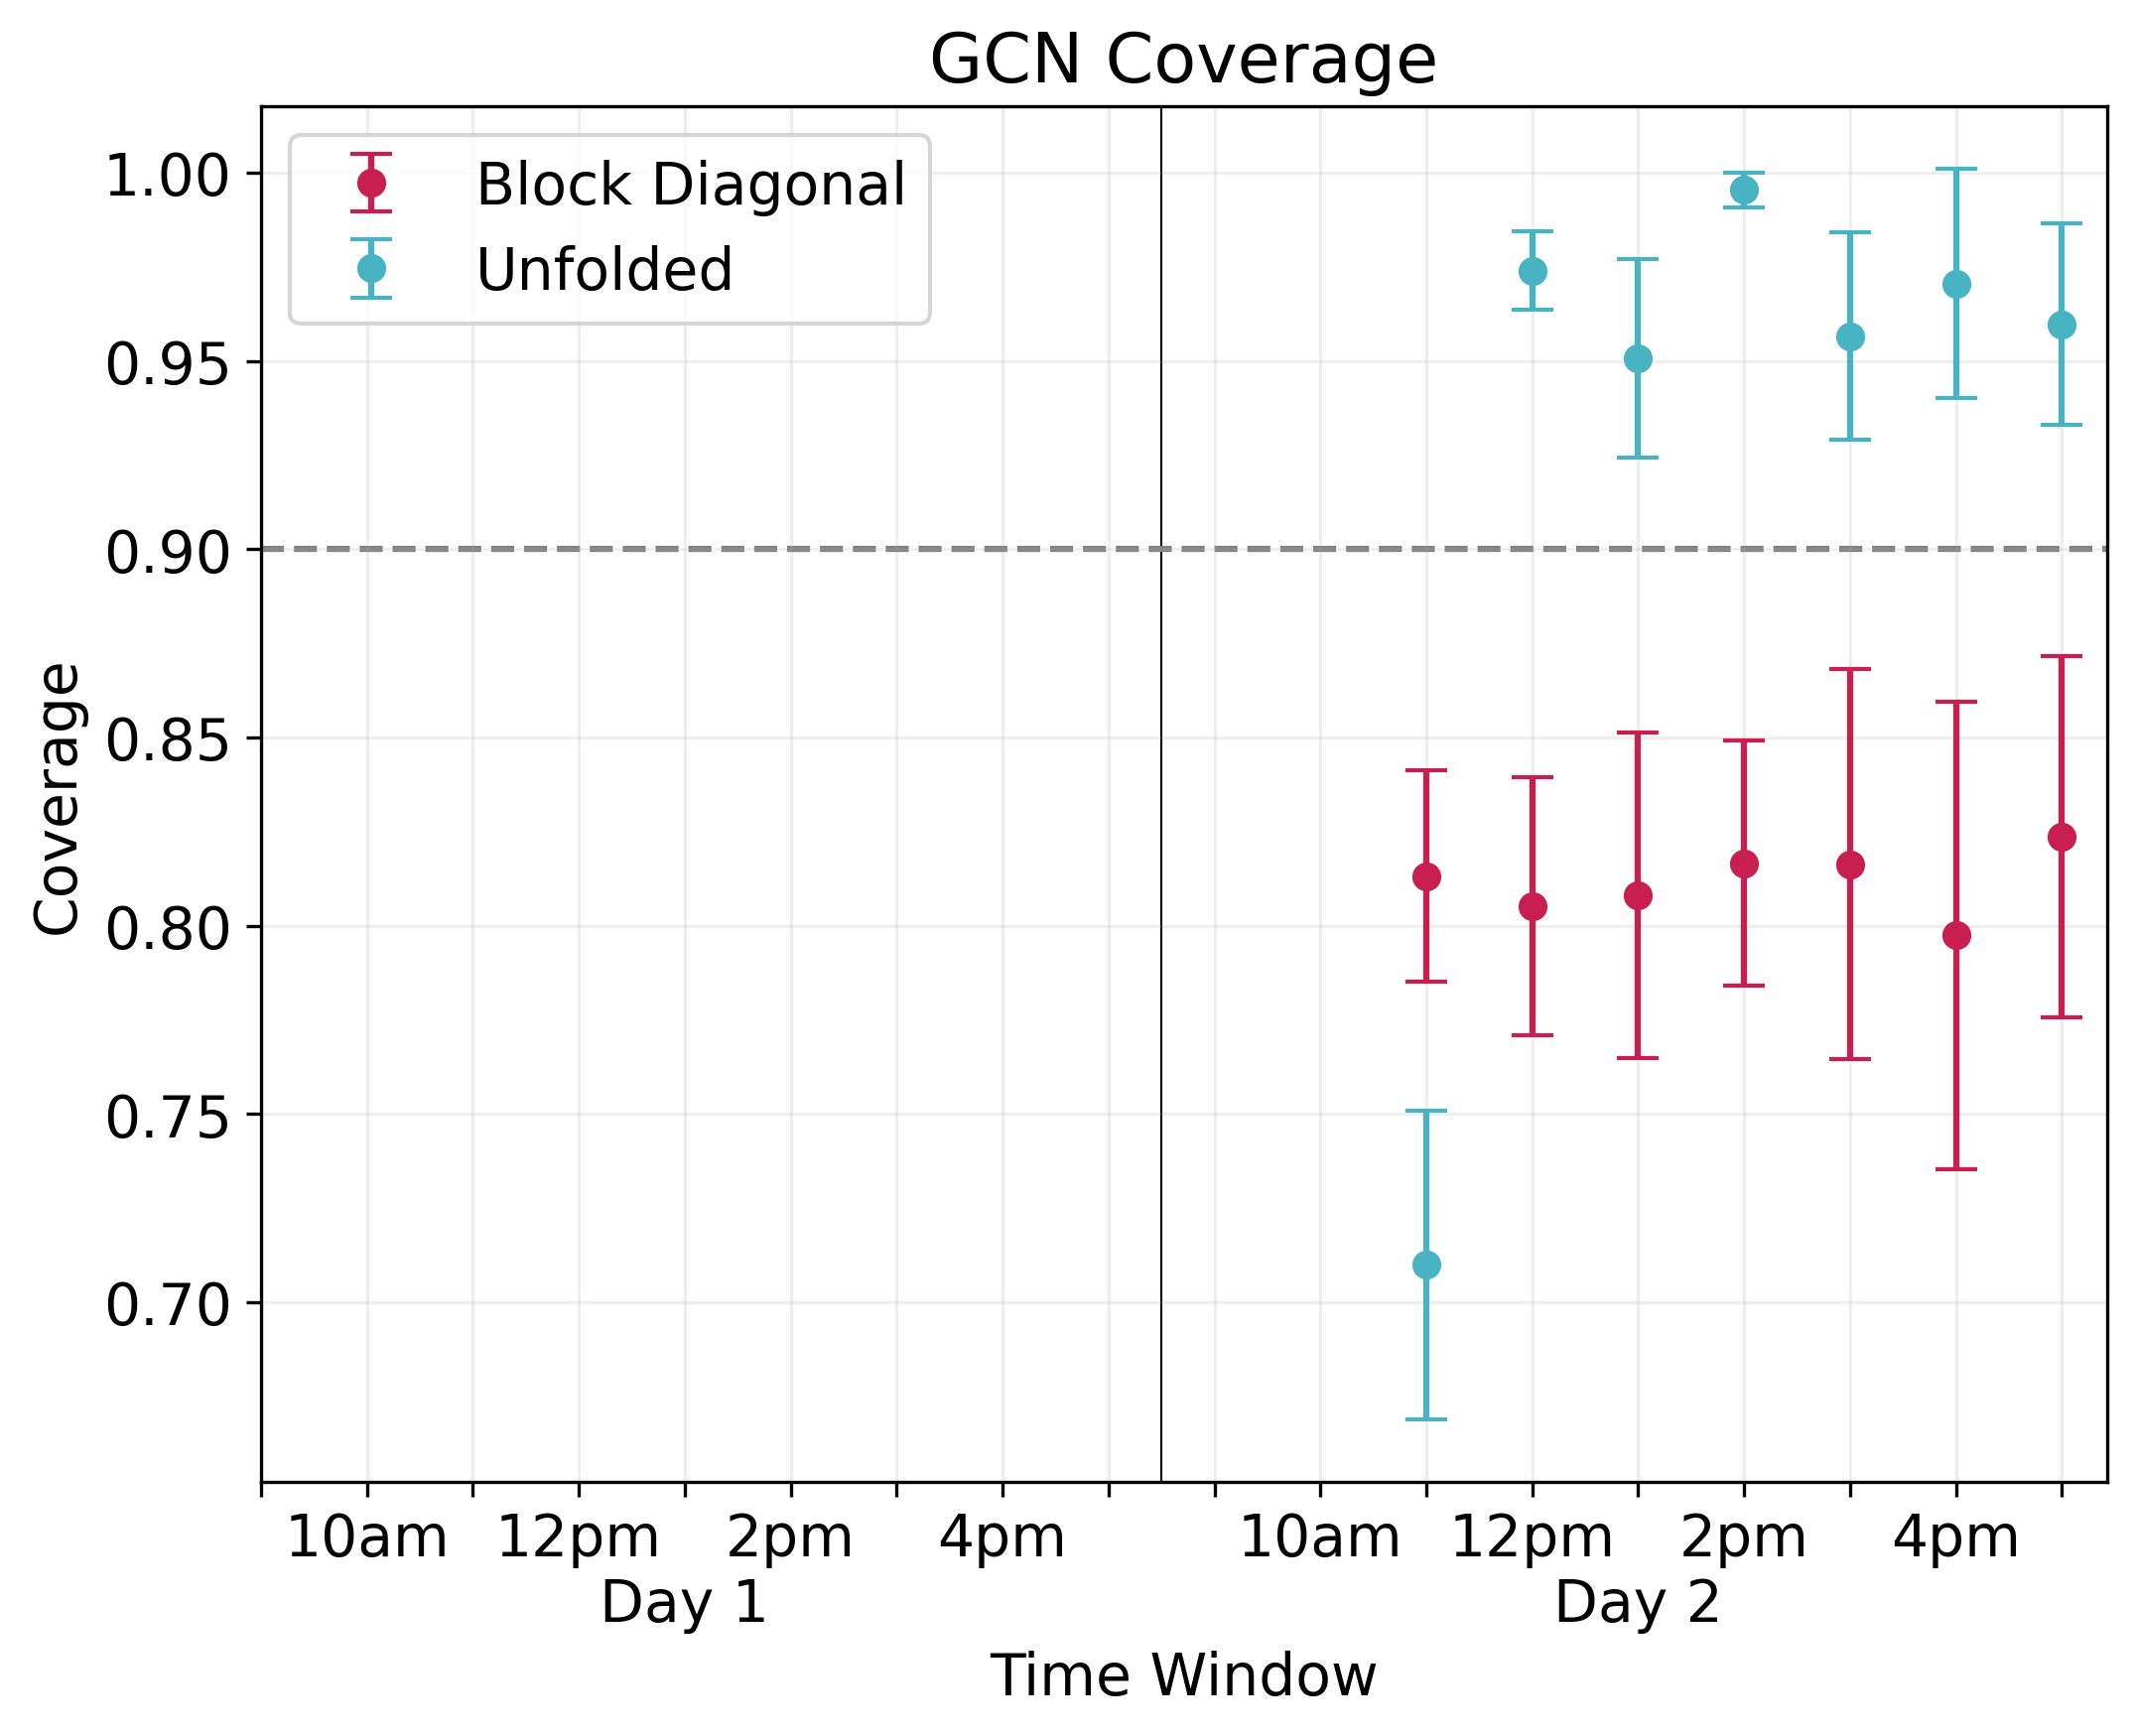

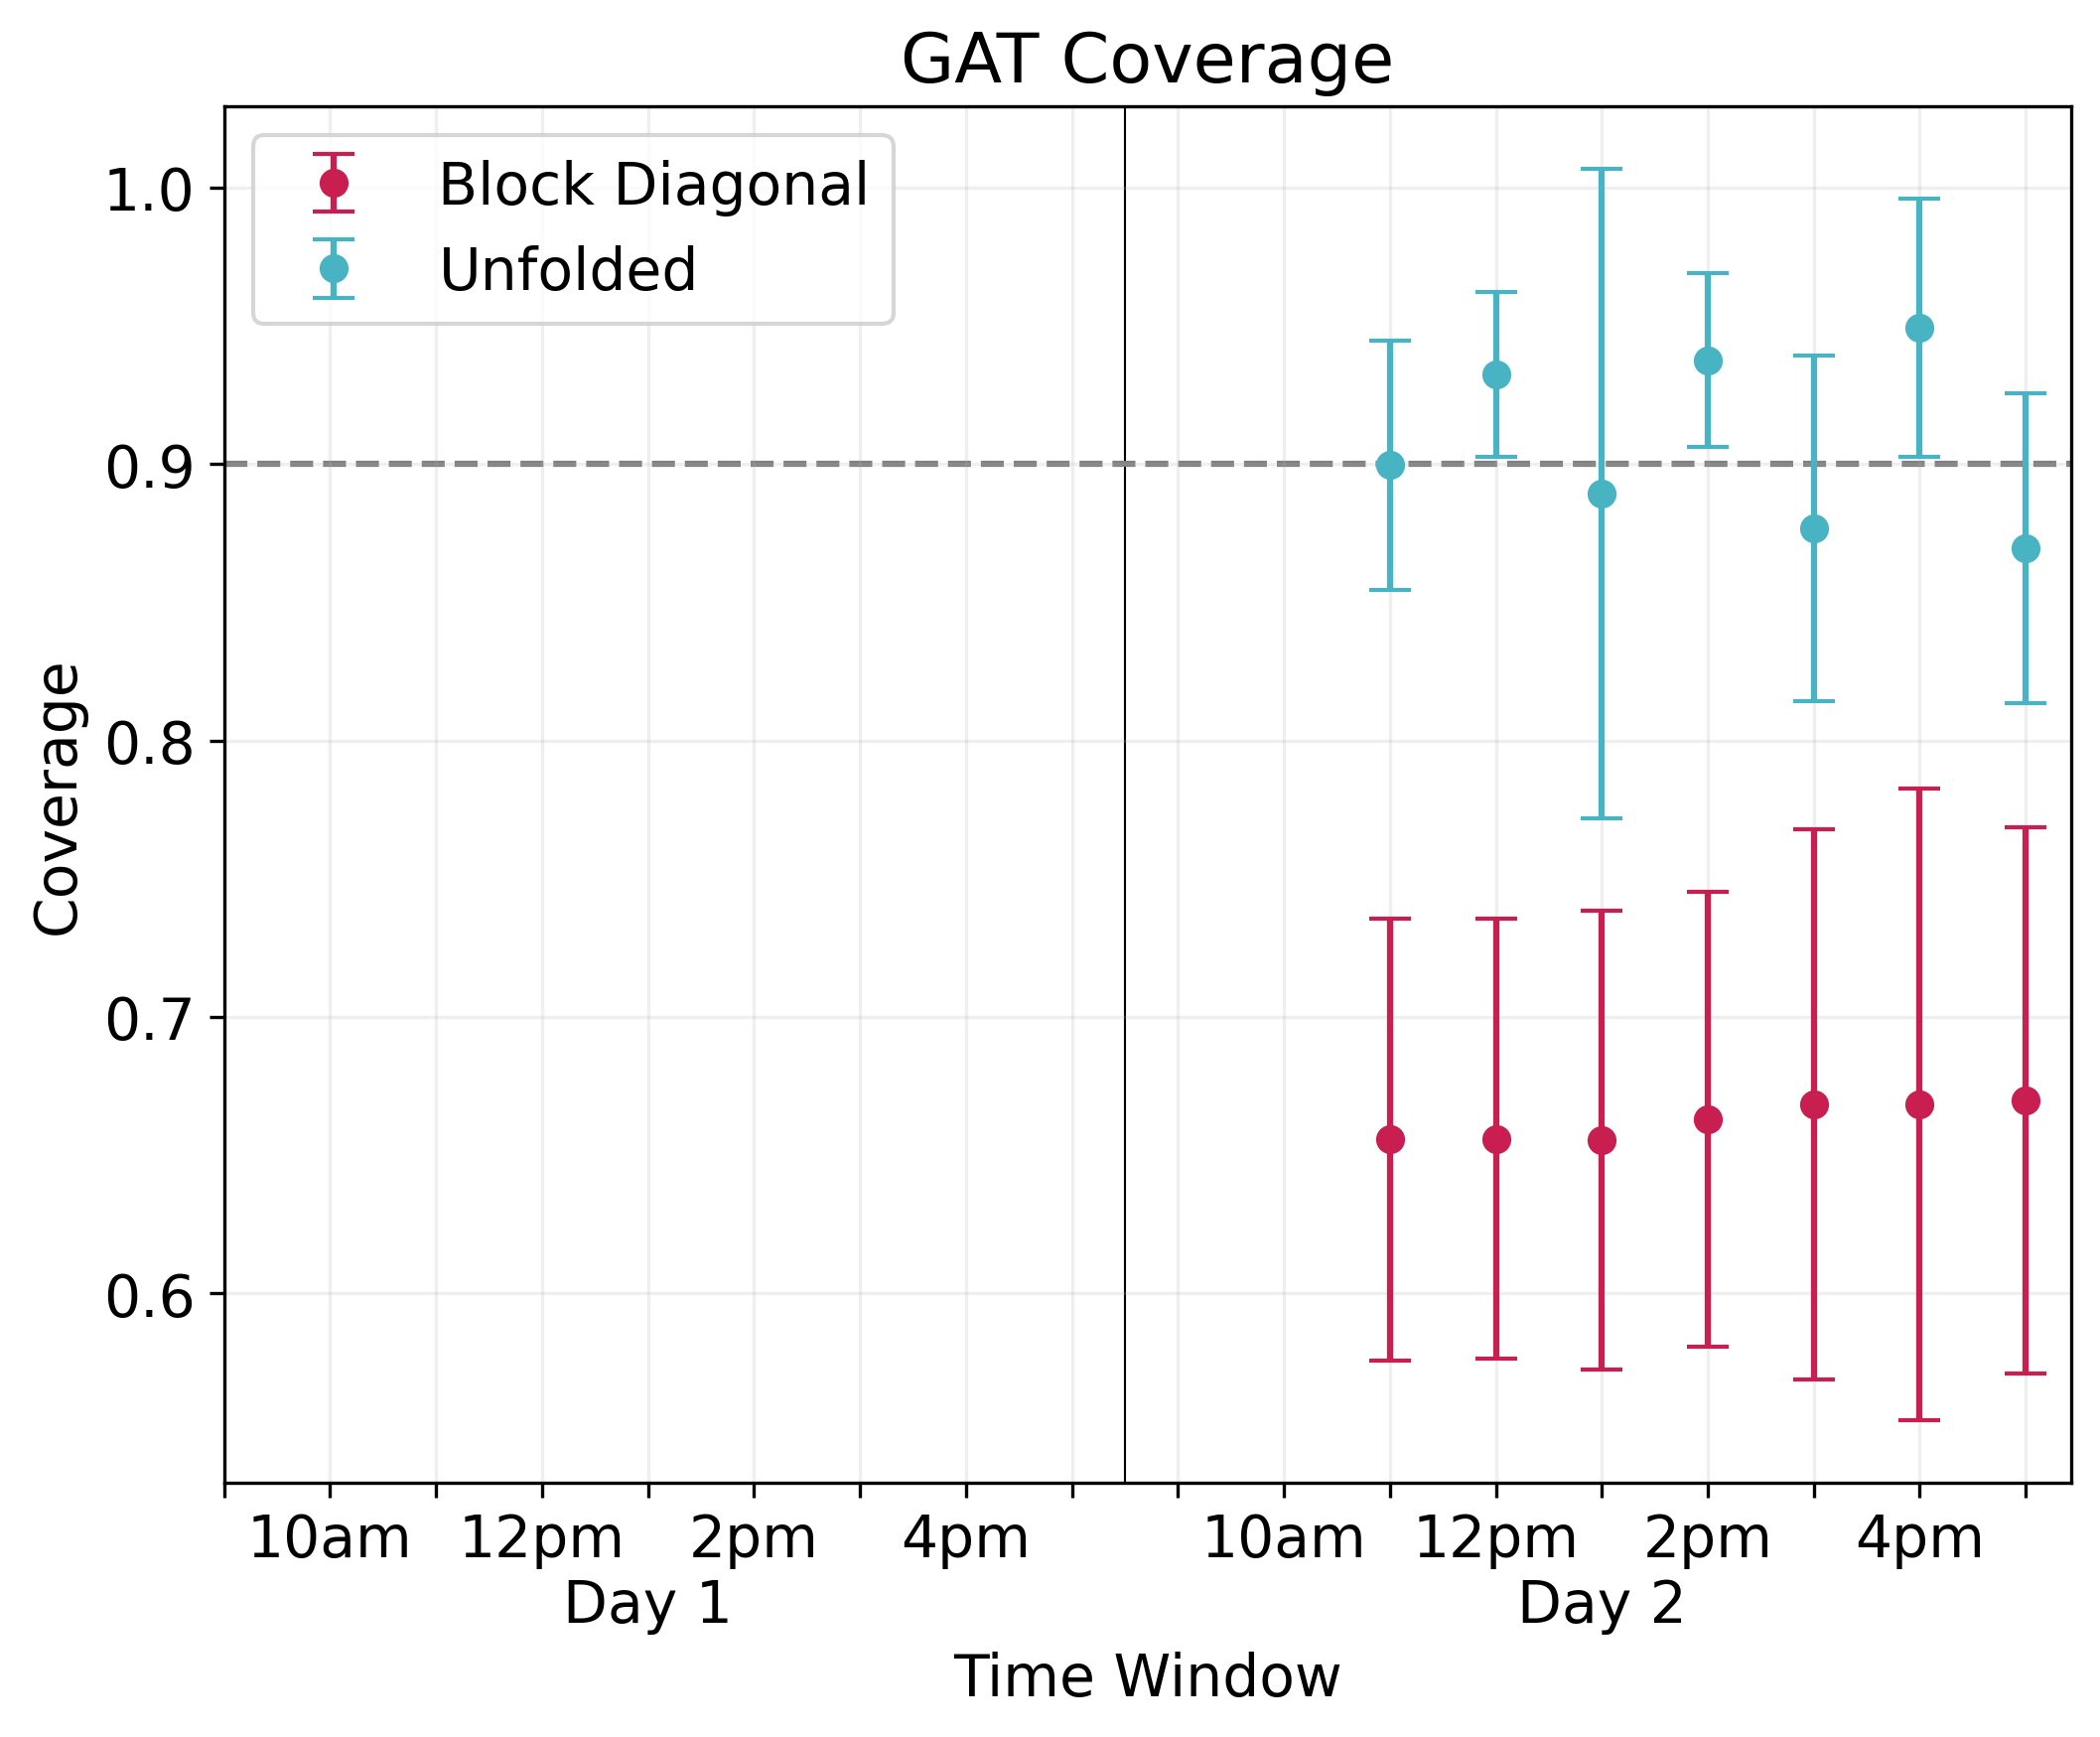

In [10]:

plt.rcParams.update({'font.size': 14})
colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]
for (GNN_model, regime, output) in product(GNN_models, regimes, outputs):
    if output == 'Accuracy':
        output_str = 'Accuracy'
    if output == 'Avg Size':
        output_str = 'Prediction Set Size'
    if output == 'Coverage':
        output_str = 'Coverage'

    for GNN_model in GNN_models:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    
        T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

        output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

        ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
        
        if output == 'Coverage':
            ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
        
        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Block Diagonal', zorder=2, c=colours[0])
    
        output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Unfolded', zorder=3, c=colours[1])
    
        ax.grid(alpha=0.2)
    
        ax.legend()
        
        ax.set_xticks(range(T))
        ax.set_xticklabels(xlabels)
        
        ax.set_title(GNN_model + ' ' + output_str)
        ax.set_xlabel('Time Window')
        ax.set_ylabel(output_str)
        
        # if save_figs:
        fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                    bbox_inches='tight');

In [11]:
output_file_prefix ='annotated_figures/School_' 

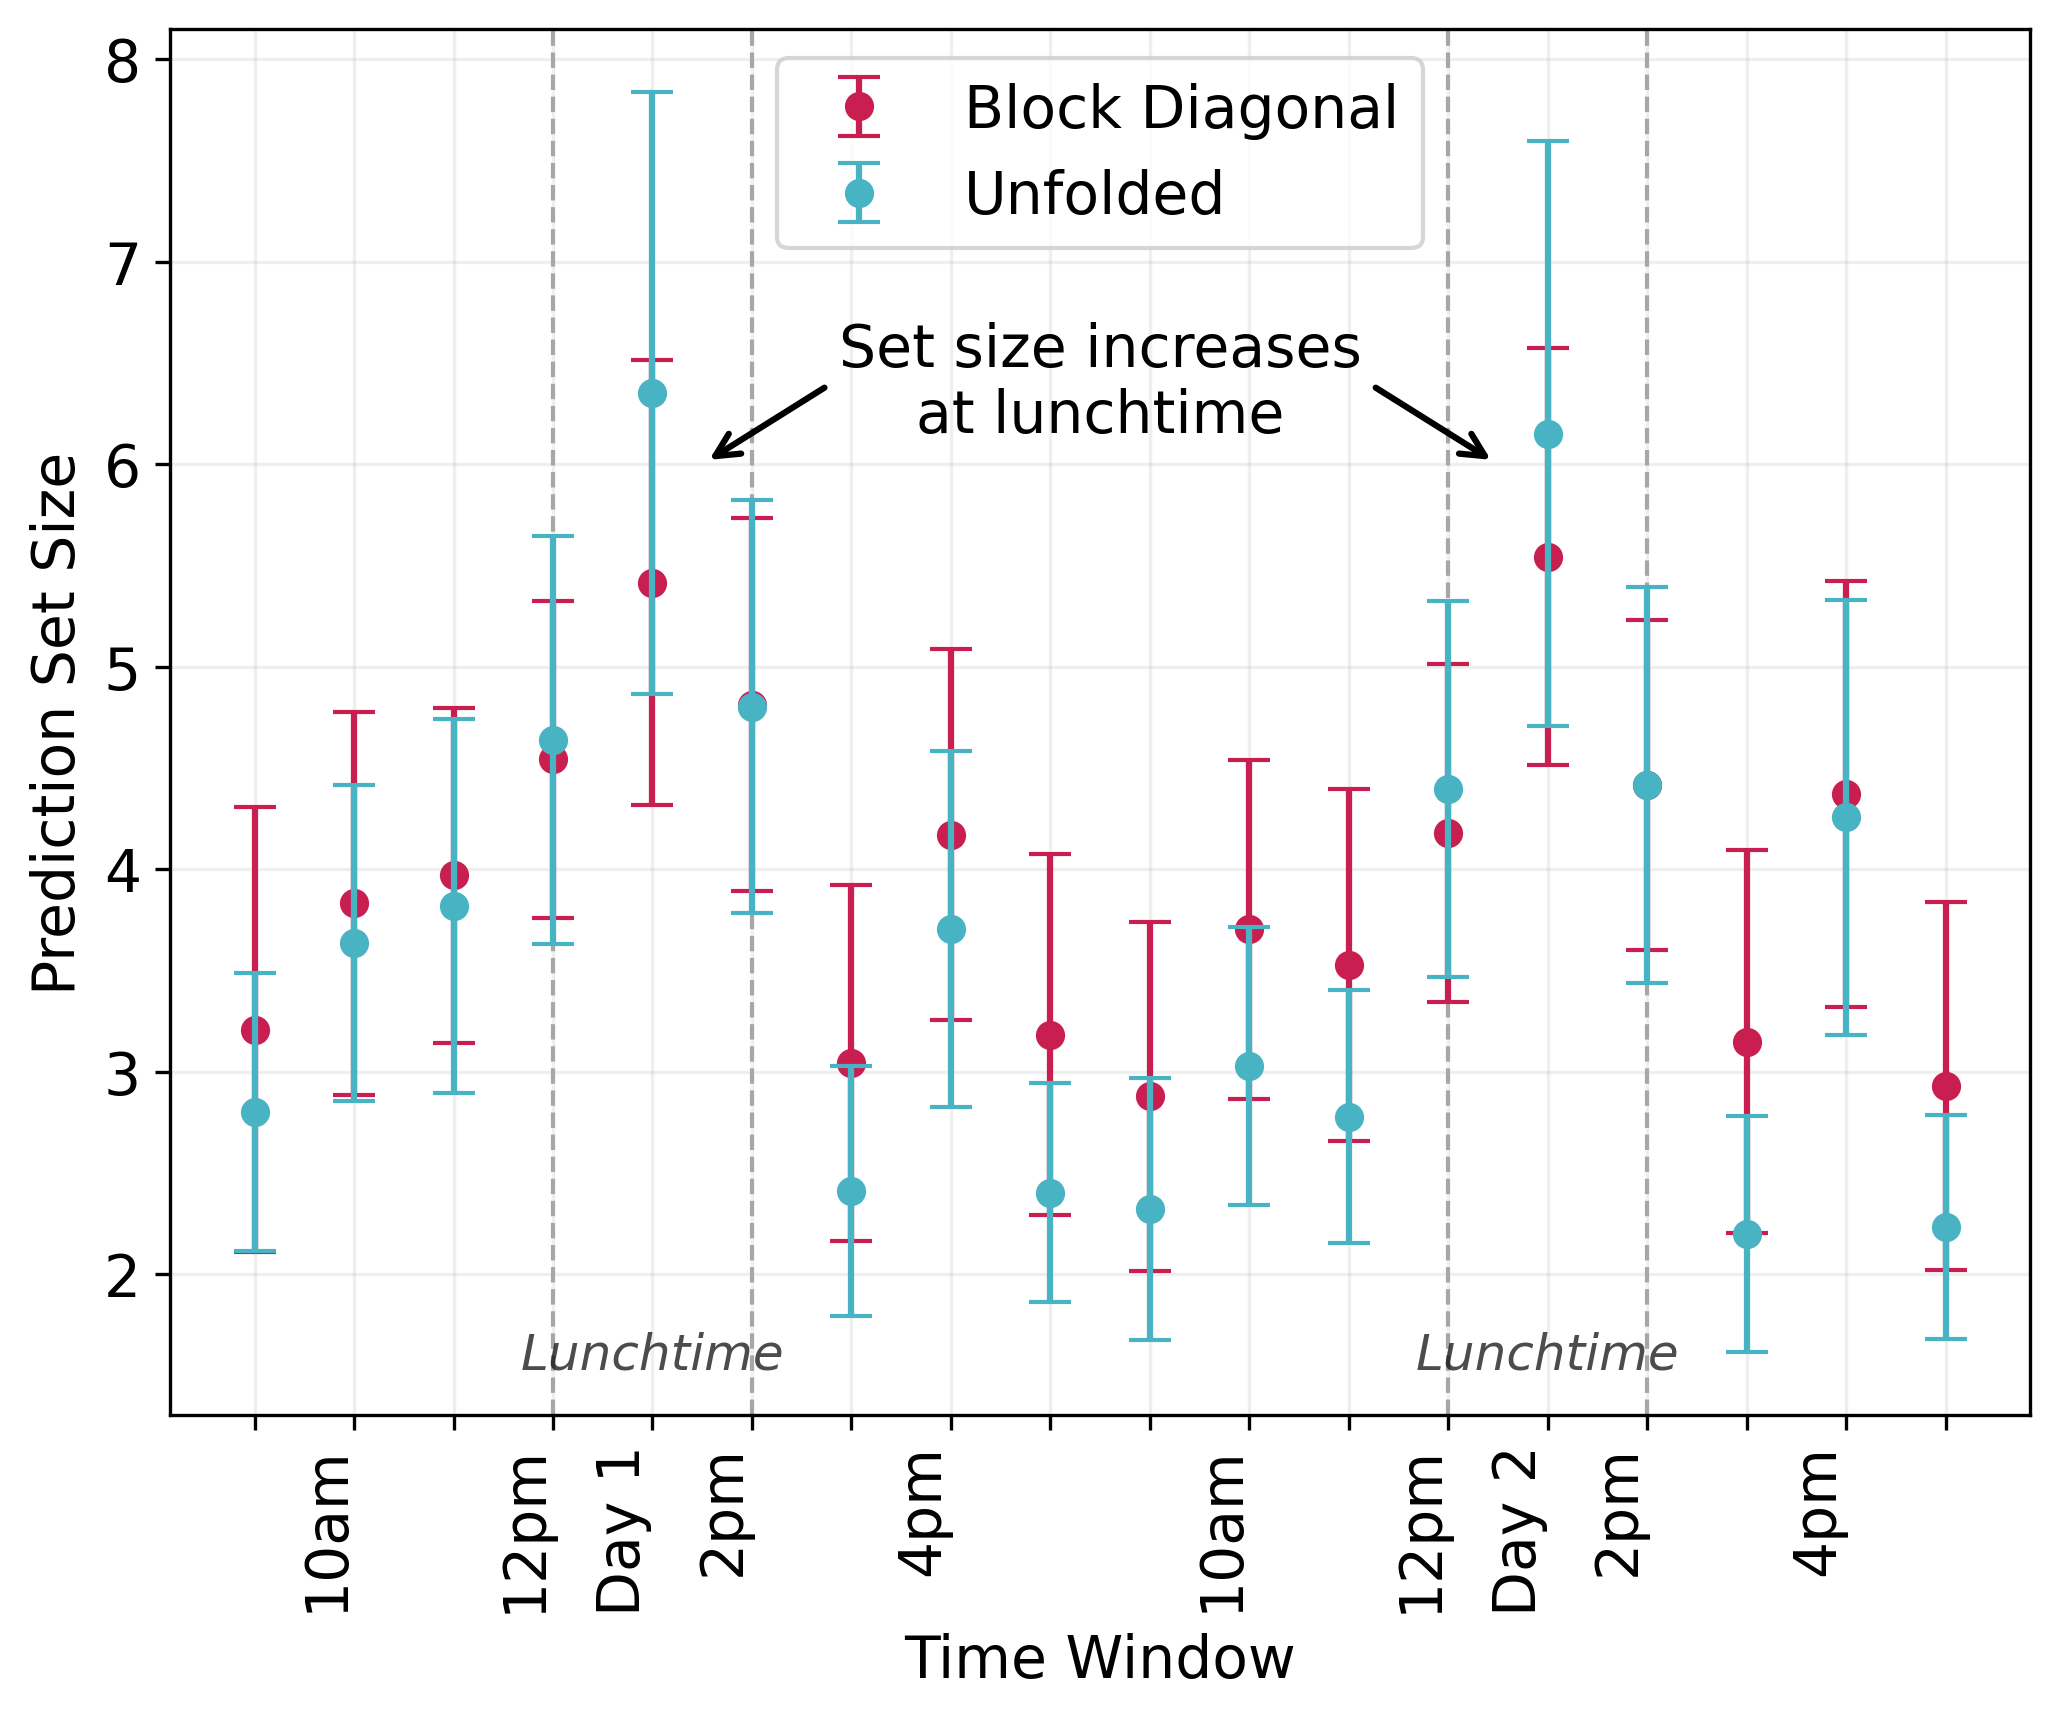

In [12]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

## Specific plots

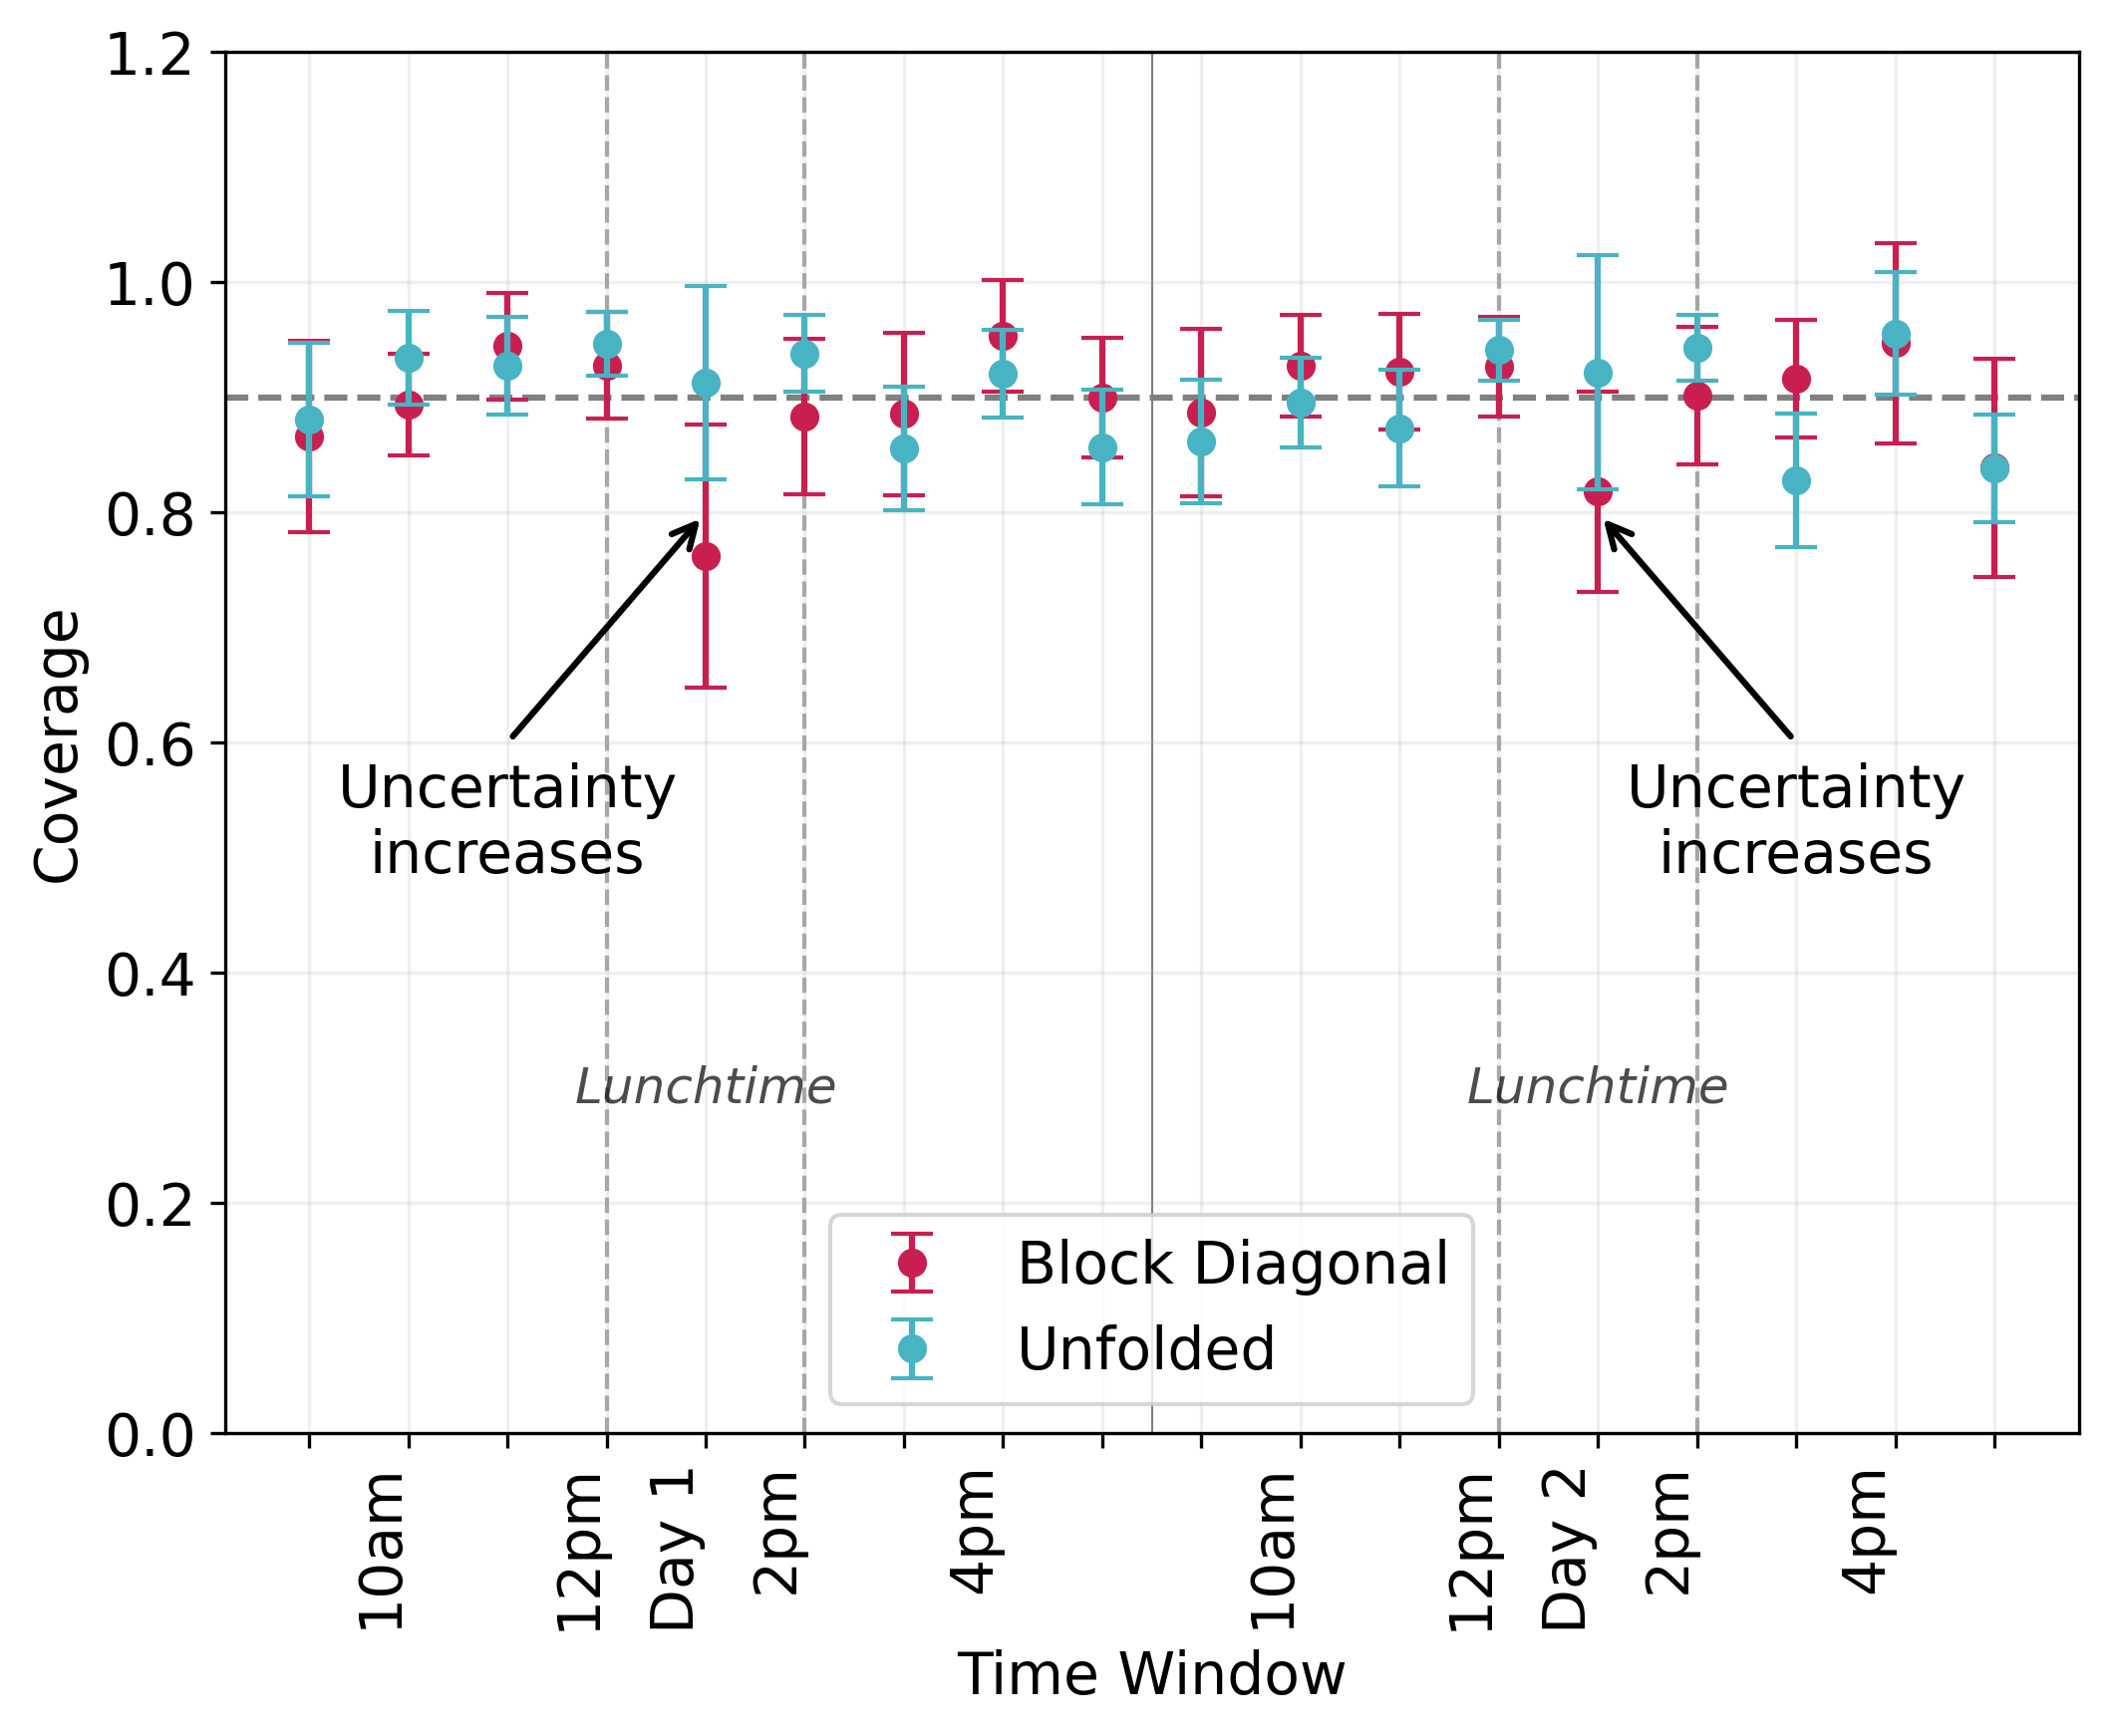

In [13]:
output = "Coverage"
output_str = "Coverage"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.8), xytext=(15, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

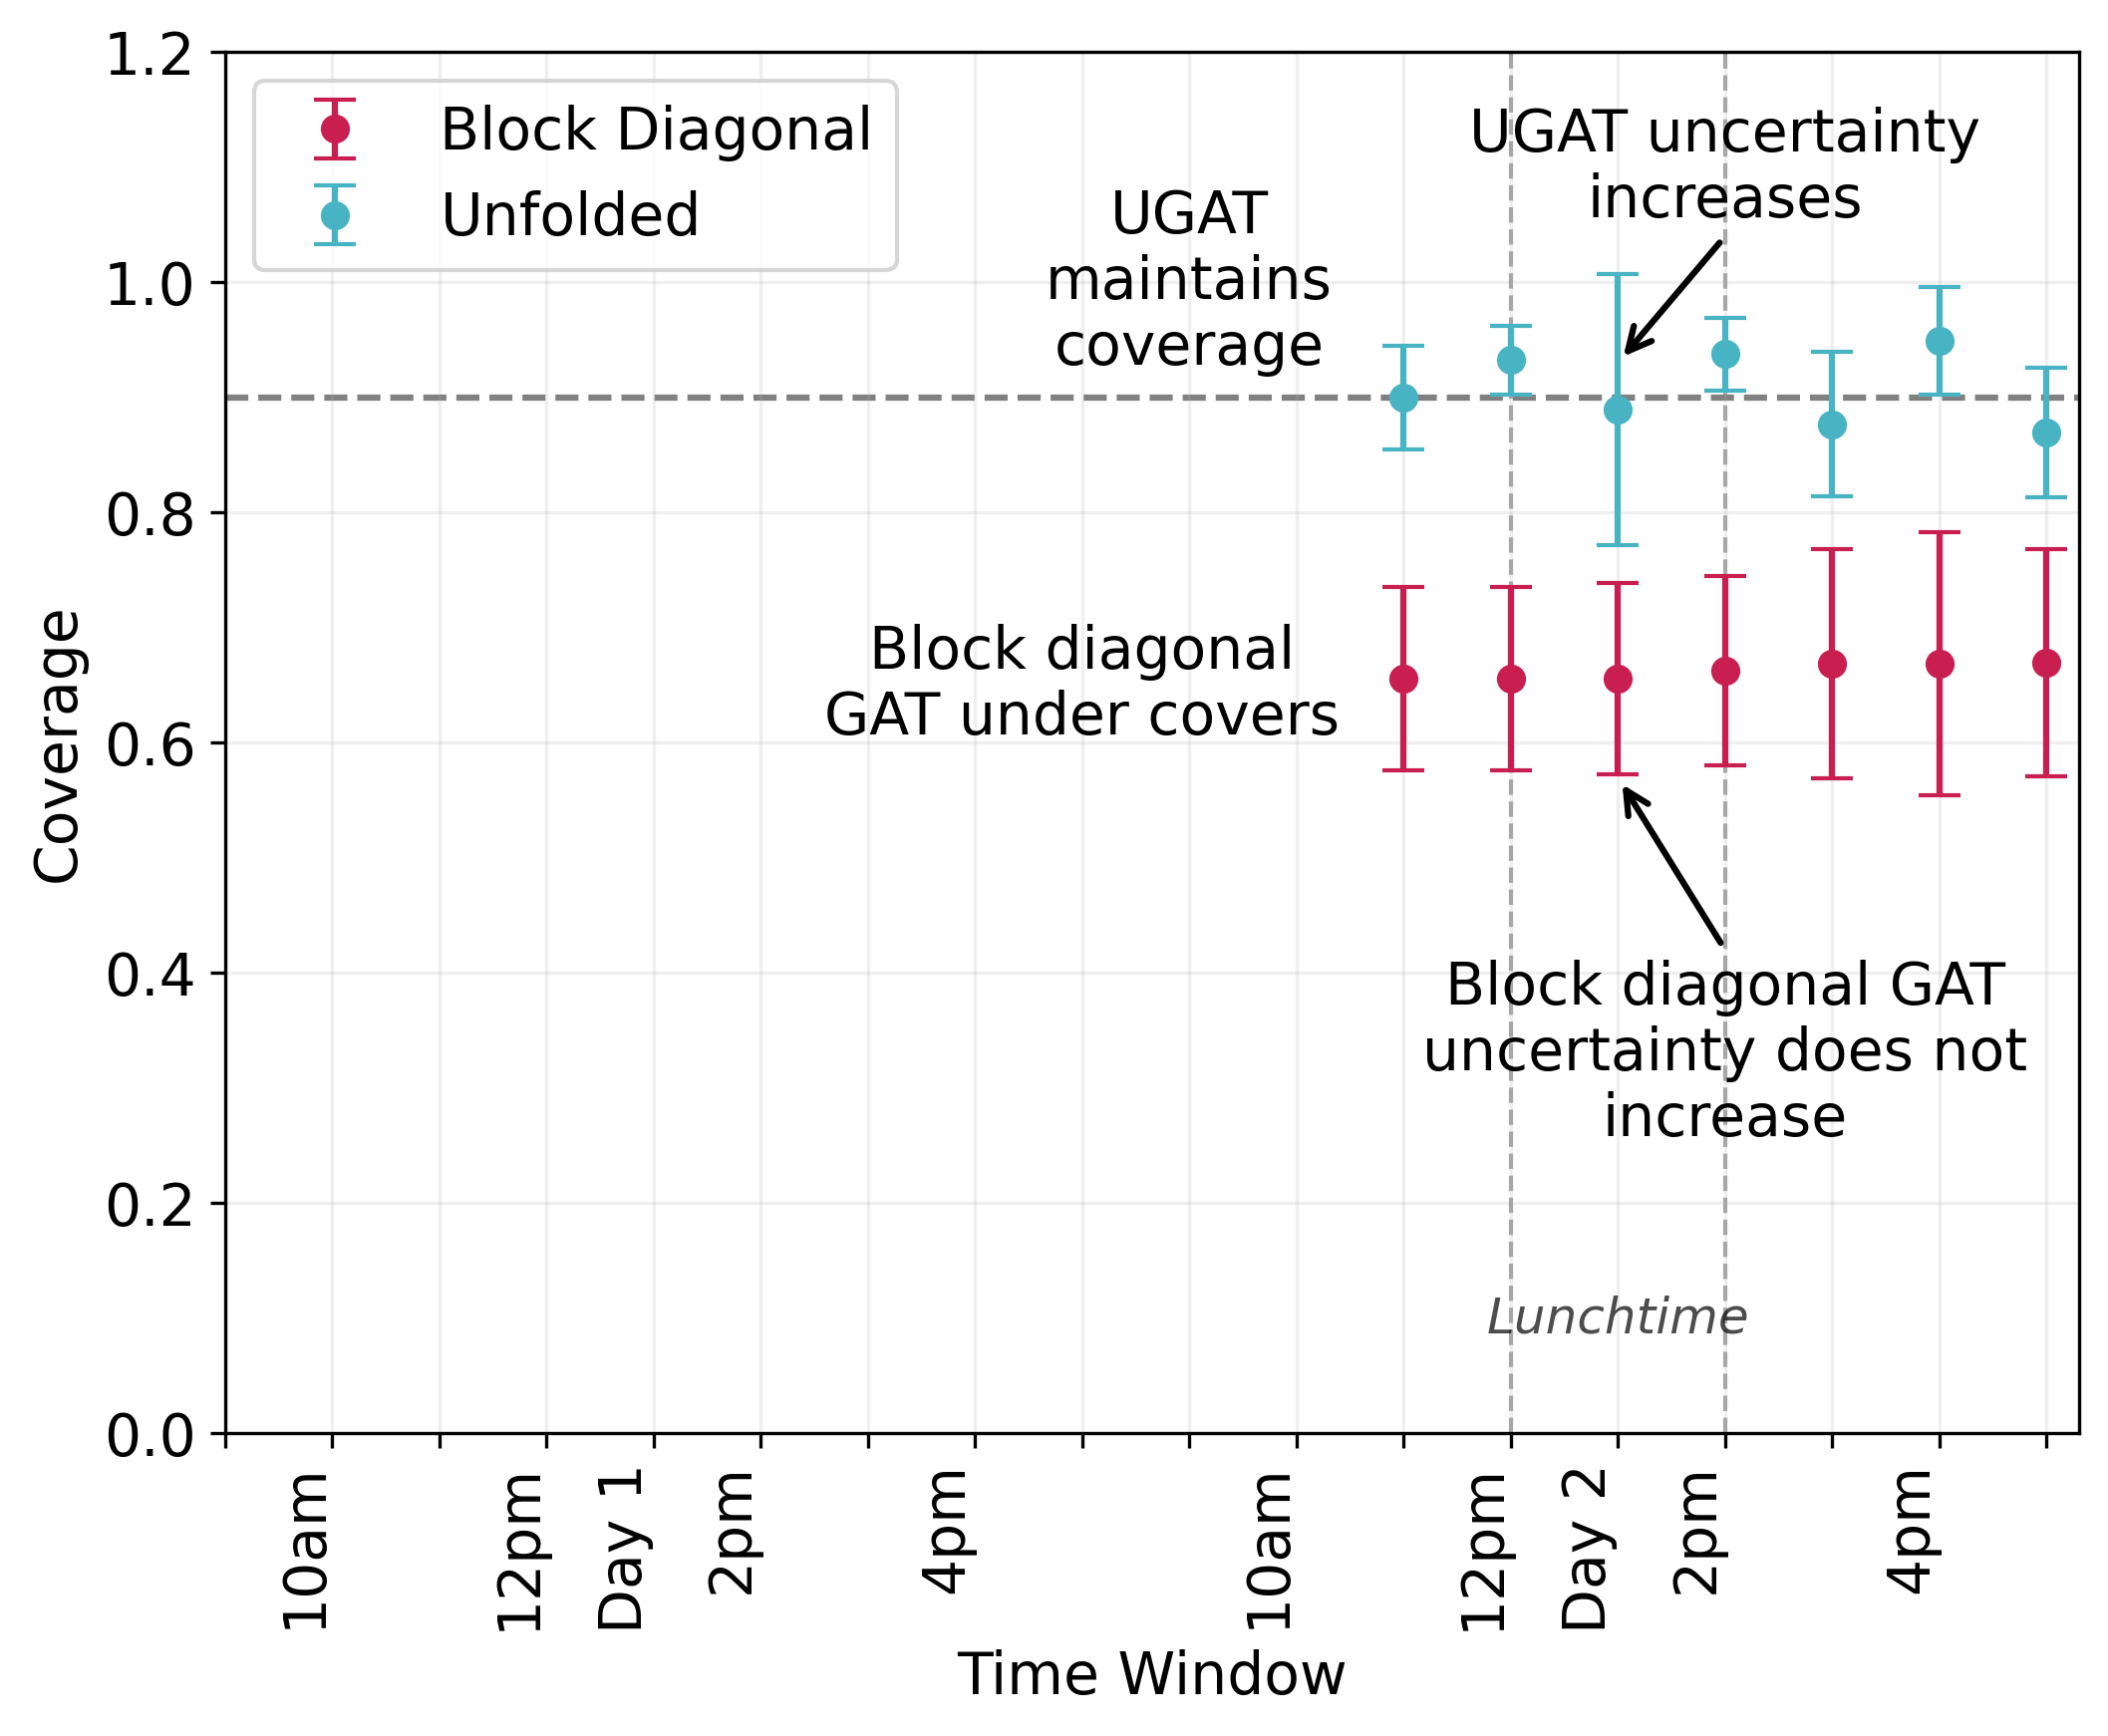

In [14]:
output = "Coverage"
output_str = "Coverage"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.5, fontsize=10, fontstyle='italic')
    ax.text(13, 0.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=12, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(14, 1.1, 'UGAT uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.93), xytext=(14, 1.04), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(9, 1, 'UGAT\nmaintains\ncoverage', fontsize=14, ha='center', va='center')

    ax.text(14, 0.33, 'Block diagonal GAT\nuncertainty does not\nincrease', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.57), xytext=(14, 0.42), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8, 0.65, 'Block diagonal\nGAT under covers', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

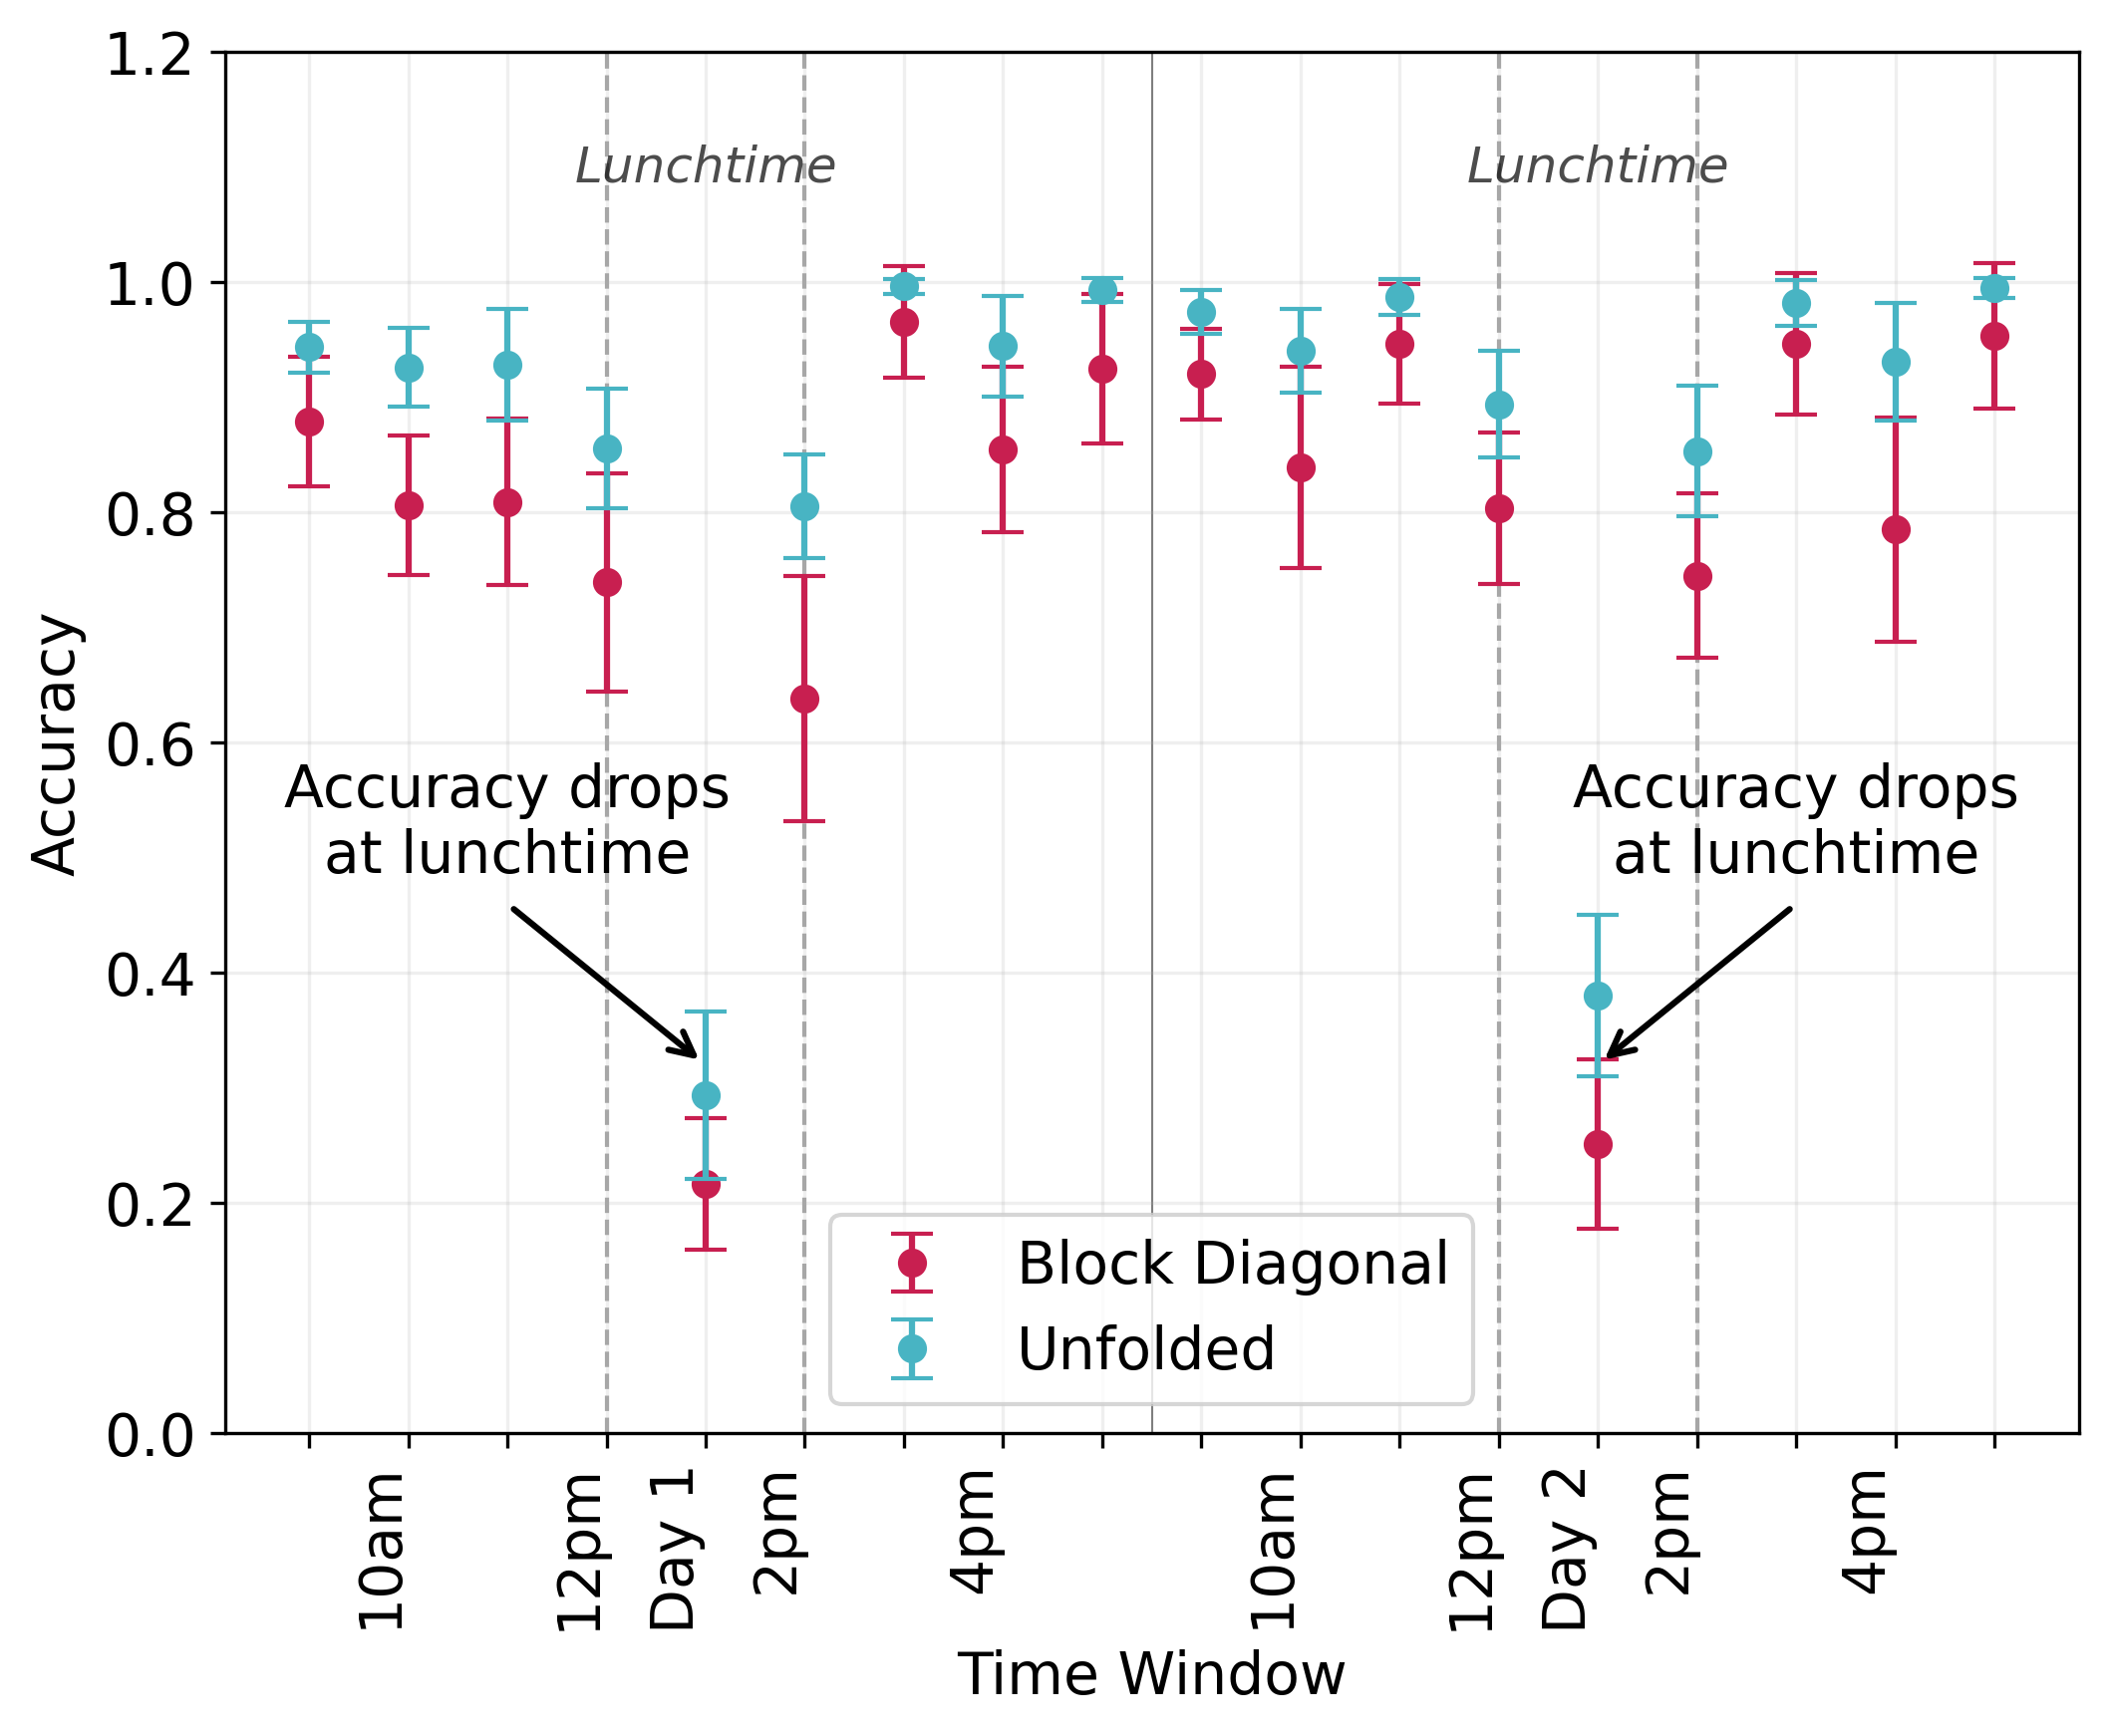

In [192]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

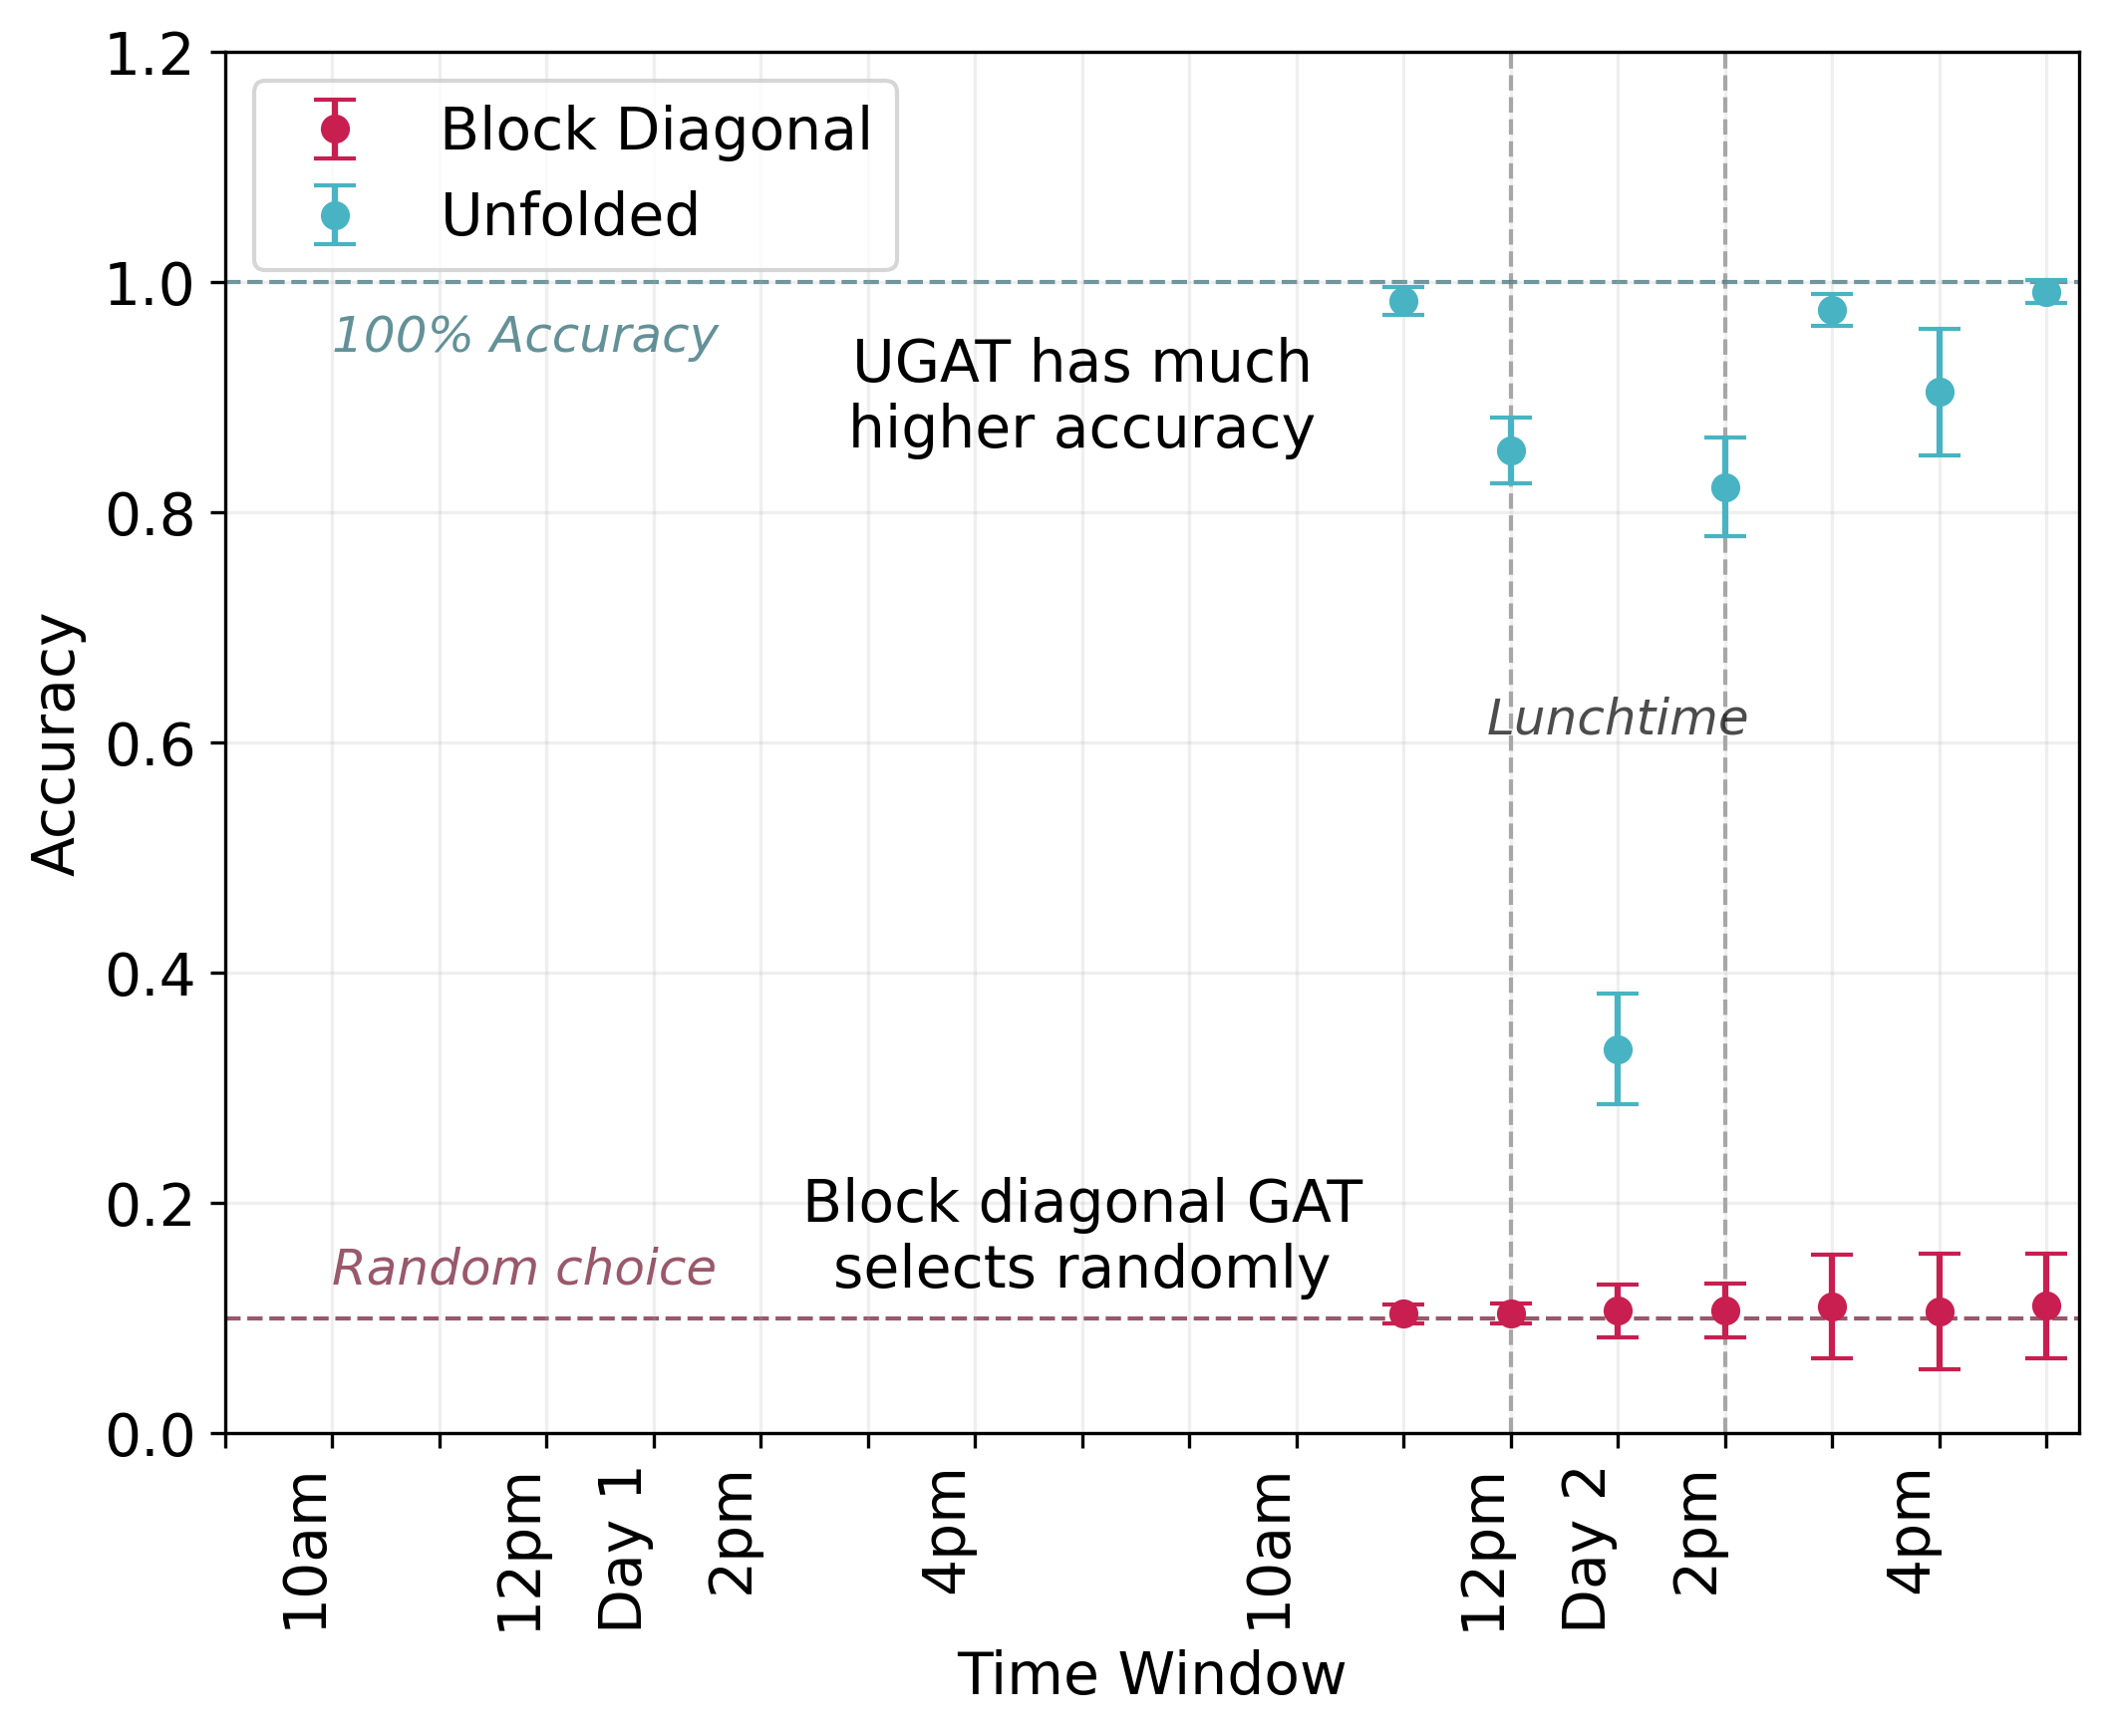

In [193]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    ax.text(13, 0.62, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')

    ax.text(1, 0.94, '100% Accuracy', alpha=0.7, fontsize=12, fontstyle='italic', c='#23636C')
    ax.axhline(1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#23636C')

    ax.text(8, 0.9, 'UGAT has much\nhigher accuracy', fontsize=14, ha='center', va='center')

    ax.text(1, 0.13, 'Random choice', alpha=0.7, fontsize=12, fontstyle='italic', c='#6E112C')
    ax.axhline(0.1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#6E112C')


    ax.text(8, 0.17, 'Block diagonal GAT\nselects randomly', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

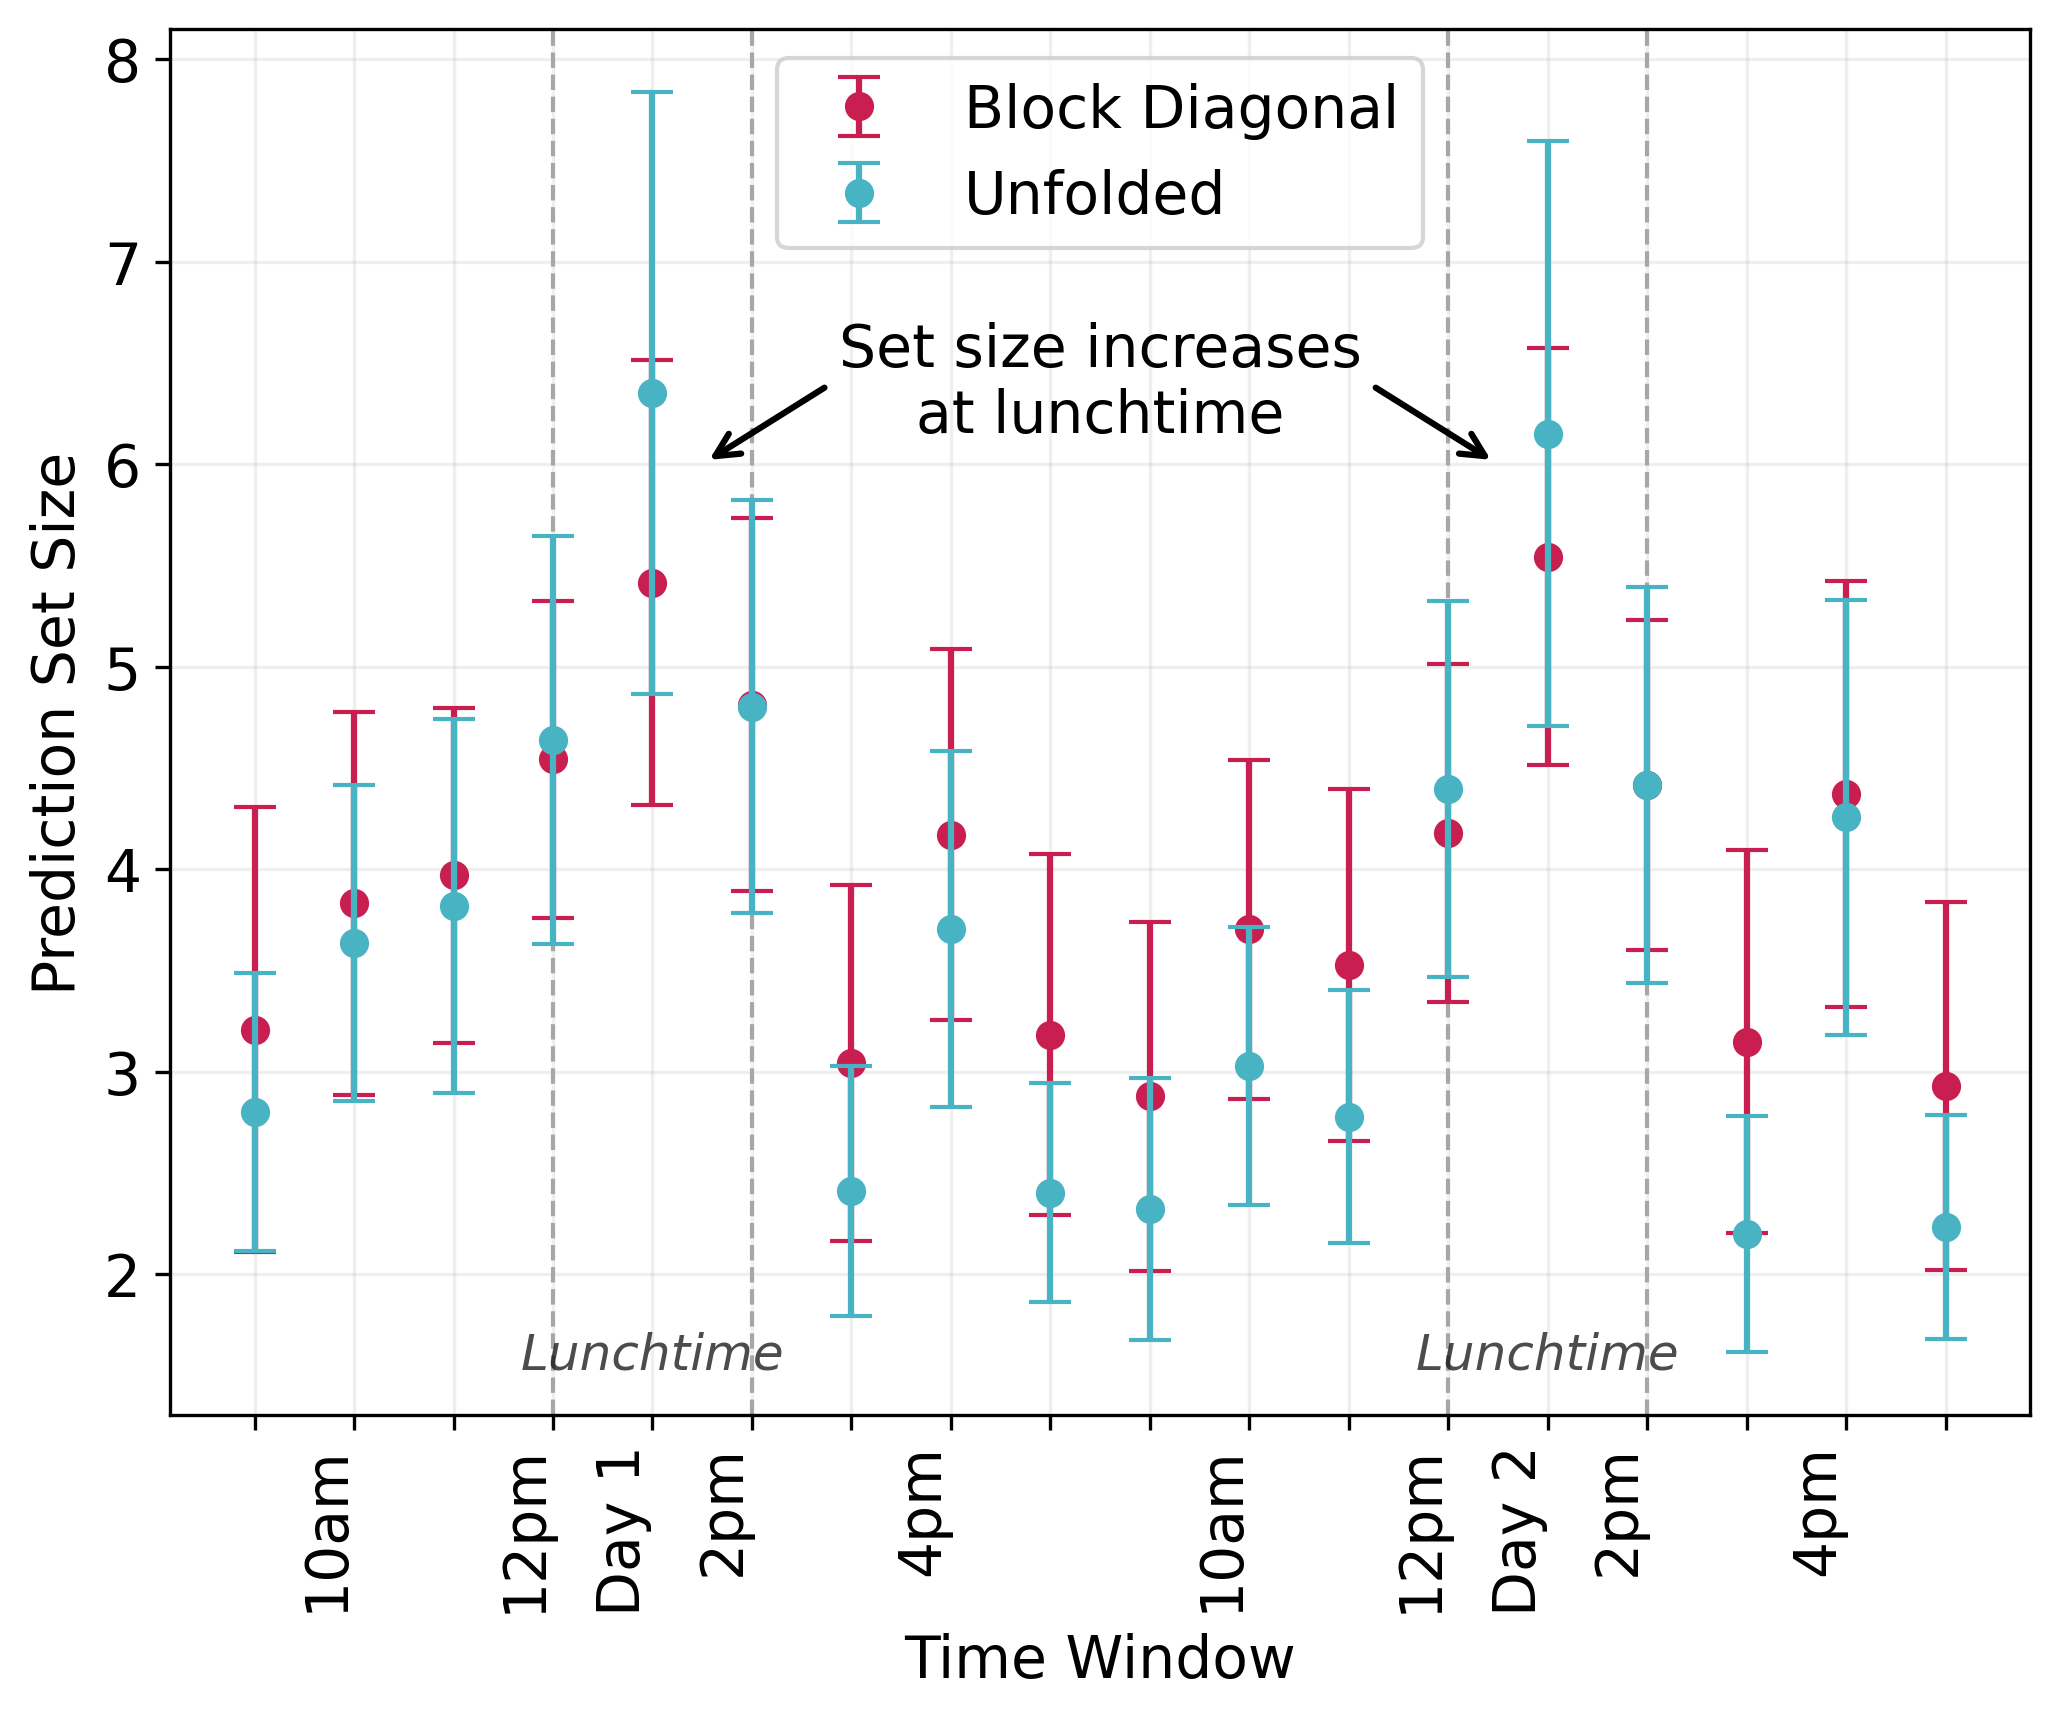

In [194]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

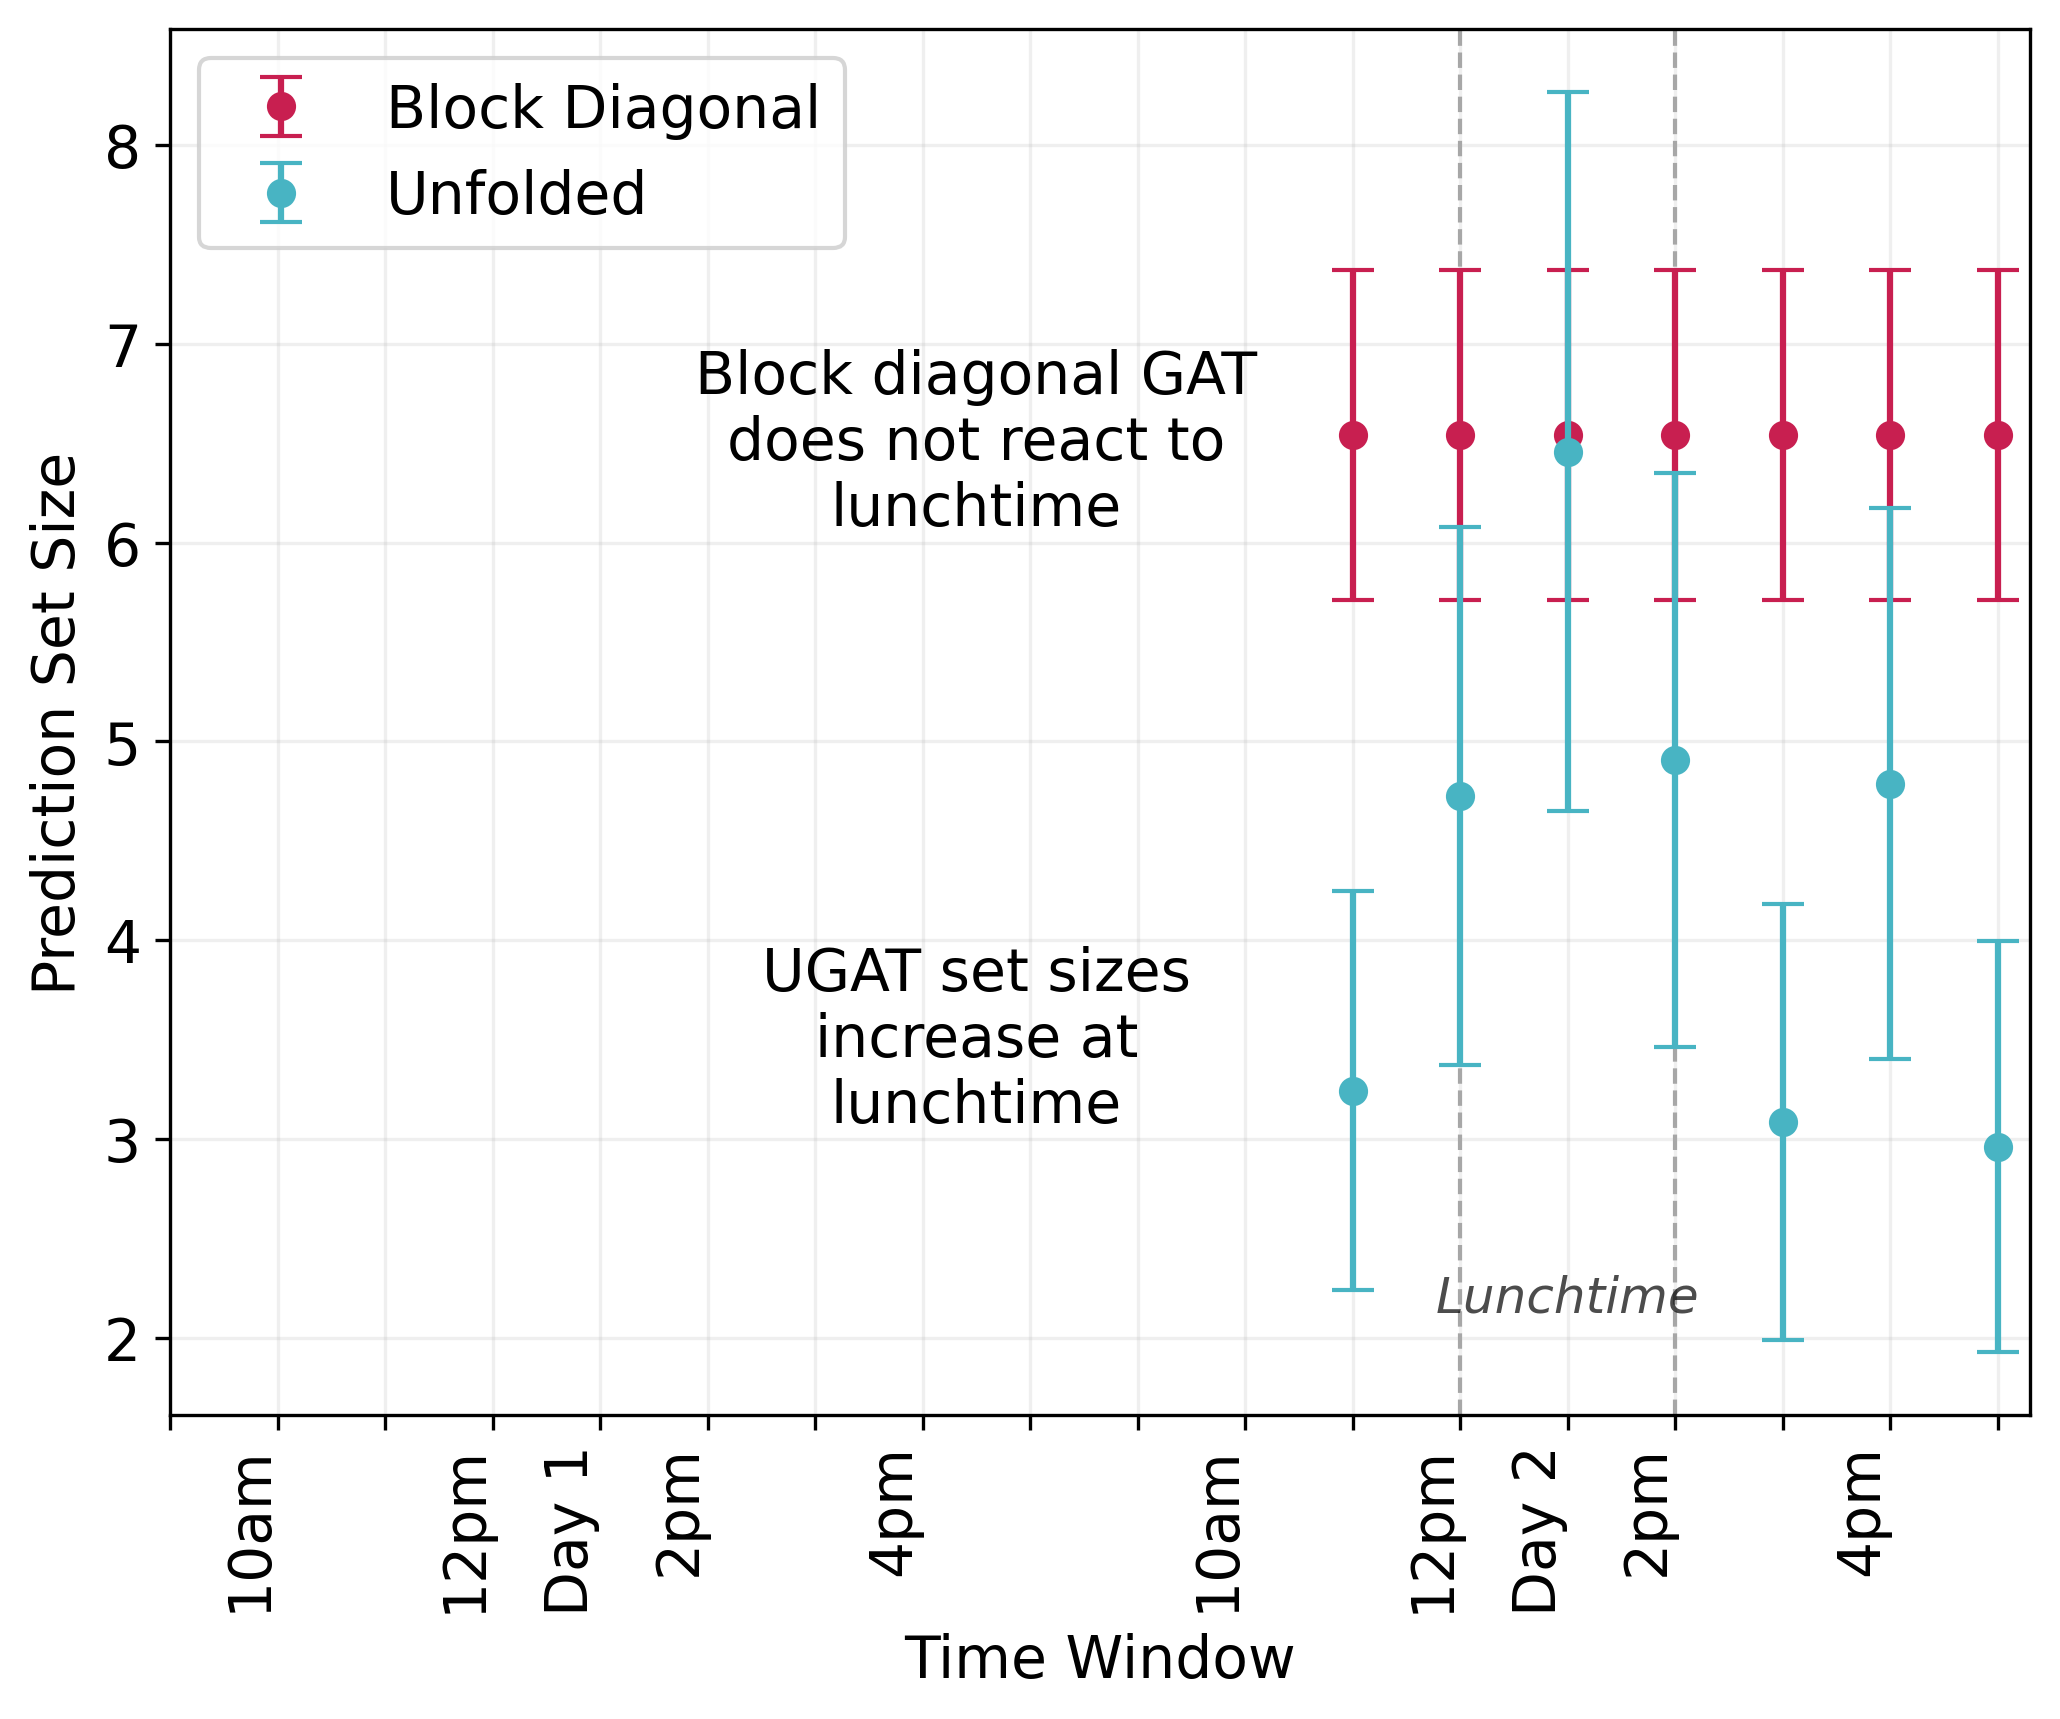

In [210]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 2.2, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 3.5, 'UGAT set sizes\nincrease at\nlunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    # ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 6.5, 'Block diagonal GAT\ndoes not react to\nlunchtime', fontsize=14, ha='center', va='center')

    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');